In [6]:
%matplotlib inline
import time
import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import sys
import paths
sys.path.append(paths.scripts_root)
import util

%load_ext autoreload
%autoreload 2
import TTM_analysis_utils as TTMUtil

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
print("Paths:")
for k,v in paths.path.items():
    print(" path.%s: %s" % (k,v))

import glob
import math
from collections import OrderedDict

debug = False
legacy = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Paths:
 path.scripts_root: /Users/trafferty/data/scripts
 path.results_root: /Users/trafferty/data/results
 path.images_root: /Users/trafferty/data/images
 path.ws_dir: /Users/trafferty/workspace
 path.projects_root: /Users/trafferty/data/projects
 path.tmp_dir: /Users/trafferty/tmp
 path.notebook_root: /Users/trafferty/data/notebooks
 path.tmp_root: /Users/trafferty/data/tmp


In [2]:
numCams = 4
cols, col_ids = TTMUtil.define_columns_and_ids(numCams, legacy)

# print("cols:", cols)
# print("\ncol_ids:", col_ids)

In [12]:
TTMStream_data = OrderedDict()
base_path = '%s/TTM_Vibration/trace_file_template' % (paths.tmp_dir)
wafer_id = 1
imprint_id = 1

for name in glob.glob('%s/template.*' % (base_path)):
    template_id = int(name[name.rfind('.')+1:])
    TTMLogStream_path = '%s/wafer.%d/imprint.%d/TTMLogStream.1' % (name, wafer_id, imprint_id)    
    data19_path = '%s/wafer.%d/imprint.%d/data19.1' % (name, wafer_id, imprint_id)    
    with open(data19_path, 'rb') as data19_file:
        data19_file.seek(3*128)
        x_mm = np.frombuffer(data19_file.read(8), dtype=np.float64)[0]
        y_mm = np.frombuffer(data19_file.read(8), dtype=np.float64)[0]
    if debug: print( template_id, "=", (TTMLogStream_path, (x_mm, y_mm)) )
    TTMStream_data[template_id] = (TTMLogStream_path, (x_mm, y_mm))

print("num files: ", len(TTMStream_data))
print("First element:", list(TTMStream_data.items())[0])

num files:  92
First element: (114207, ('/Users/trafferty/tmp/TTM_Vibration/trace_file_template/template.114207/wafer.1/imprint.1/TTMLogStream.1', (43.829999999999998, -62.859999999999999)))


In [13]:
#TTMLogStream_path= list(TTMStream_data.items())[0][1][0]
                                                                                       
def read_ttm_raw(TTMLogStream_path):
    # new way (UDP):
    legacy, fname = False, TTMLogStream_path

    ## old way (TCP)
    #legacy, fname = True, '%s/TTMLogStream_TEST.csv' % (tmp_dir)

    f = open(fname, 'r')
    ttm = f.readlines()
    f.close()
    if debug: print("Unfiltered len:", len(ttm))

    ttm[:] = [element for element in ttm if TTMUtil.include_element(element)]

    if debug: print("Filtered len  :", len(ttm))
    return ttm

In [14]:
wafer_data_sets = OrderedDict()

for template_id, d in TTMStream_data.items():    
    TTMLogStream_path = d[0]
    field_pos = d[1]
    print("For template ID: ", template_id)
    
    # read in raw ttm data from template.xxxxx/wafer.x/imprint.x/TTMLogStream.1
    ttm = read_ttm_raw(TTMLogStream_path)

    # parse into data sets (rough)
    data_ranges, data_sets_rough = TTMUtil.parse_into_data_sets(ttm)

    # cleanup rough data sets and create data_sets list (data_set=all trace data from single imprint, should be 67 colums of data)
    data_sets = []
    for idx, data_set in enumerate(data_sets_rough):
        data_sets.append(TTMUtil.cleanup_and_format_data_set(data_set, legacy))

    wafer_data_sets[template_id] = data_sets[0]

print("len(wafer_data_sets):", len(wafer_data_sets))

For template ID:  114207
Data set 0, range: 0 - 3807 (total: 3807)
[0] range: doTTMClientWork: 2017-10-11 17:34:50.145 -> doTTMClientWork: 2017-10-11 17:34:54.144
For template ID:  114208
Data set 0, range: 0 - 8564 (total: 8564)
[0] range: doTTMClientWork: 2017-10-11 17:34:58.762 -> doTTMClientWork: 2017-10-11 17:35:07.760
For template ID:  114209
Data set 0, range: 0 - 952 (total: 952)
[0] range: doTTMClientWork: 2017-10-11 17:35:12.340 -> doTTMClientWork: 2017-10-11 17:35:13.338
For template ID:  114210
Data set 0, range: 0 - 8561 (total: 8561)
[0] range: doTTMClientWork: 2017-10-11 17:35:22.138 -> doTTMClientWork: 2017-10-11 17:35:31.156
For template ID:  114211
Data set 0, range: 0 - 951 (total: 951)
[0] range: doTTMClientWork: 2017-10-11 17:35:35.613 -> doTTMClientWork: 2017-10-11 17:35:36.612
For template ID:  114212
Data set 0, range: 0 - 8564 (total: 8564)
[0] range: doTTMClientWork: 2017-10-11 17:35:41.386 -> doTTMClientWork: 2017-10-11 17:35:50.384
For template ID:  114213
D

Data set 0, range: 0 - 952 (total: 952)
[0] range: doTTMClientWork: 2017-10-11 17:44:30.068 -> doTTMClientWork: 2017-10-11 17:44:31.067
For template ID:  114259
Data set 0, range: 0 - 8564 (total: 8564)
[0] range: doTTMClientWork: 2017-10-11 17:44:36.569 -> doTTMClientWork: 2017-10-11 17:44:45.566
For template ID:  114260
Data set 0, range: 0 - 953 (total: 953)
[0] range: doTTMClientWork: 2017-10-11 17:44:52.192 -> doTTMClientWork: 2017-10-11 17:44:53.192
For template ID:  114261
Data set 0, range: 0 - 8563 (total: 8563)
[0] range: doTTMClientWork: 2017-10-11 17:45:02.292 -> doTTMClientWork: 2017-10-11 17:45:11.289
For template ID:  114262
Data set 0, range: 0 - 3806 (total: 3806)
[0] range: doTTMClientWork: 2017-10-11 17:45:15.742 -> doTTMClientWork: 2017-10-11 17:45:19.740
For template ID:  114263
Data set 0, range: 0 - 8563 (total: 8563)
[0] range: doTTMClientWork: 2017-10-11 17:45:27.468 -> doTTMClientWork: 2017-10-11 17:45:36.465
For template ID:  114264
Data set 0, range: 0 - 380

In [15]:
def data_set_metrics(data_set):
    validx = {0:0, 1:0, 2:0, 3:0, 4:0}
    validy = {0:0, 1:0, 2:0, 3:0, 4:0}
    validx_records = []
    validy_records = []
    for d in data_set:
        x = 4-(d[col_ids['C0 cscorex']] + d[col_ids['C1 cscorex']] + d[col_ids['C2 cscorex']] + d[col_ids['C3 cscorex']])
        validx[x] += 1

        y = 4-(d[col_ids['C0 cscorey']] + d[col_ids['C1 cscorey']] + d[col_ids['C2 cscorey']] + d[col_ids['C3 cscorey']])
        validy[y] += 1

    df = pd.DataFrame.from_records(data_set, columns=cols)
    df_c0x = df['C0 post measx_mm']
    df_c0y = df['C0 post measy_mm']
    df_c1x = df['C1 post measx_mm']
    df_c1y = df['C1 post measy_mm']
    df_c2x = df['C2 post measx_mm']
    df_c2y = df['C2 post measy_mm']
    df_c3x = df['C3 post measx_mm']
    df_c3y = df['C3 post measy_mm']

    #     if d[col_ids['C0 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C1 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C2 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C3 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C0 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C1 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C2 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C3 cscorey']] == 0: validy_cnt += 1
    
    total = len(data_set)
    per_of_total = []
    print("Distribution of valid TTM signals: ")
    for idx in range(5):
        print("  %d valid TTM data pts: %.2f" %  (idx, ((validx[idx] / float(total)) * 100)) )
        
        
#         per_of_total.append(int(float(validx[idx] / total) * 100) )
#         #print("Percent valid TTM signals: %d:%f" % (idx, float(validx[idx] / total)) )
    
    
    
#     print("valid x cnts:", validx)
#     print("Distribution of valid TTM signals: ")
#     print("  Zero TTMs valid: %d%%, One TTMs valid: %d%%, Two TTMs valid: %d%%, Three TTMs valid: %d%%, Four TTMs valid: %d%%" % (
#           per_of_total[0]*100,
#           per_of_total[1]*100,
#           per_of_total[2]*100,
#           per_of_total[3]*100,
#           per_of_total[4]*100) )
    
    
#     print("Cam 1 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c0x.min(), df_c0x.max(), df_c0x.mean(),df_c0x.std()))
#     print("Cam 1 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c0y.min(), df_c0y.max(), df_c0y.mean(),df_c0y.std()))
#     print("Cam 2 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c1x.min(), df_c1x.max(), df_c1x.mean(),df_c1x.std()))
#     print("Cam 2 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c1y.min(), df_c1y.max(), df_c1y.mean(),df_c1y.std()))
#     print("Cam 3 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c2x.min(), df_c2x.max(), df_c2x.mean(),df_c2x.std()))
#     print("Cam 3 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c2y.min(), df_c2y.max(), df_c2y.mean(),df_c2y.std()))
#     print("Cam 4 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c3x.min(), df_c3x.max(), df_c3x.mean(),df_c3x.std()))
#     print("Cam 4 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c3y.min(), df_c3y.max(), df_c3y.mean(),df_c3y.std()))
    print("-------------------------------------------------")

    return validx
    

In [20]:
validx_by_template_id = OrderedDict()
if 1:
    for template_id, data_set in wafer_data_sets.items():
        field_pos = TTMStream_data[template_id][1]
        shot_num = list(wafer_data_sets.keys()).index(template_id) + 1
        print("For template ID %d, pos [%.3f, %.3f], shot num %d" %(template_id, field_pos[0], field_pos[1], shot_num))
        validx_by_template_id[template_id] = data_set_metrics(data_set)
else:
    template_id = 114213
    field_pos = TTMStream_data[template_id][1]
    print("For template ID %d, pos: [%.3f, %.3f]" %(template_id, field_pos[0], field_pos[1]))
    validx = data_set_metrics(wafer_data_sets[template_id])
print(validx)

For template ID 114207, pos [43.830, -62.860], shot num 1
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 0.00
  3 valid TTM data pts: 0.16
  4 valid TTM data pts: 99.84
-------------------------------------------------
For template ID 114208, pos [19.480, -62.860], shot num 2
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 0.00
  3 valid TTM data pts: 0.00
  4 valid TTM data pts: 100.00
-------------------------------------------------
For template ID 114209, pos [-4.870, -62.860], shot num 3
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 0.00
  3 valid TTM data pts: 0.21
  4 valid TTM data pts: 99.79
-------------------------------------------------
For template ID 114210, pos [-29.220, -62.860], shot num 4
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 v

Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 0.00
  3 valid TTM data pts: 0.00
  4 valid TTM data pts: 100.00
-------------------------------------------------
For template ID 114237, pos [-53.570, 62.860], shot num 31
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 0.00
  3 valid TTM data pts: 0.00
  4 valid TTM data pts: 100.00
-------------------------------------------------
For template ID 114238, pos [68.180, -125.720], shot num 32
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 100.00
  3 valid TTM data pts: 0.00
  4 valid TTM data pts: 0.00
-------------------------------------------------
For template ID 114239, pos [68.180, -94.290], shot num 33
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 0.00


  3 valid TTM data pts: 0.00
  4 valid TTM data pts: 100.00
-------------------------------------------------
For template ID 114268, pos [116.880, 94.290], shot num 62
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 100.00
  3 valid TTM data pts: 0.00
  4 valid TTM data pts: 0.00
-------------------------------------------------
For template ID 114269, pos [68.180, 62.860], shot num 63
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 0.00
  3 valid TTM data pts: 7.72
  4 valid TTM data pts: 92.28
-------------------------------------------------
For template ID 114270, pos [92.530, 94.290], shot num 64
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 0.05
  3 valid TTM data pts: 65.55
  4 valid TTM data pts: 34.39
-------------------------------------------------
For template ID 1

  3 valid TTM data pts: 0.00
  4 valid TTM data pts: 100.00
-------------------------------------------------
For template ID 114297, pos [19.480, 125.720], shot num 91
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 0.00
  3 valid TTM data pts: 7.40
  4 valid TTM data pts: 92.60
-------------------------------------------------
For template ID 114298, pos [-4.870, 125.720], shot num 92
Distribution of valid TTM signals: 
  0 valid TTM data pts: 0.00
  1 valid TTM data pts: 0.00
  2 valid TTM data pts: 0.00
  3 valid TTM data pts: 86.56
  4 valid TTM data pts: 13.44
-------------------------------------------------


NameError: name 'validx' is not defined

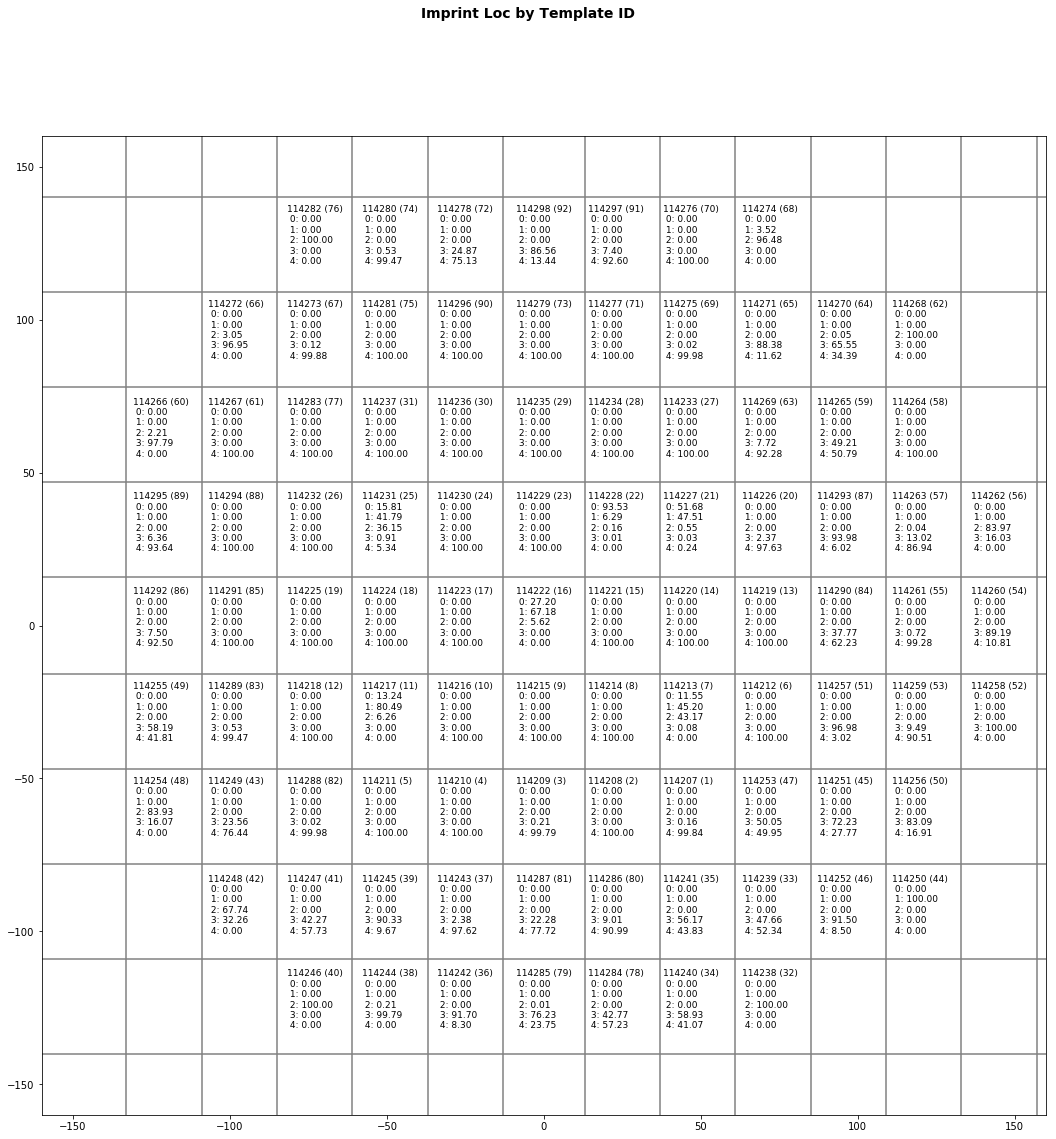

In [29]:
plot_file_pdf = "%s/TTM_signals_per_field.pdf" % (paths.tmp_dir)
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages(plot_file_pdf)
# set the file's metadata via the PdfPages object:
d = pdf.infodict() 
d['Title'] = "TTM_signals_per_field"
d['Author'] = 'Tom Rafferty'
d['Subject'] = 'TTM CanonLan Interface Analysis'
d['CreationDate'] = datetime.datetime.today()
d['ModDate'] = datetime.datetime.today()


fig = plt.figure(figsize=(18,18))
fig.suptitle('Imprint Loc by Template ID', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

for template_id, d in TTMStream_data.items():    
    field_pos = d[1]
    shot_num = list(TTMStream_data.keys()).index(template_id) + 1
    
    validx = validx_by_template_id[template_id]
    total = 0
    for idx in range(5):
        total += validx[idx]
    
    #print("%d: [%f, %f]" % (k, v[0], v[1]) )
    tt = "%s (%d)\n" % (template_id, shot_num) 
    for idx in range(5):
        tt += " %d: %.2f\n" % (idx, ((validx[idx] / float(total)) * 100))
    #tt = "%s\n0:100%%\n1:70%%\n2:70%%\n3:70%%\n4:70%%" % k
    ax.text(int(field_pos[0])-5, int(field_pos[1])-10, tt, fontsize=9)

pitch_y = 31
offset_y = 16
pitch_x = 24
offset_x = 13
for i in range(5):
    plt.axhline(offset_y+(i*pitch_y), color='gray')
for i in range(5):
    plt.axhline(-offset_y-(i*pitch_y), color='gray')
for i in range(7):
    plt.axvline(offset_x+(i*pitch_x), color='gray')
for i in range(6):
    plt.axvline(-offset_x-(i*pitch_x), color='gray')

ax.axis([-160, 160, -160, 160])

plt.show()

fig.savefig(pdf, format='pdf')
pdf.close()


In [30]:
def plot_series(df, title_str, query_str, save_pdf):
    df_sub = df.query(query_str)
    
    df_labels = [
        ('Cam 0 - X', 'C0 post measx_mm', 'C0 cmeasx_mm','C0 measx_mm','C0 scorex','C0 cscorex'),
        ('Cam 0 - Y', 'C0 post measy_mm', 'C0 cmeasy_mm','C0 measy_mm','C0 scorey','C0 cscorey'),
        ('Cam 1 - X', 'C1 post measx_mm', 'C1 cmeasx_mm','C1 measx_mm','C1 scorex','C1 cscorex'),
        ('Cam 1 - Y', 'C1 post measy_mm', 'C1 cmeasy_mm','C1 measy_mm','C1 scorey','C1 cscorey'),
        ('Cam 2 - X', 'C2 post measx_mm', 'C2 cmeasx_mm','C2 measx_mm','C2 scorex','C2 cscorex'),
        ('Cam 2 - Y', 'C2 post measy_mm', 'C2 cmeasy_mm','C2 measy_mm','C2 scorey','C2 cscorey'),
        ('Cam 3 - X', 'C3 post measx_mm', 'C3 cmeasx_mm','C3 measx_mm','C3 scorex','C3 cscorex'),
        ('Cam 3 - Y', 'C3 post measy_mm', 'C3 cmeasy_mm','C3 measy_mm','C3 scorey','C3 cscorey')
    ]

    if save_pdf:
        plot_file_pdf = "%s/%s.pdf" % (paths.tmp_dir, title_str)
        from matplotlib.backends.backend_pdf import PdfPages
        pdf = PdfPages(plot_file_pdf)
        # set the file's metadata via the PdfPages object:
        d = pdf.infodict() 
        d['Title'] = title_str
        d['Author'] = 'Tom Rafferty'
        d['Subject'] = 'TTM CanonLan Interface Analysis'
        d['CreationDate'] = datetime.datetime.today()
        d['ModDate'] = datetime.datetime.today()
        
        # setup vars to control page layout
        num_plots = len(df_labels)
        plots_per_page = num_plots
        num_pages = np.ceil(num_plots / plots_per_page)
        nb_pages = int(np.ceil(num_plots / float(plots_per_page)))
        grid_size = (plots_per_page, 1)

        print("Creating PDF (%s) with %d pages." % (plot_file_pdf, num_pages))
        print("Total plots: %d, plots per page: %d" % (num_plots, plots_per_page))
    
    #fig = plt.figure(figsize=(18,3))
    fig, axes = plt.subplots(nrows=plots_per_page, ncols=1, squeeze=True, figsize=(18,(4*plots_per_page)))
    
    for label_num, df_label in enumerate(df_labels):
        time_s = df_sub['time_s']
        post_meas = df_sub[df_label[1]]
        cmeas = df_sub[df_label[2]]
        meas = df_sub[df_label[3]]
        score = (df_sub[df_label[4]] + df_sub[df_label[5]]) / 100

        print(" ...Plotting series %d of %d" % (label_num+1, num_plots))
    #     print(len(df_col))
    #     print(len(time_s))

        delta_s = [0]
        for idx, d in enumerate(time_s):
            if idx > 0:
                delta_s.append(abs(d - d_prev))
            d_prev = d
        
        #fig, ax1 = plt.subplots(figsize=(18,3))
        #plt.subplot(num_plots,1,label_num+1)
        #ax1 = plt.gca()        
        ax1 = axes[label_num]
        
        ax1.plot(time_s, cmeas,  color='b', label='coarse')
        ax1.plot(time_s, post_meas,  color='g', label='post_meas')
        ax1.set_xlabel('time (s)')
        # Make the y-axis label, ticks and tick labels match the line color.
        ax1.set_ylabel('cmeas, meas', color='b')
        ax1.tick_params('y', colors='b')
        ax1.set_title("%s - %s" % (title_str, df_label[0]))

        ax2 = ax1.twinx()
        ax2.plot(time_s, score,  color='m', label='score')
        ax2.plot(time_s, delta_s,  color='c', label='delta_s')
        ax2.set_ylabel('score, delta_s', color='m')
        ax2.tick_params('y', colors='m')

        leg1 = ax1.legend(loc='upper left', shadow=True)
        leg2 = ax2.legend(loc='upper right', shadow=True)

    plt.ylim([0,1])
    plt.title(title_str)
    plt.tight_layout()
    plt.show()
                    
    if save_pdf:
#         for fig in figs:
#             fig.savefig(pdf, format='pdf')
        print("Saving pdf...")
        fig.savefig(pdf, format='pdf')
        pdf.close()


In [65]:
def plot_scores(df, title_str, query_str, save_pdf):
    df_sub = df.query(query_str)
    
    skip_redundant = True
    if skip_redundant:
        size_factor = 1.0
        df_labels = [
            ('Cam 0 Score X,Y', 'C0 scorex'),
            ('Cam 1 Score X,Y', 'C1 scorex'),
            ('Cam 2 Score X,Y', 'C2 scorex'),
            ('Cam 3 Score X,Y', 'C3 scorex') ]
    else:
        size_factor = 0.7
        df_labels = [
            ('Cam 0 Score x','C0 scorex','C0 cscorex'),
            ('Cam 0 Score y','C0 scorey','C0 cscorey'),
            ('Cam 1 Score x','C1 scorex','C1 cscorex'),
            ('Cam 1 Score y','C1 scorey','C1 cscorey'),
            ('Cam 2 Score x','C2 scorex','C2 cscorex'),
            ('Cam 2 Score y','C2 scorey','C2 cscorey'),
            ('Cam 3 Score x','C3 scorex','C3 cscorex'),
            ('Cam 3 Score y','C3 scorey','C3 cscorey') ]

    if save_pdf:
        plot_file_pdf = "%s/%s_TTM_scores.pdf" % (paths.tmp_dir, title_str)
        from matplotlib.backends.backend_pdf import PdfPages
        pdf = PdfPages(plot_file_pdf)
        # set the file's metadata via the PdfPages object:
        d = pdf.infodict() 
        d['Title'] = title_str
        d['Author'] = 'Tom Rafferty'
        d['Subject'] = 'TTM CanonLan Interface Analysis'
        d['CreationDate'] = datetime.datetime.today()
        d['ModDate'] = datetime.datetime.today()
        
        # setup vars to control page layout
        num_plots = len(df_labels)
        plots_per_page = num_plots
        num_pages = np.ceil(num_plots / plots_per_page)
        nb_pages = int(np.ceil(num_plots / float(plots_per_page)))
        grid_size = (plots_per_page, 1)

        print("Creating PDF (%s) with %d pages." % (plot_file_pdf, num_pages))
        print("Total plots: %d, plots per page: %d" % (num_plots, plots_per_page))
    
    plt.close()
    
    #fig = plt.figure(figsize=(18,1))
    fig, axes = plt.subplots(nrows=plots_per_page, ncols=1, squeeze=True, figsize=(18, int((2*plots_per_page)*size_factor)))
    #plt.close(fig)
    
    for label_num, df_label in enumerate(df_labels):
        time_s = df_sub['time_s']
        if skip_redundant:
            score = df_sub[df_label[1]]
        else:
            score = (df_sub[df_label[1]] + df_sub[df_label[2]]) / 2

        ax1 = axes[label_num]
        plt.cla()
        
        ax1.plot(time_s, score,  color='m', label='score')
        ax1.set_xlabel('time (s)')
        # Make the y-axis label, ticks and tick labels match the line color.
        ax1.set_ylabel('Score', color='m')
        ax1.tick_params('y', colors='b')
        ax1.set_title("%s - %s" % (title_str, df_label[0]))
        ax1.set_ylim([-0.5,1.5])
        ax1.yaxis.set_ticks([0,1])

        #leg1 = ax1.legend(loc='upper left', shadow=True)
        
        
        #plt.plot(time_s, score,  label=df_label[1])
    
    #plt.title(title_str)
    plt.tight_layout()
    plt.show()
                    
    if save_pdf:
#         for fig in figs:
#             fig.savefig(pdf, format='pdf')
        print("Saving pdf...")
        fig.savefig(pdf, format='pdf')
        pdf.close()


Creating PDF (/Users/trafferty/tmp/114207-shot1_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


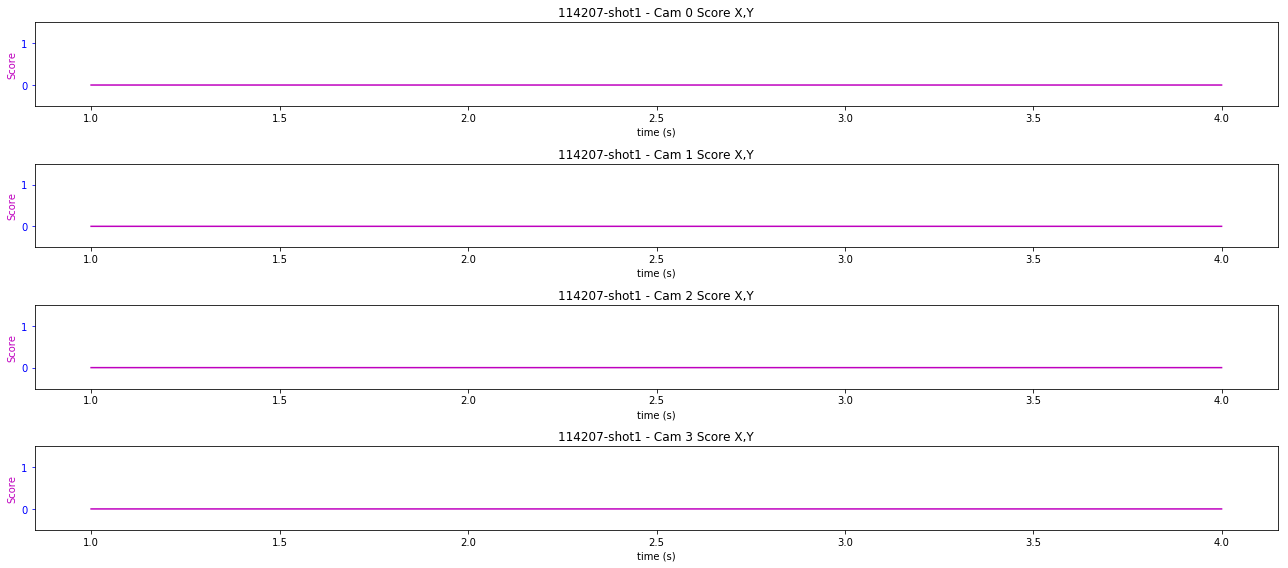

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114208-shot2_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


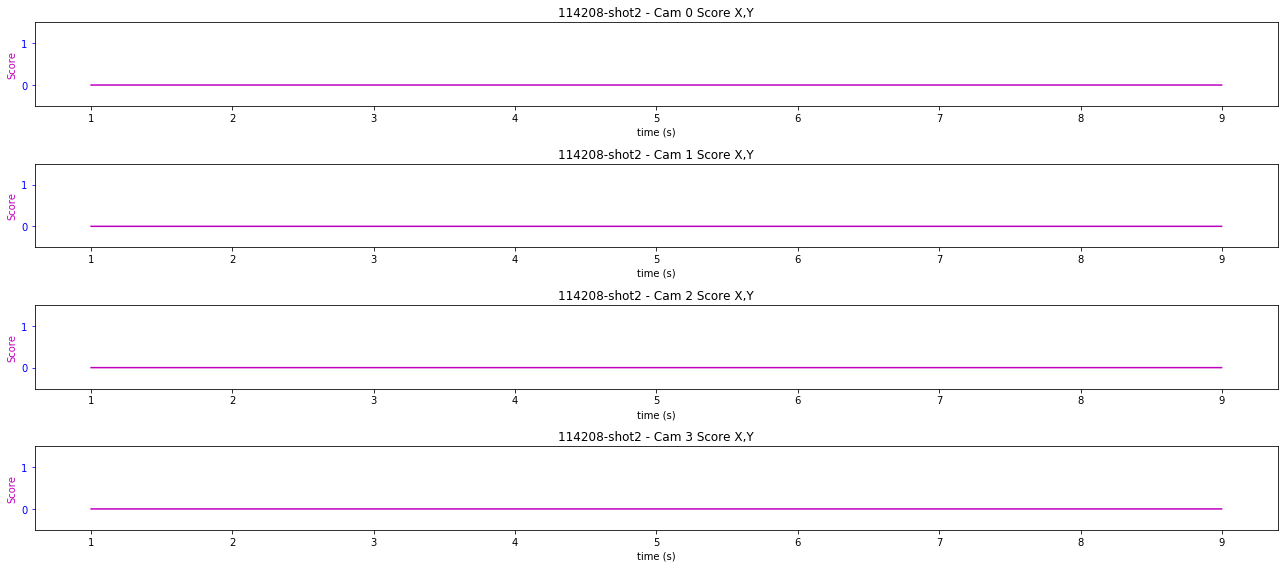

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114209-shot3_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


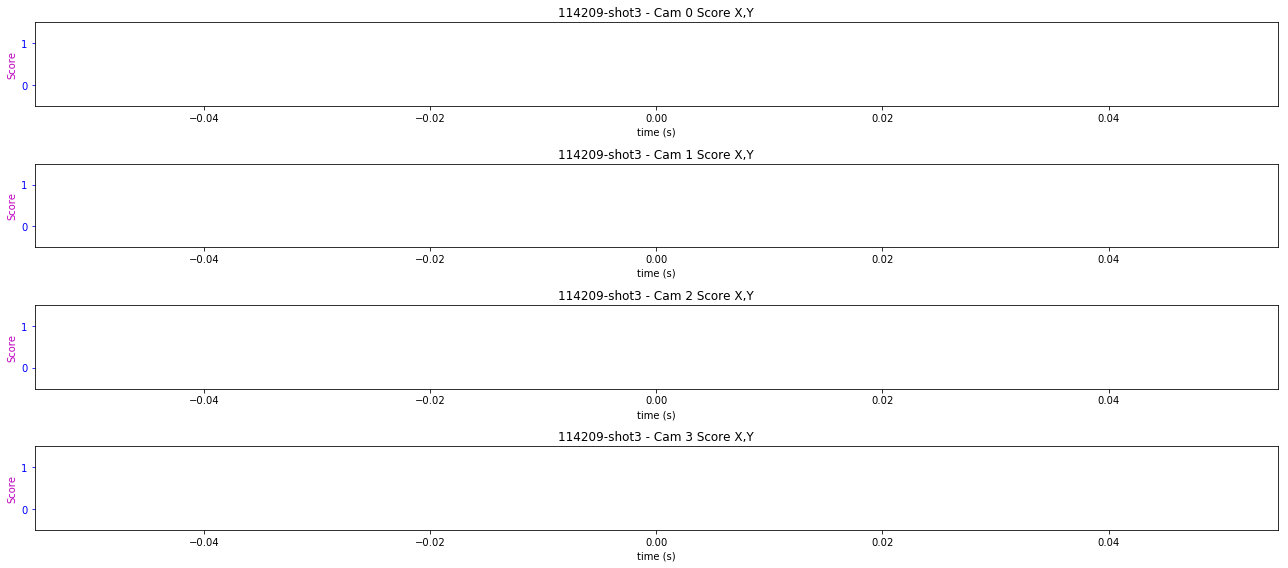

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114210-shot4_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


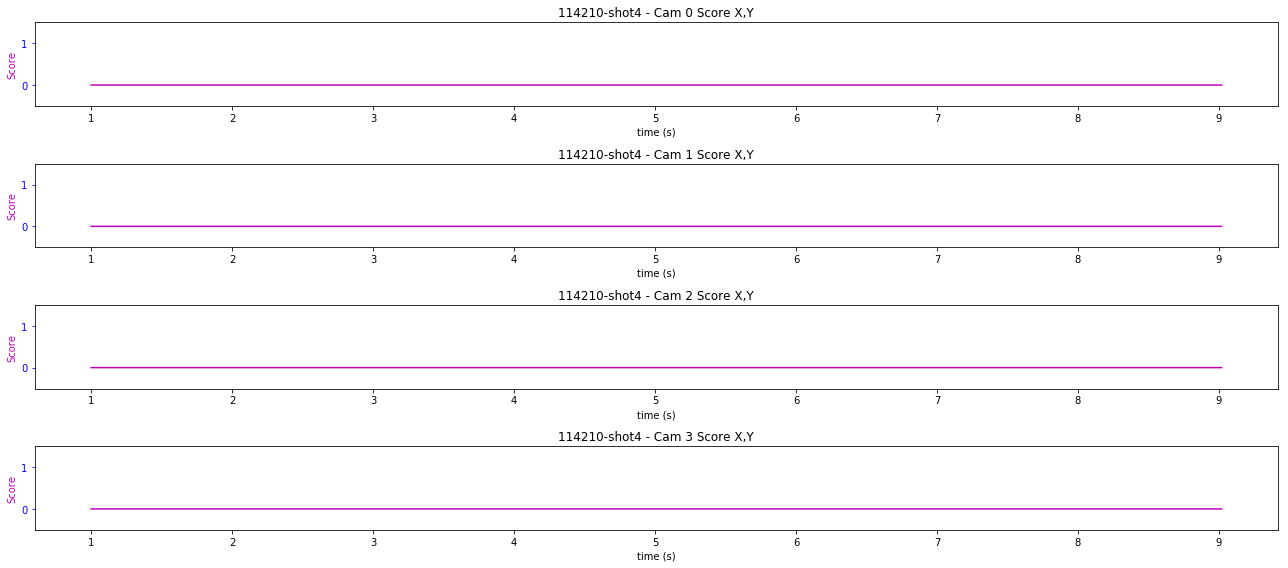

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114211-shot5_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


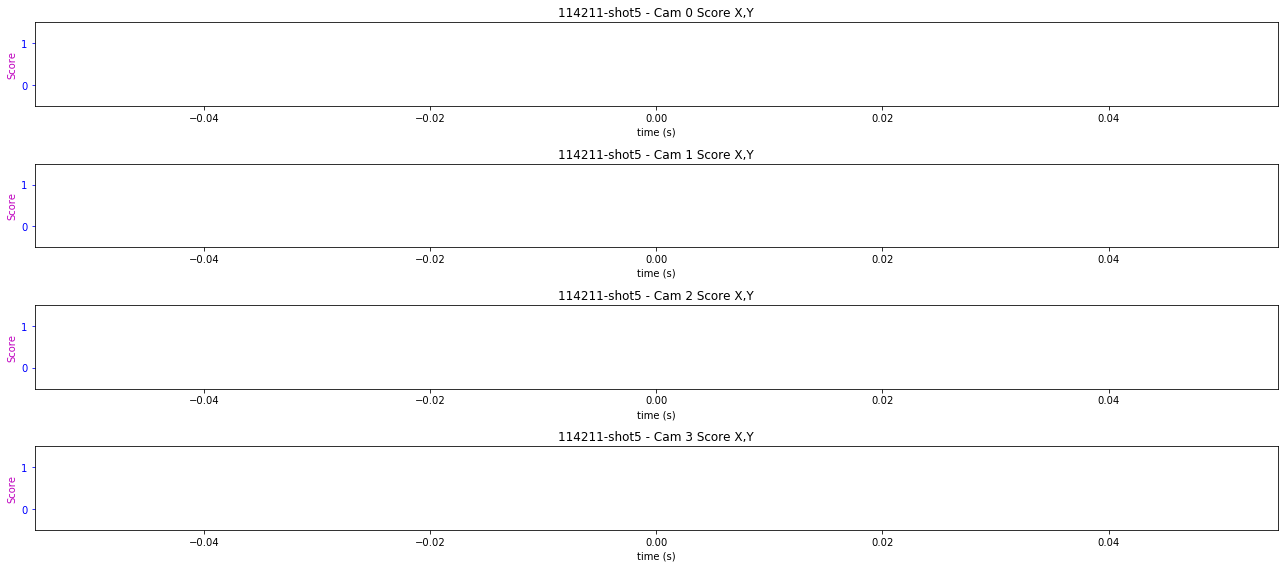

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114212-shot6_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


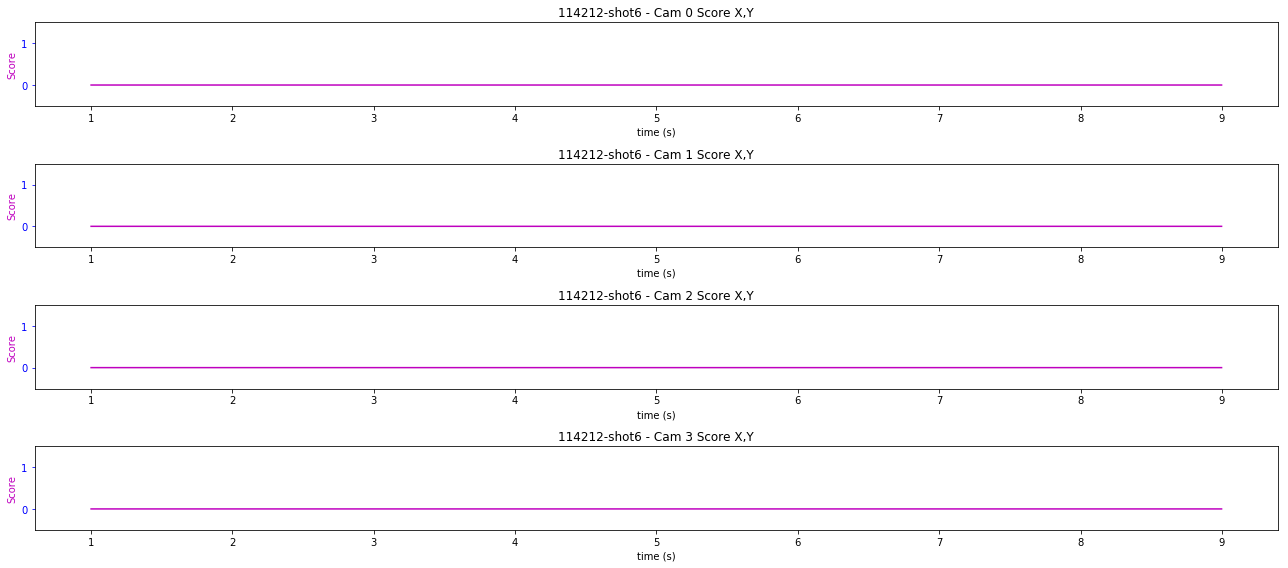

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114213-shot7_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


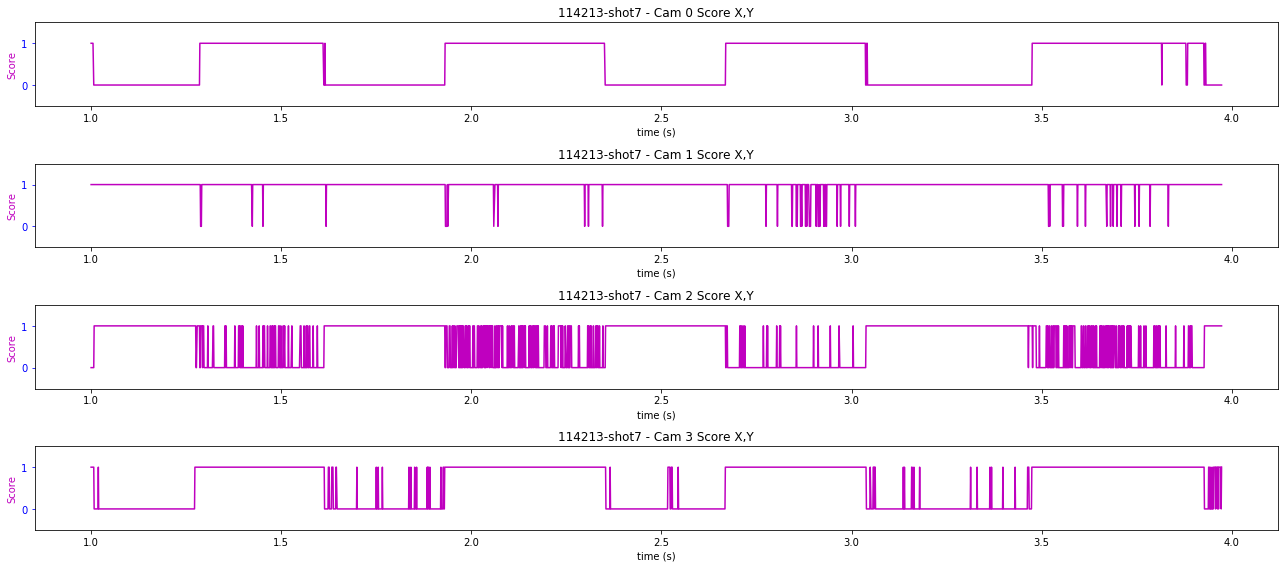

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114214-shot8_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


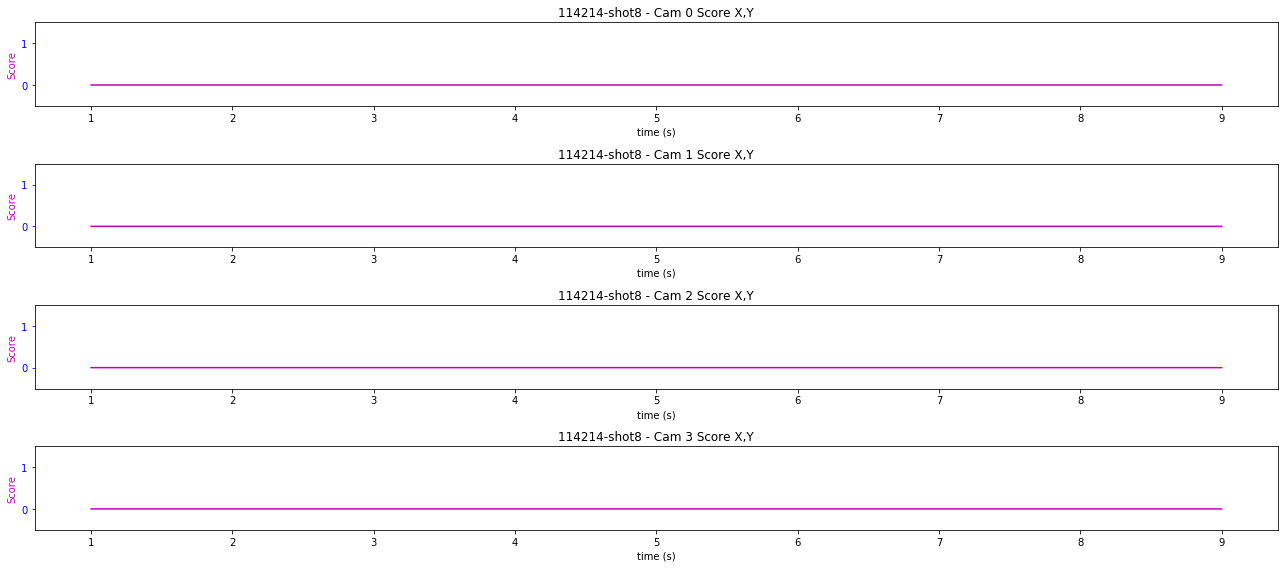

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114215-shot9_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


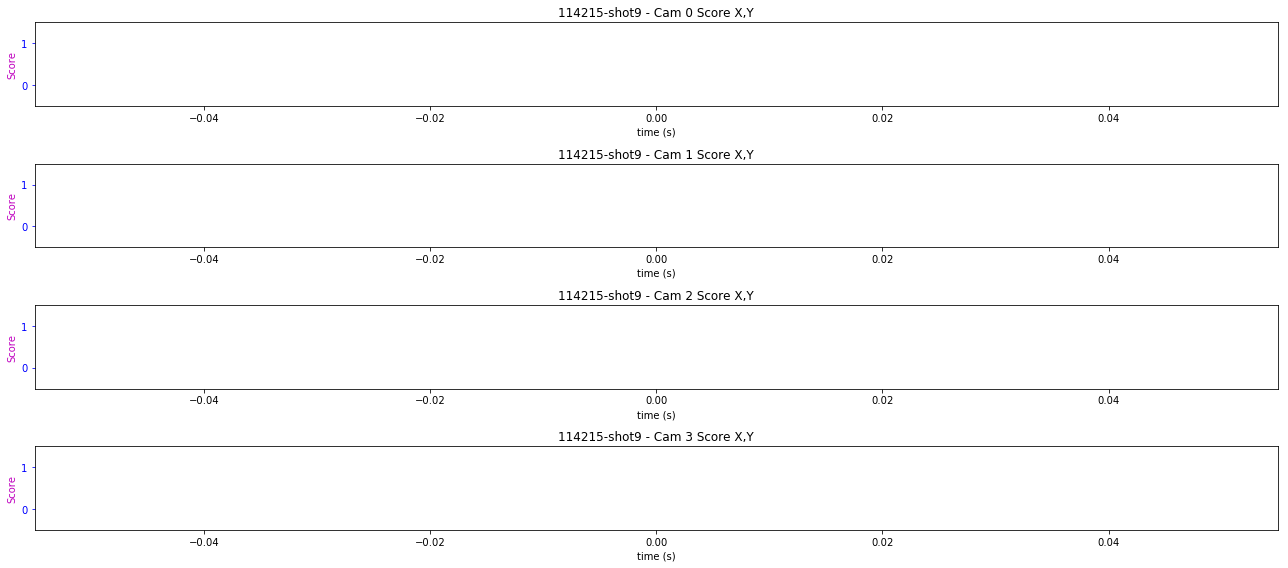

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114216-shot10_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


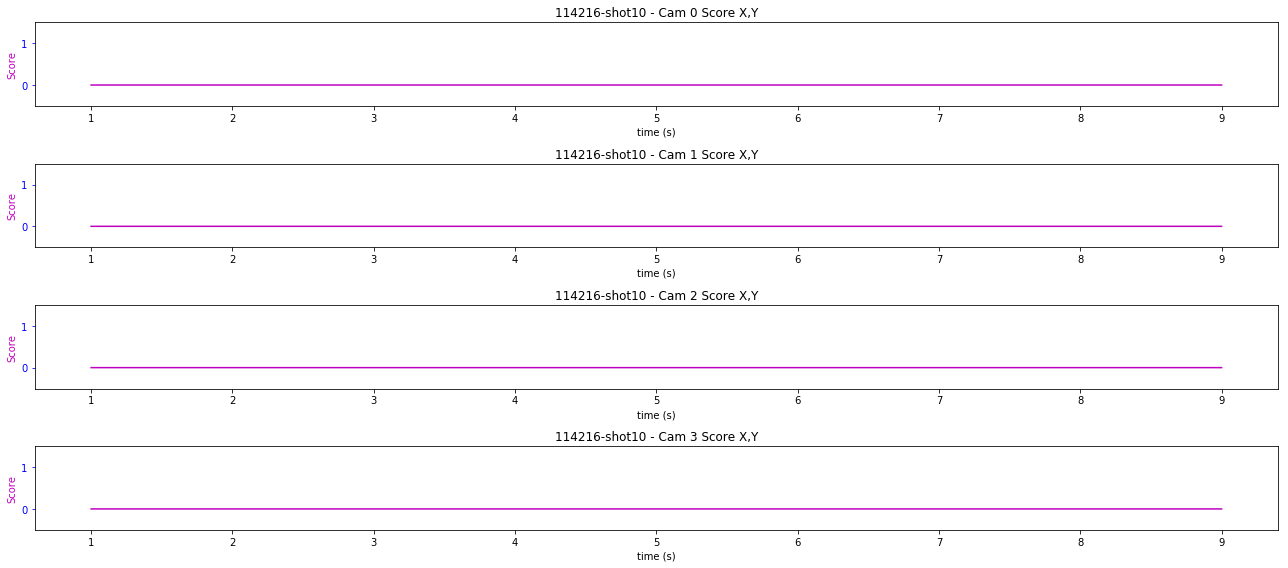

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114217-shot11_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


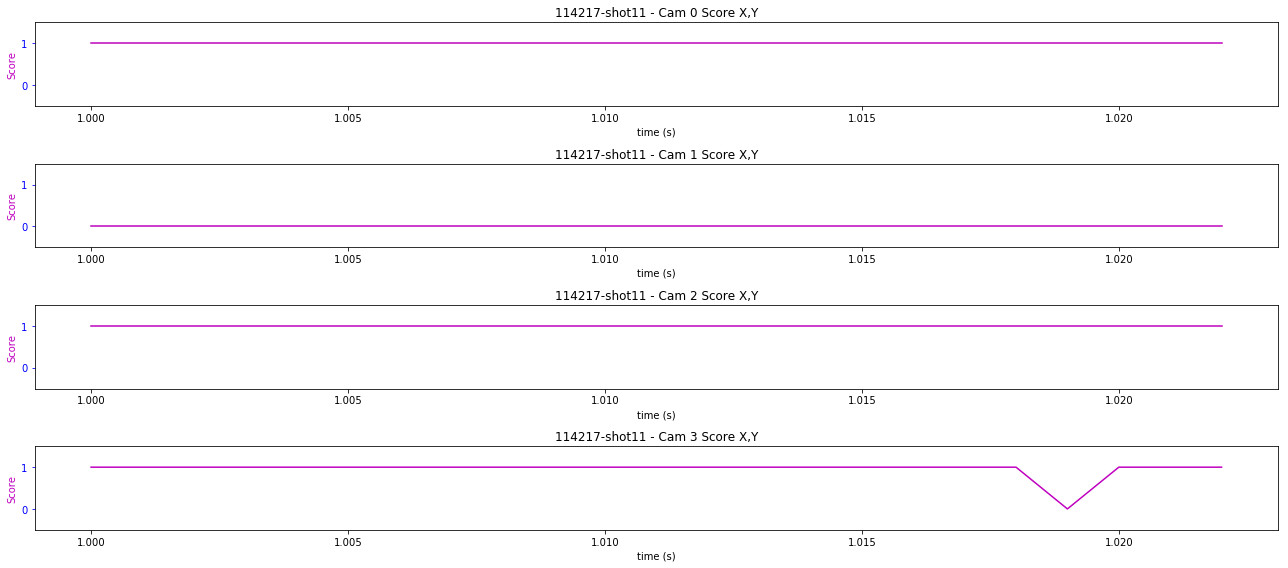

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114218-shot12_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


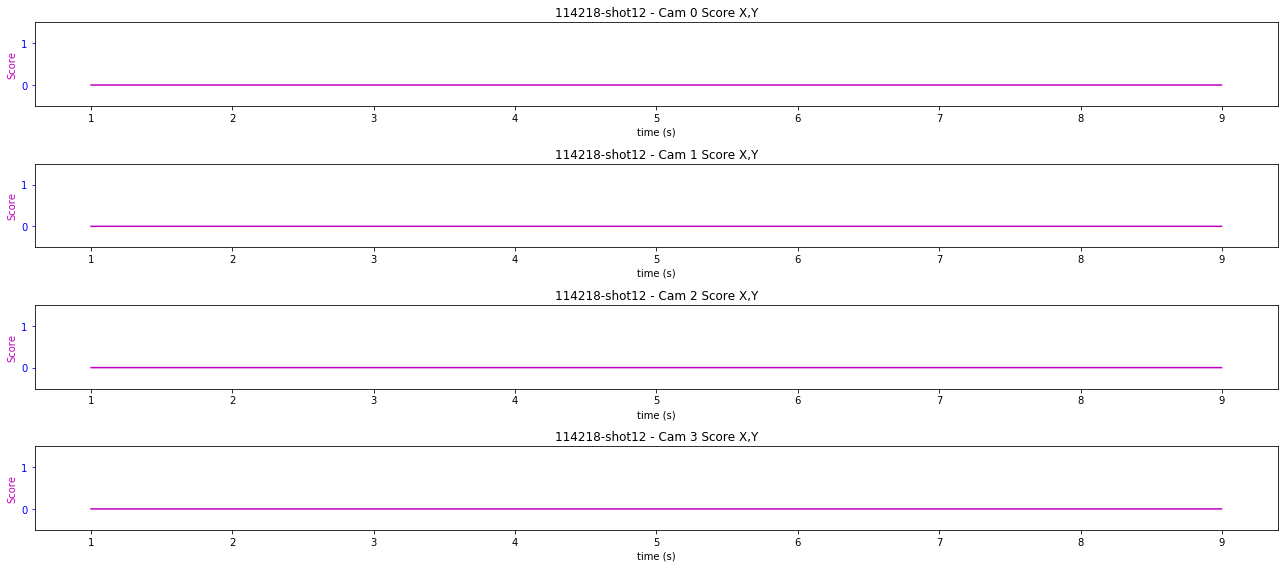

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114219-shot13_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


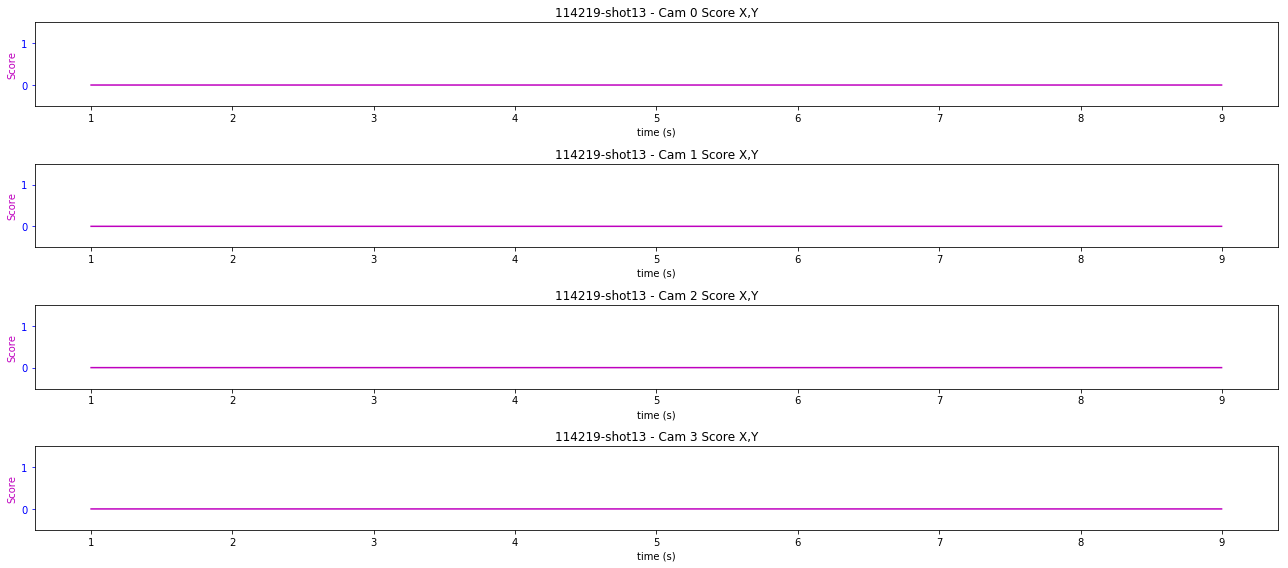

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114220-shot14_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


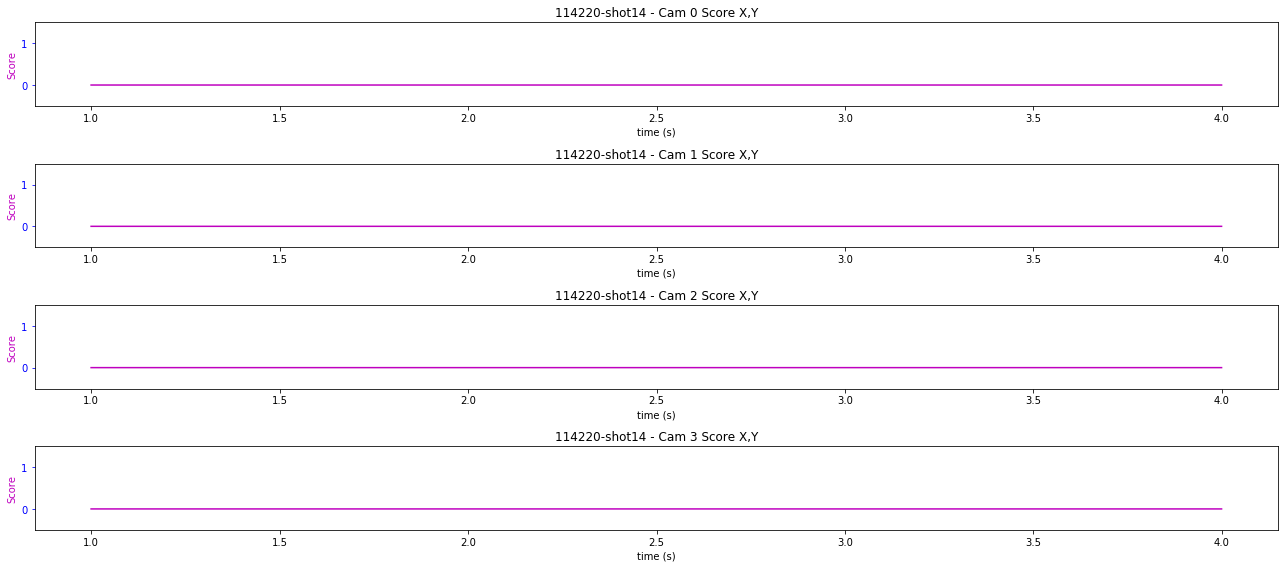

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114221-shot15_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


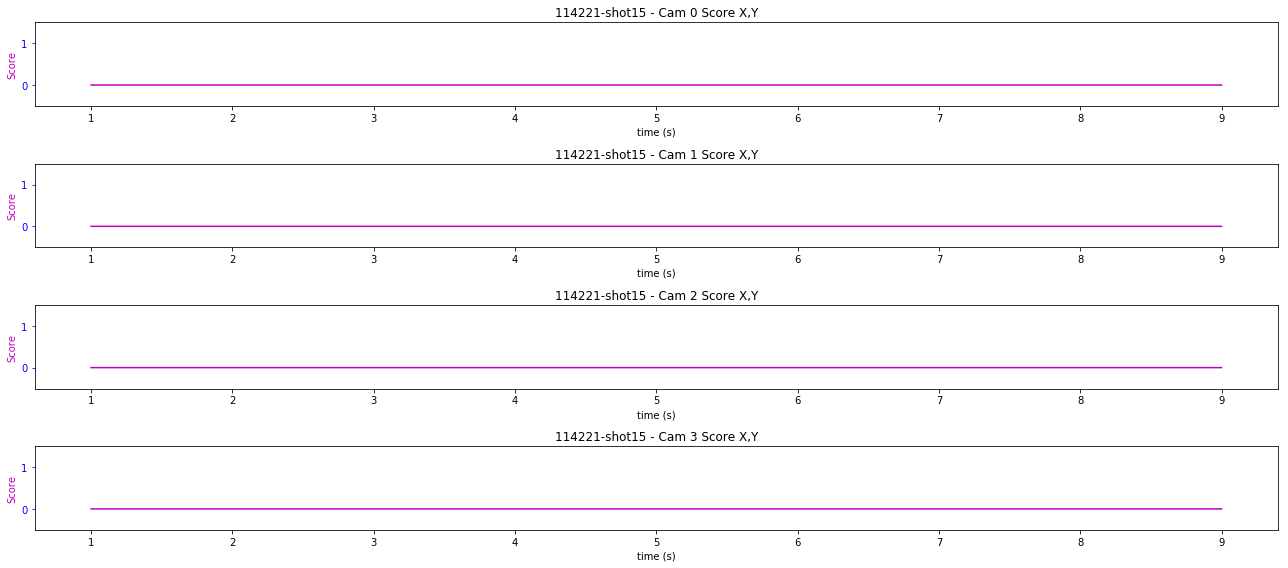

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114222-shot16_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


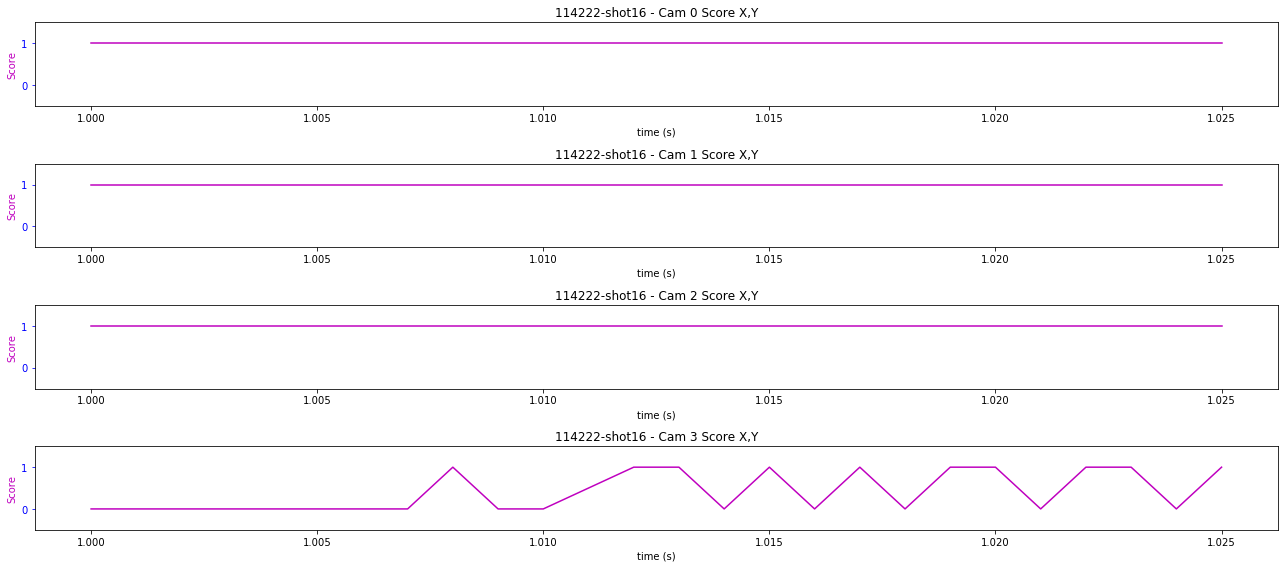

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114223-shot17_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


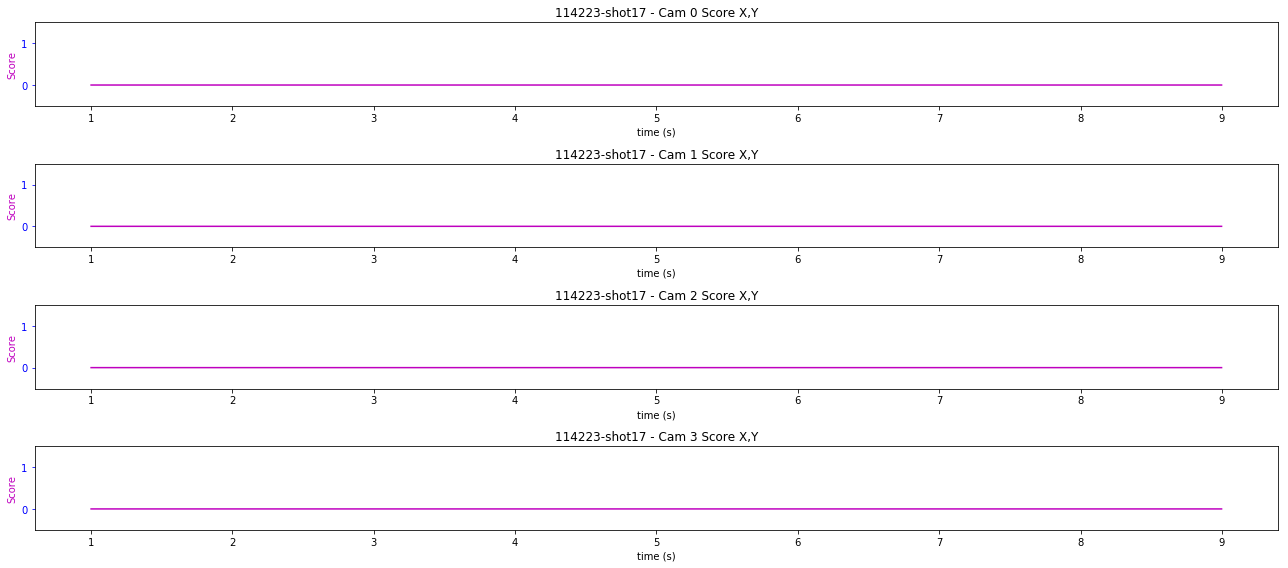

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114224-shot18_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


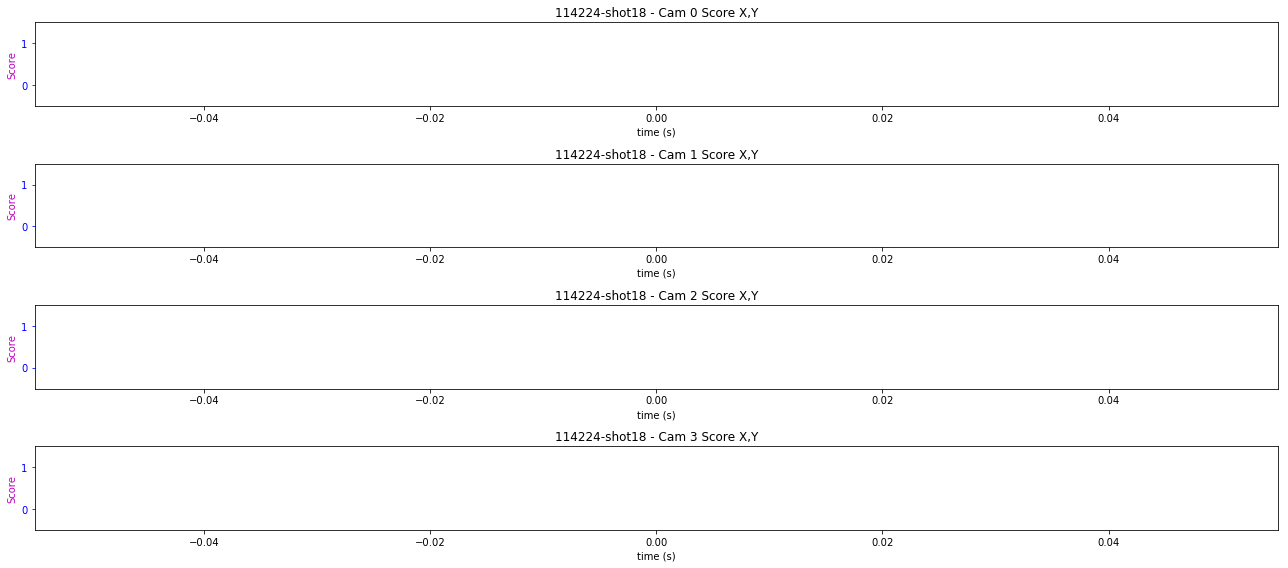

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114225-shot19_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


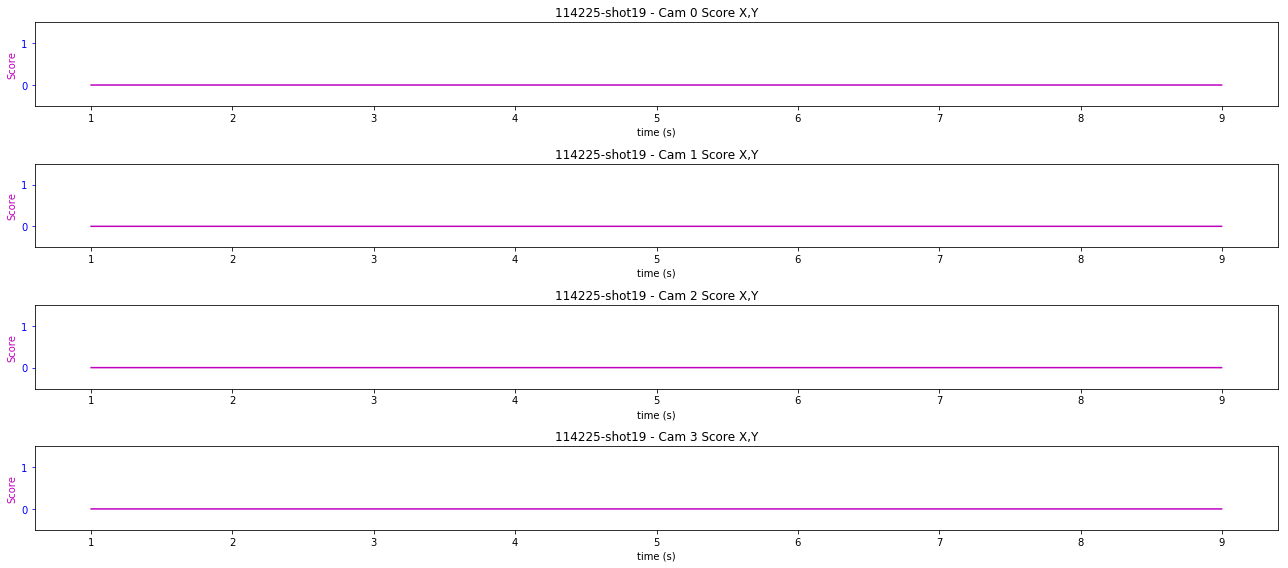

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114226-shot20_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


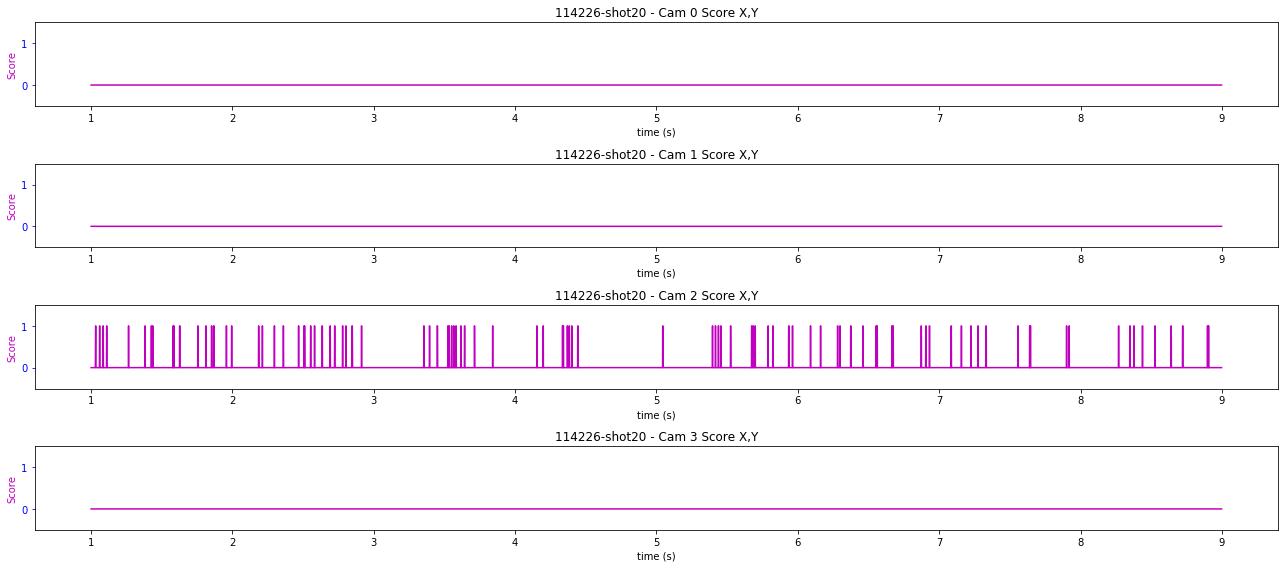

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114227-shot21_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


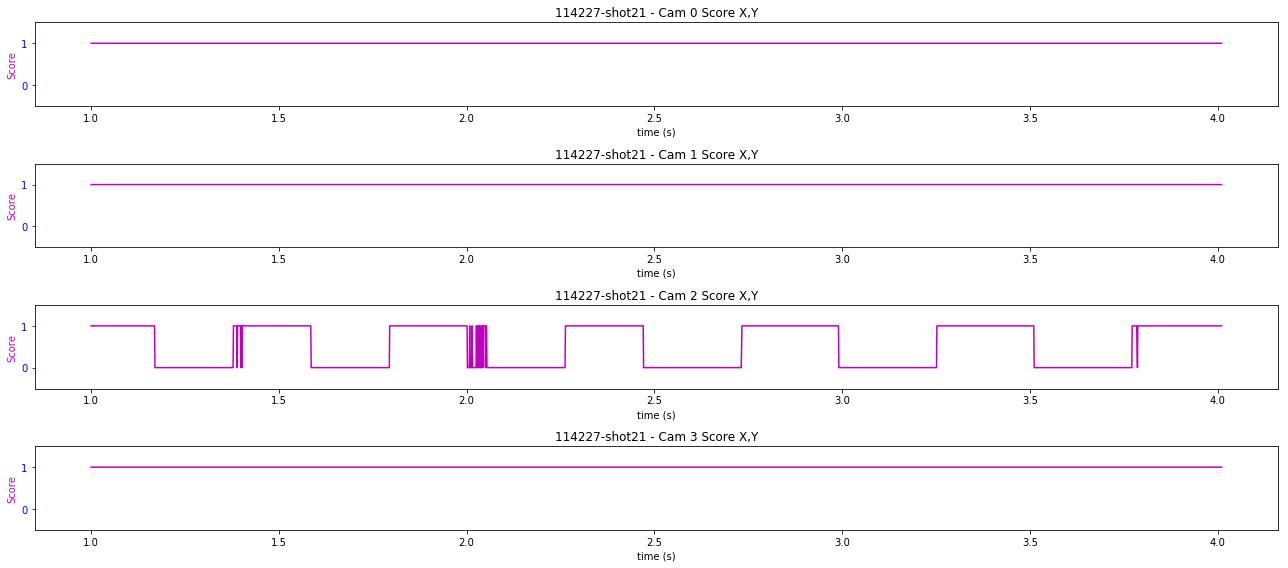

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114228-shot22_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


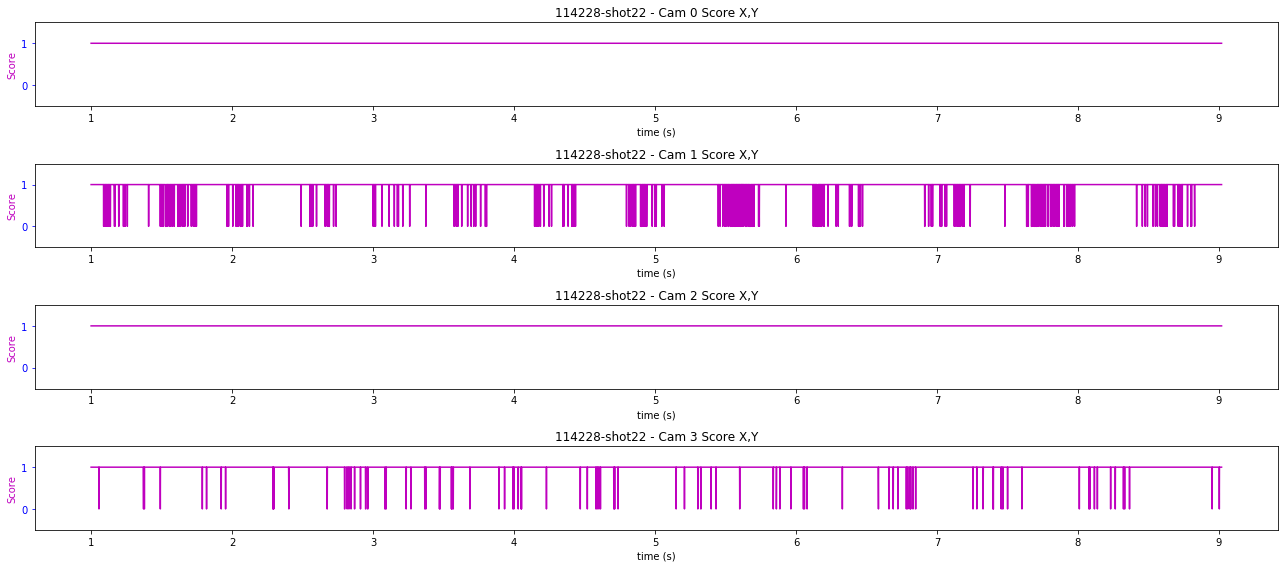

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114229-shot23_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


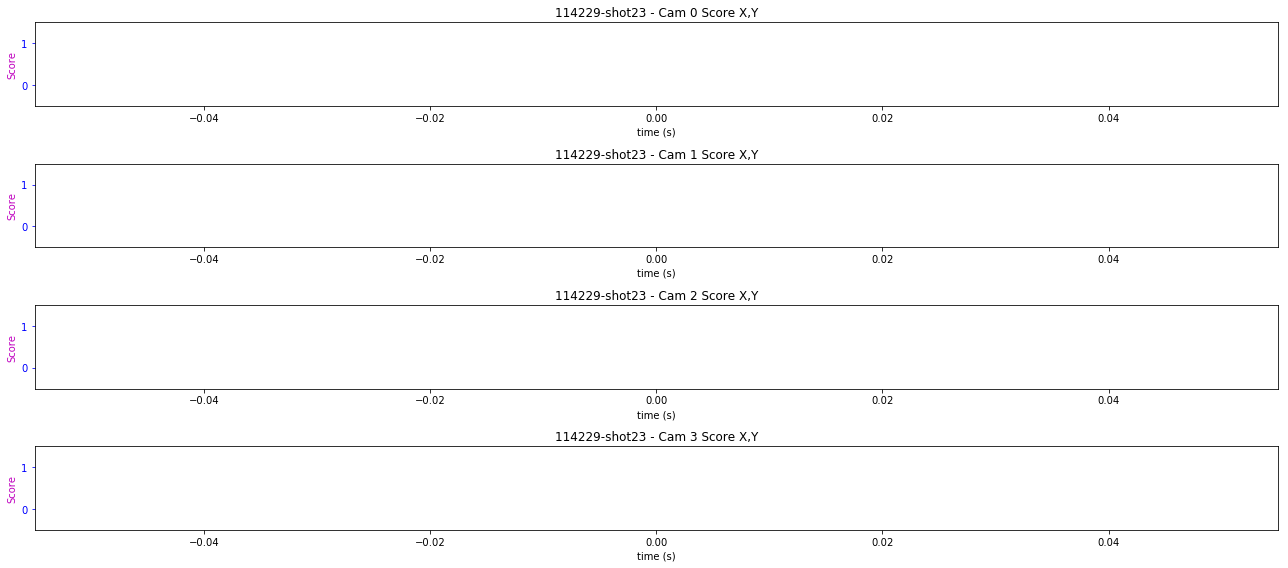

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114230-shot24_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


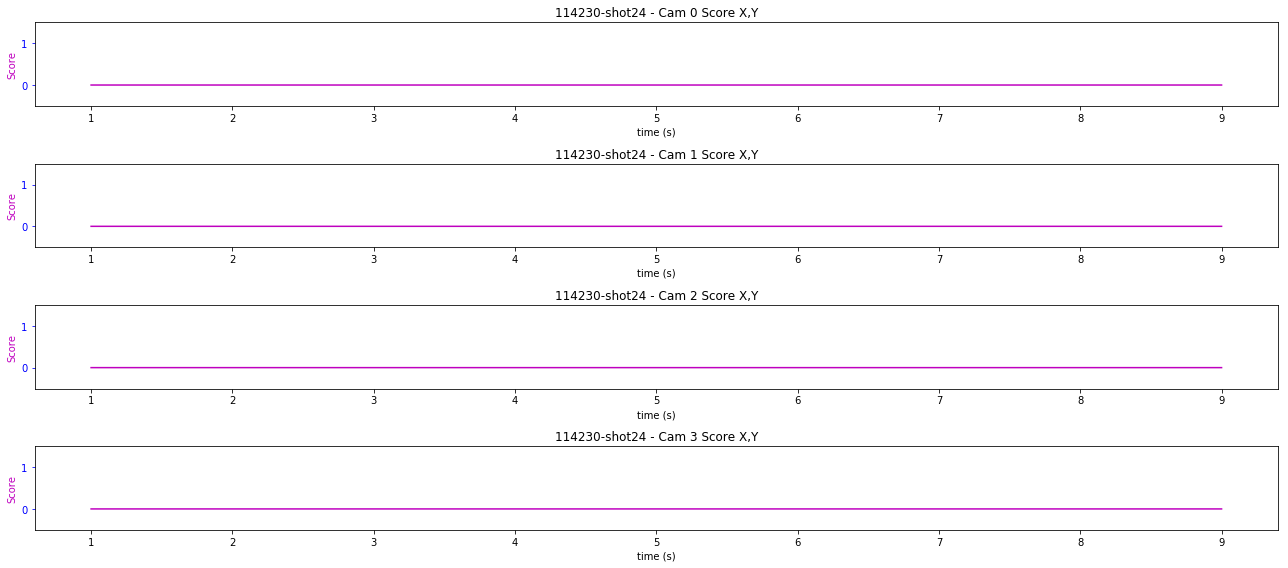

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114231-shot25_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


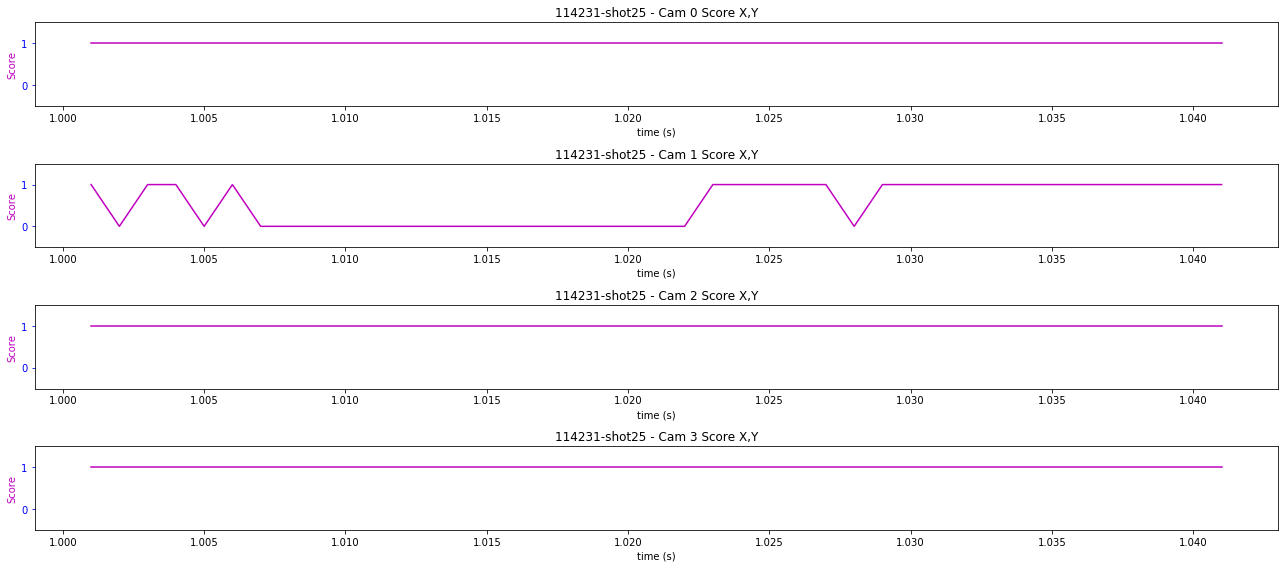

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114232-shot26_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


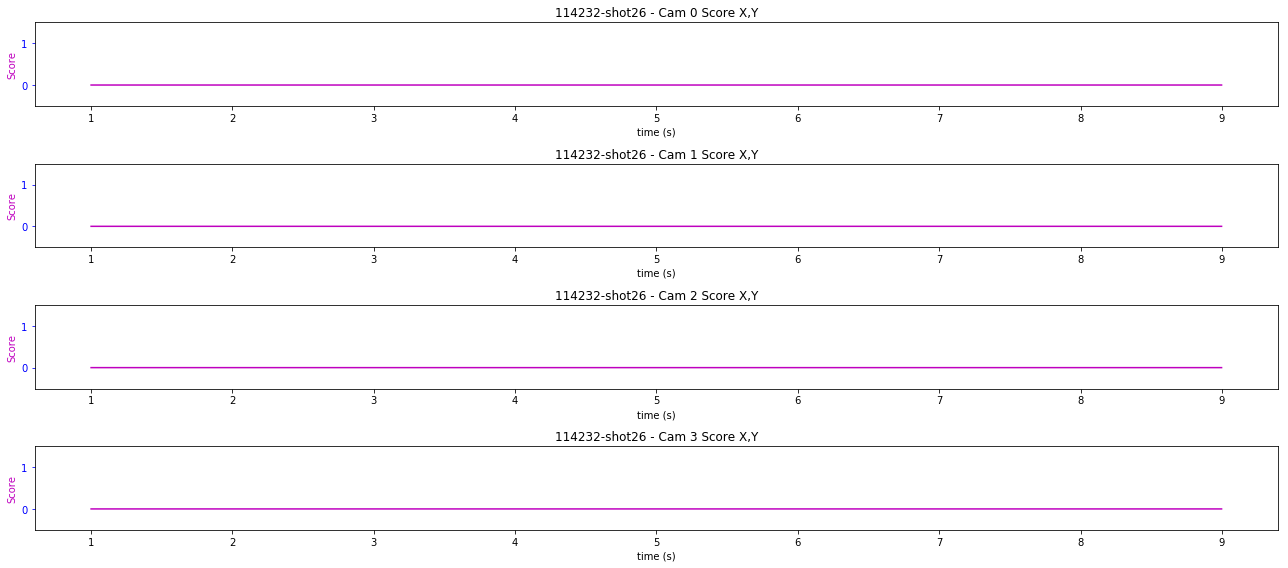

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114233-shot27_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


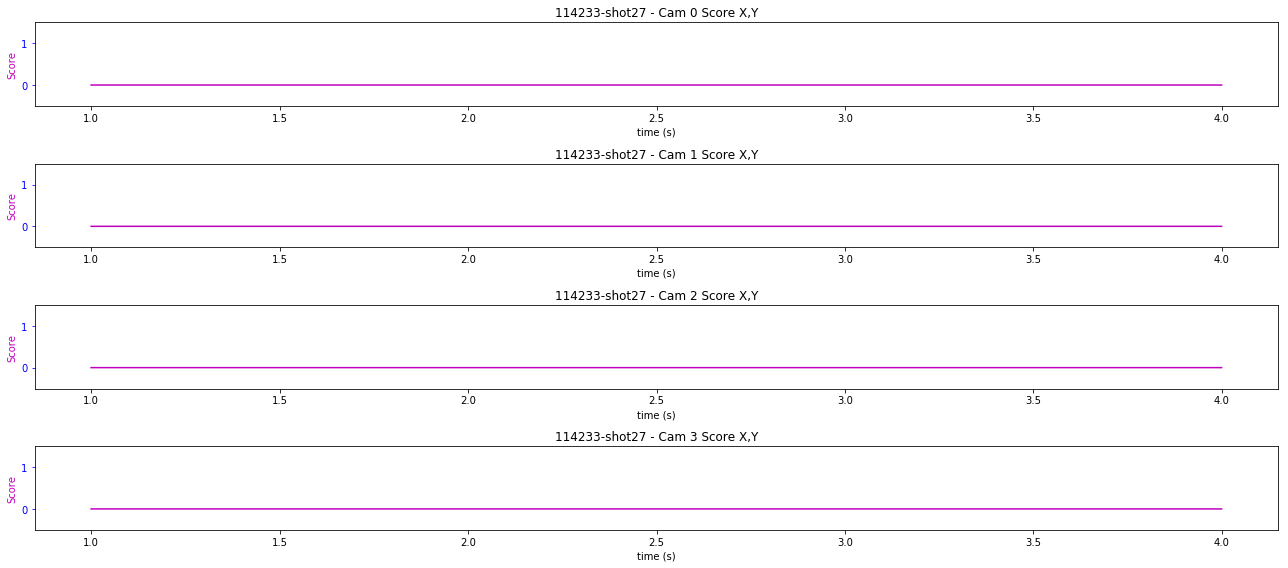

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114234-shot28_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


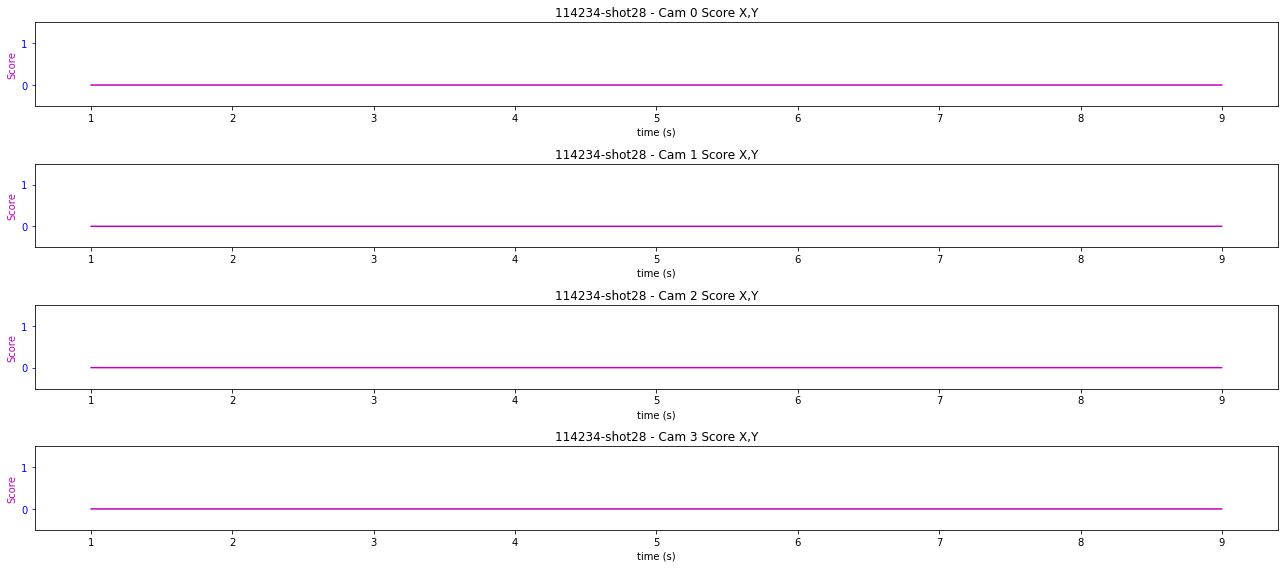

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114235-shot29_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


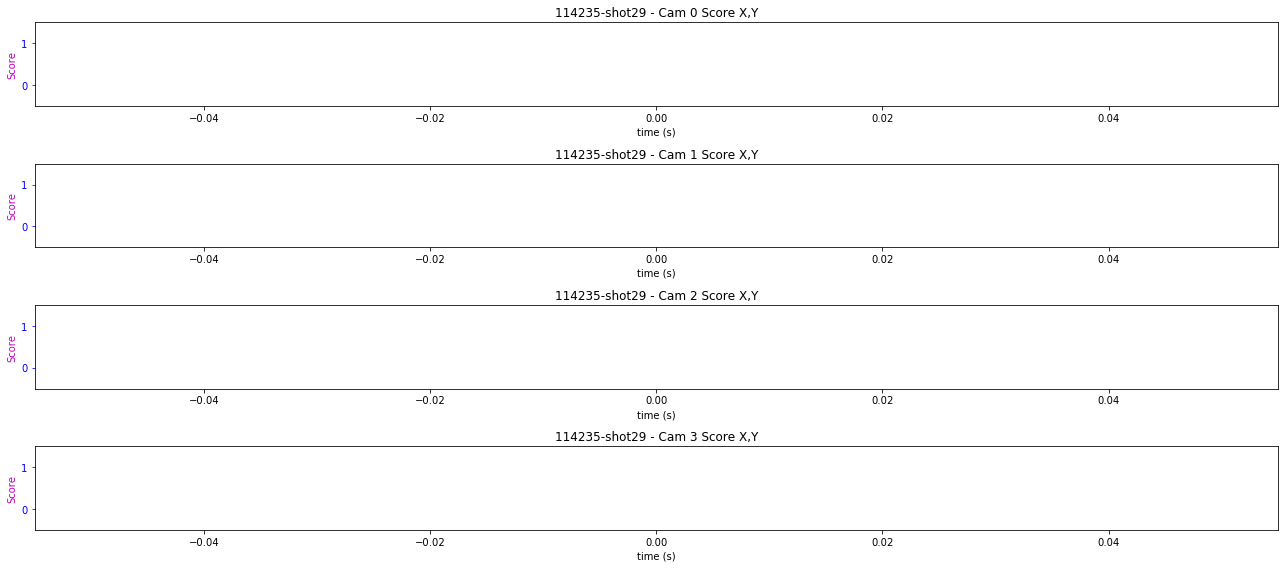

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114236-shot30_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


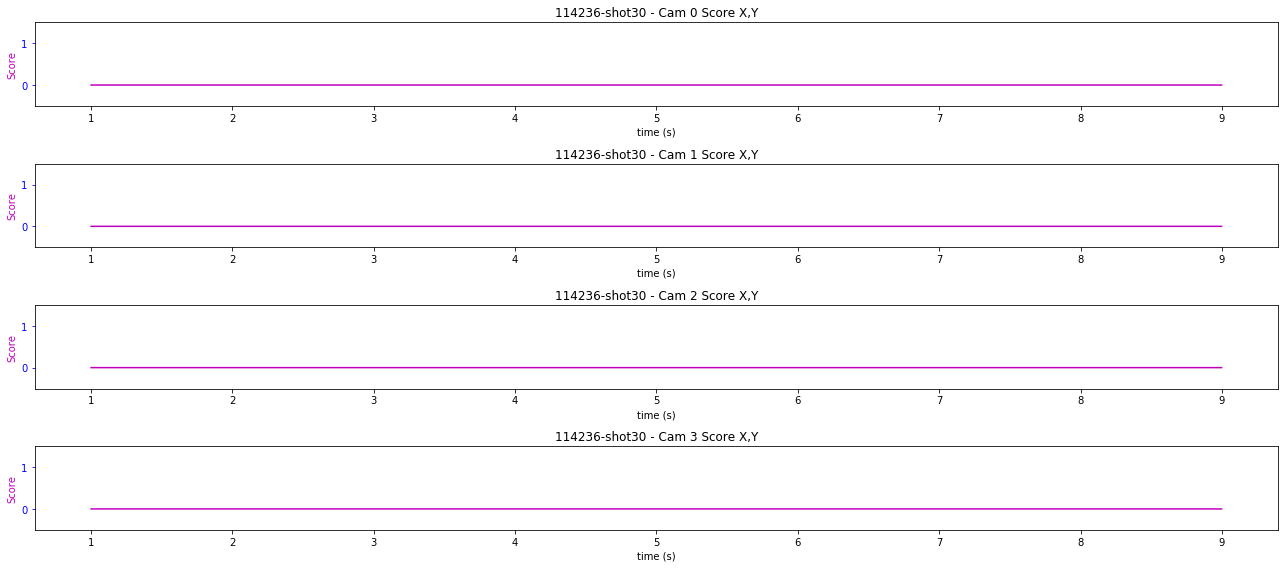

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114237-shot31_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


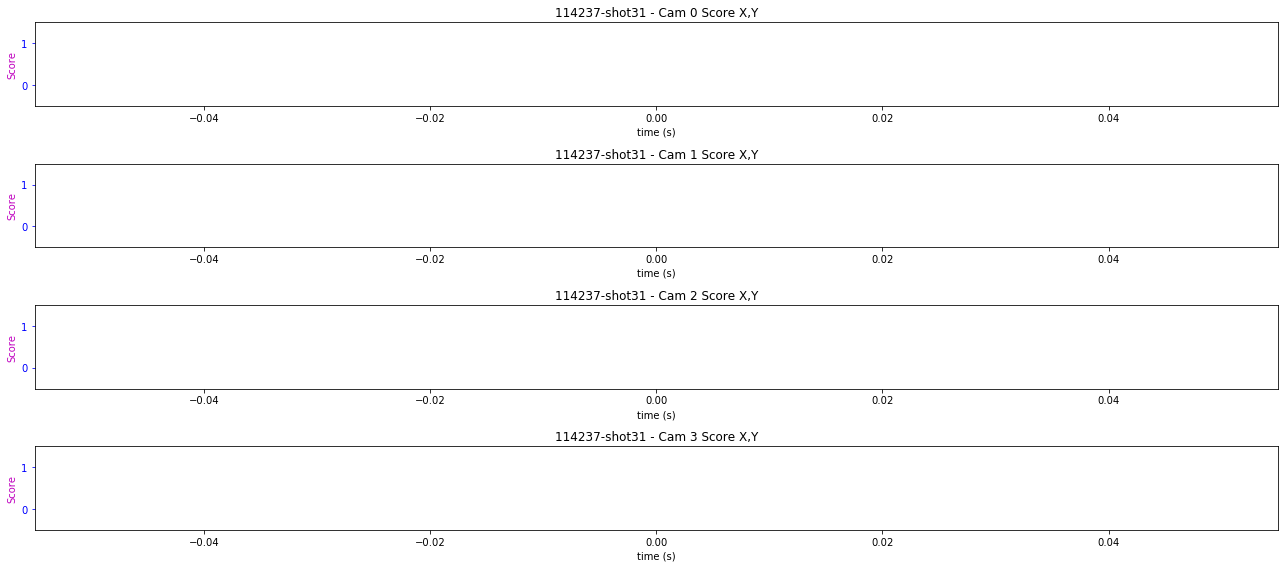

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114238-shot32_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


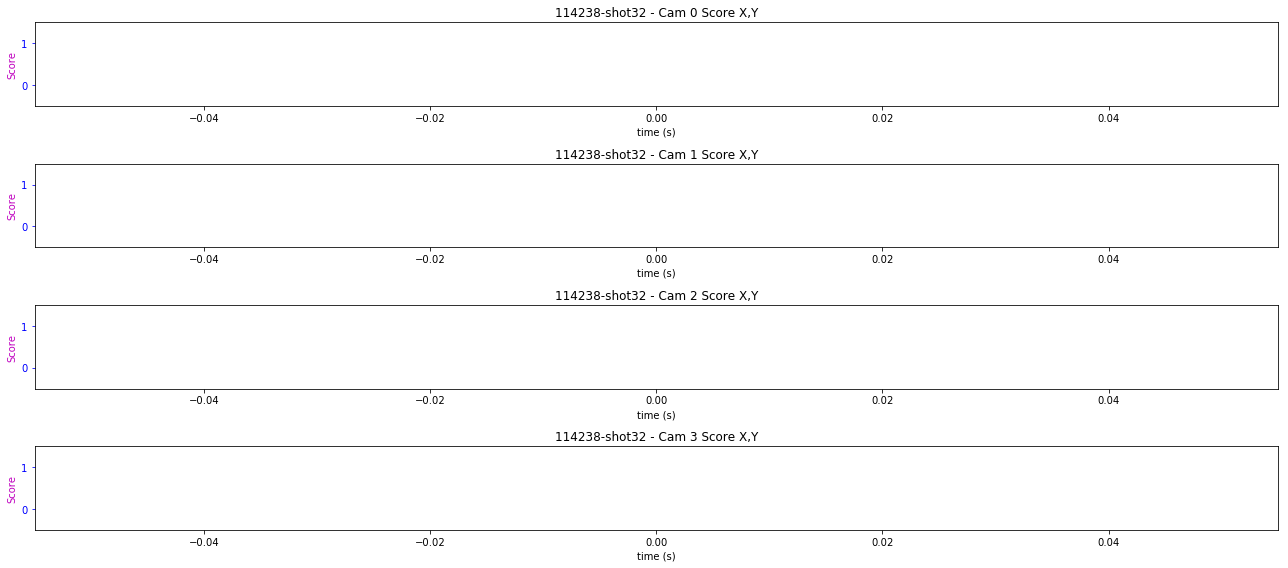

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114239-shot33_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


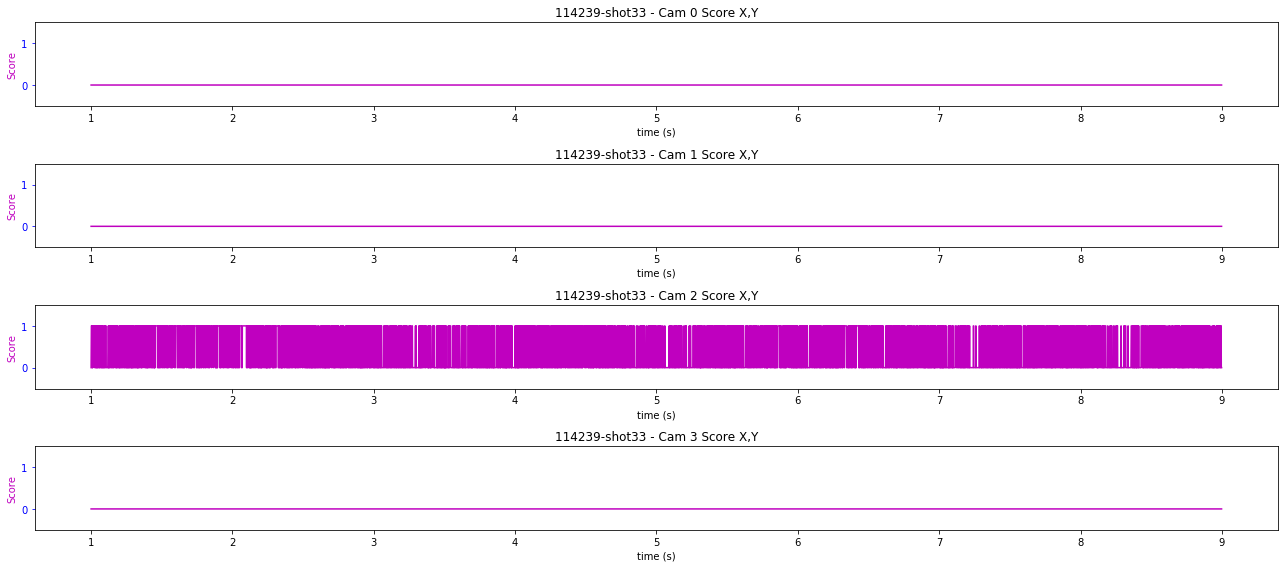

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114240-shot34_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


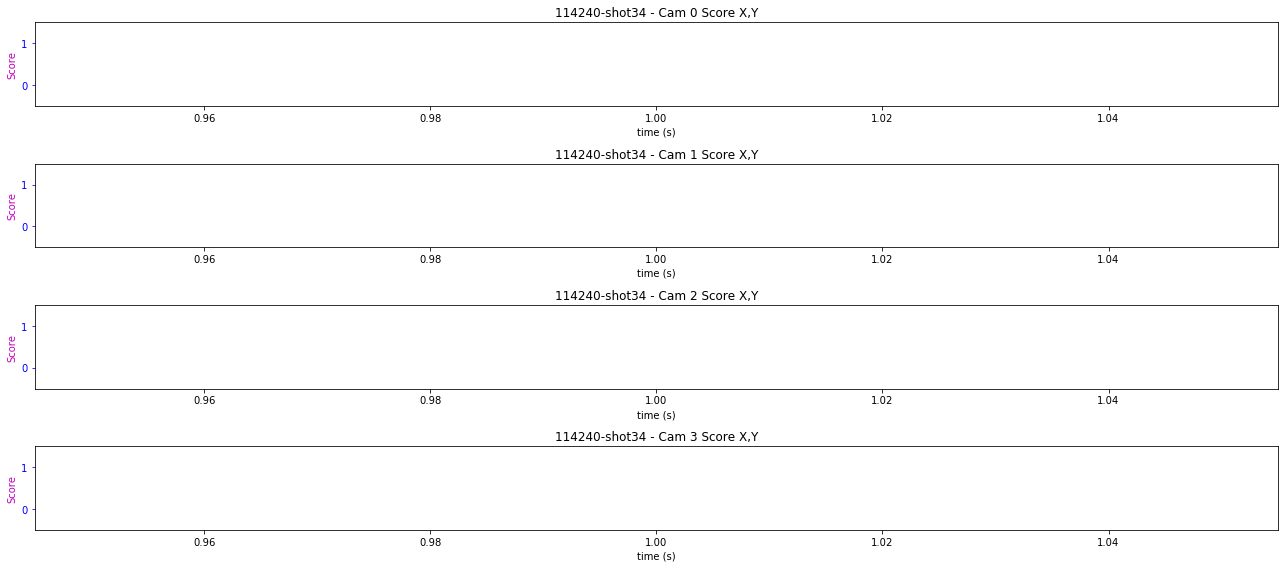

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114241-shot35_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


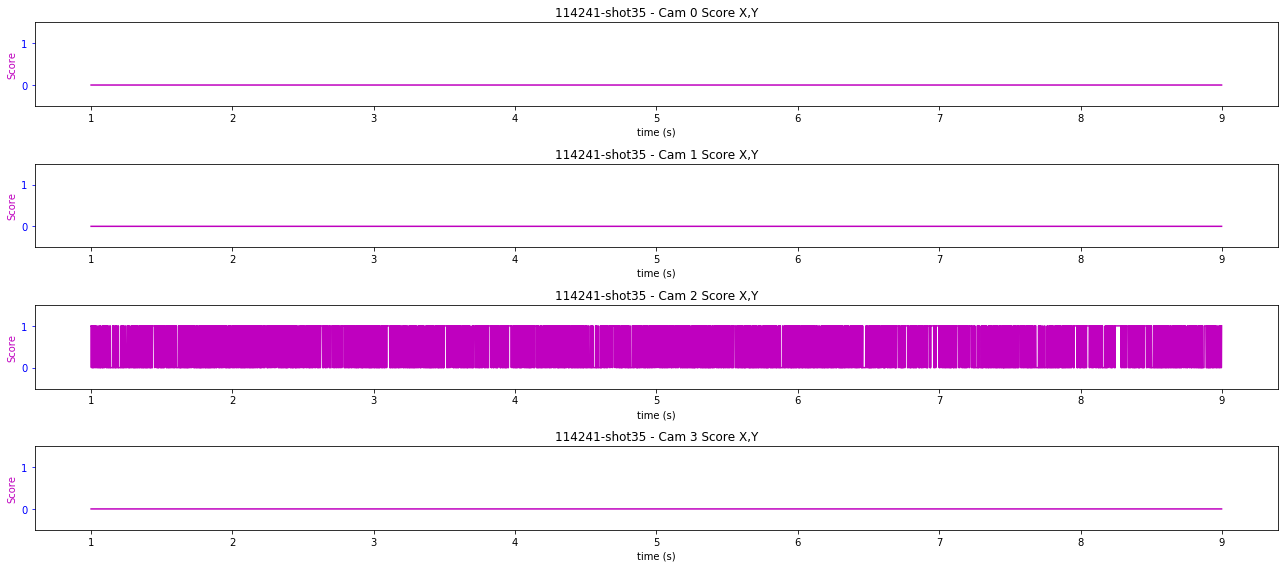

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114242-shot36_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


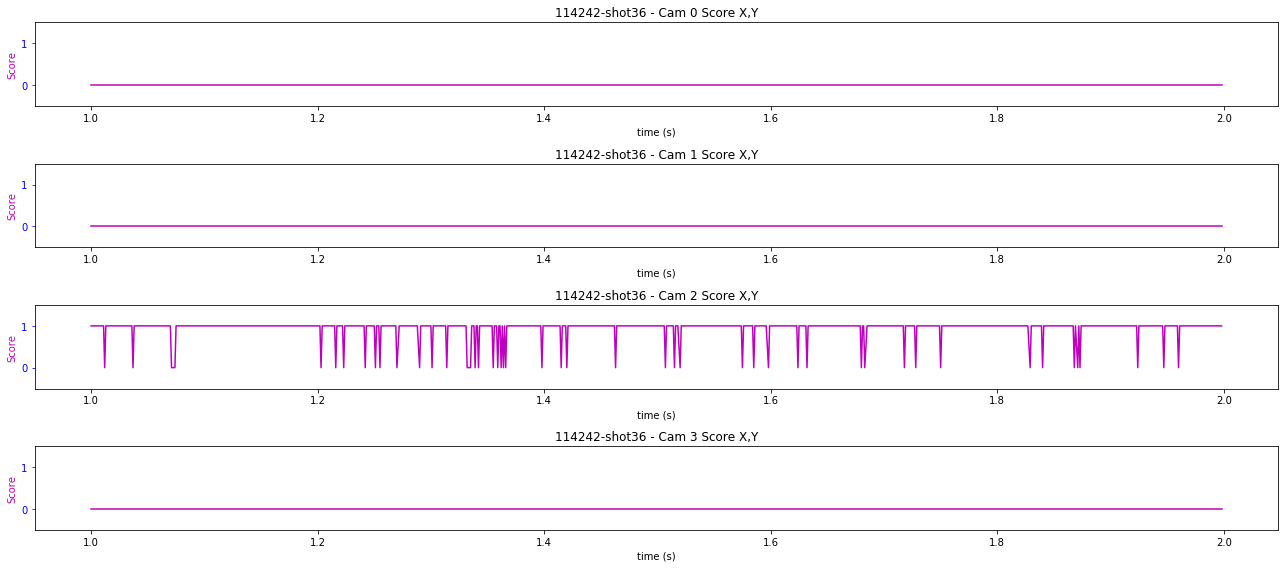

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114243-shot37_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


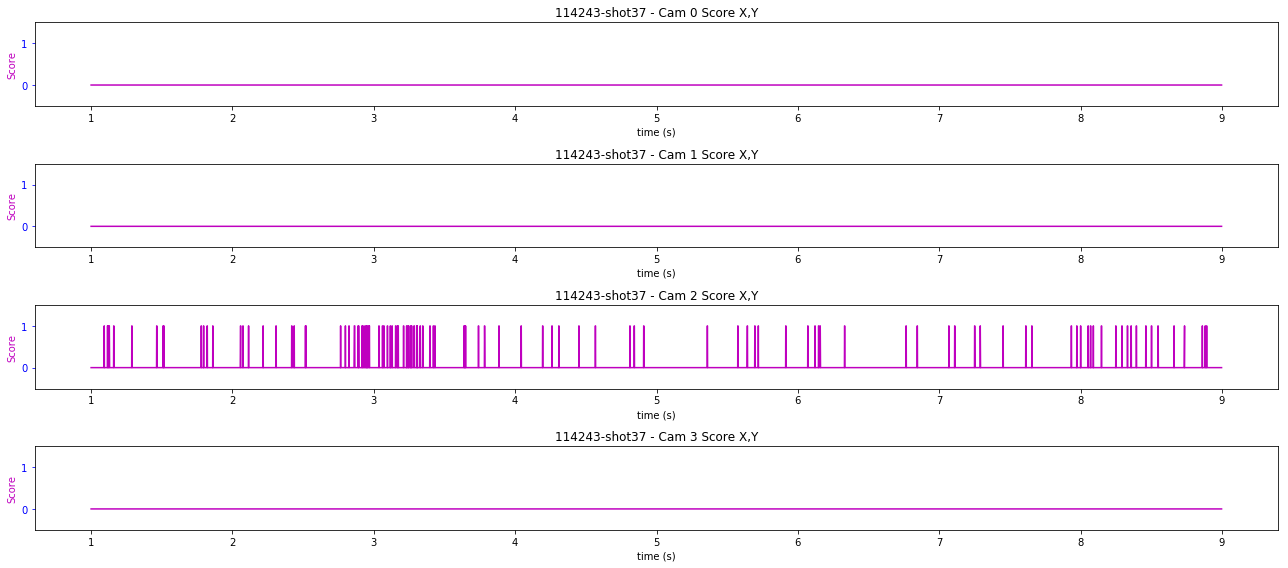

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114244-shot38_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


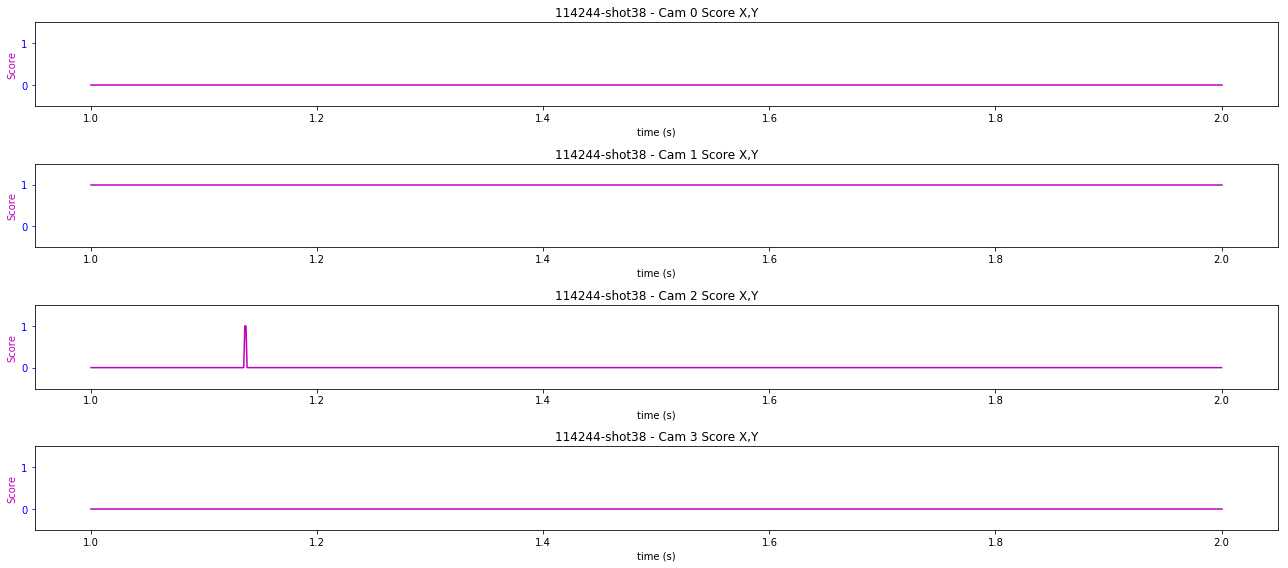

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114245-shot39_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


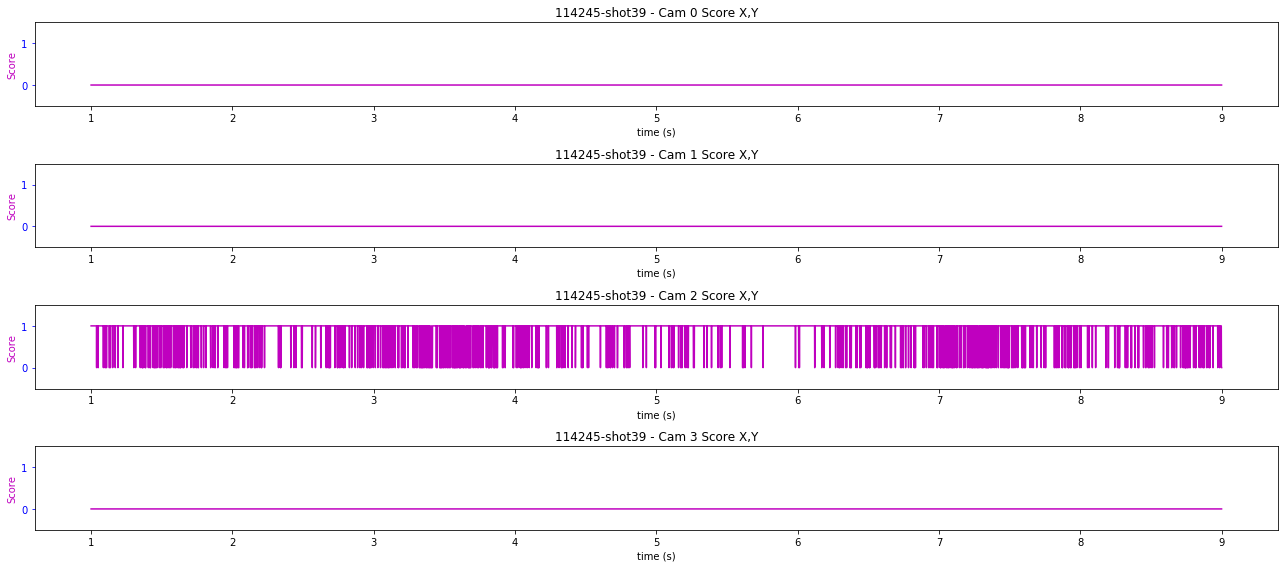

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114246-shot40_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


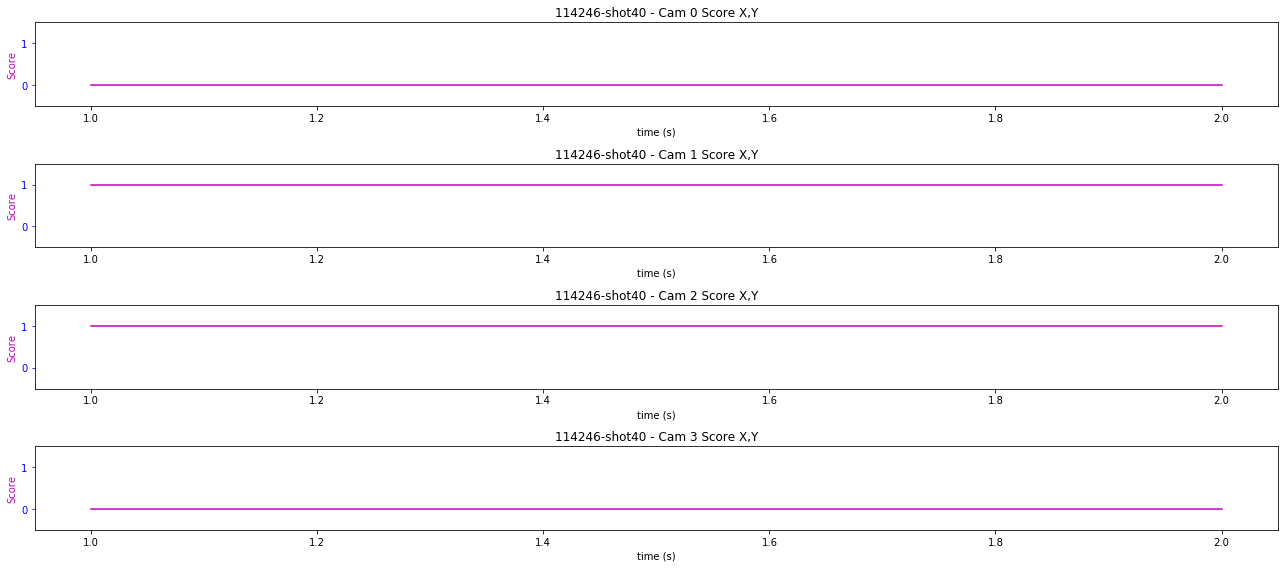

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114247-shot41_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


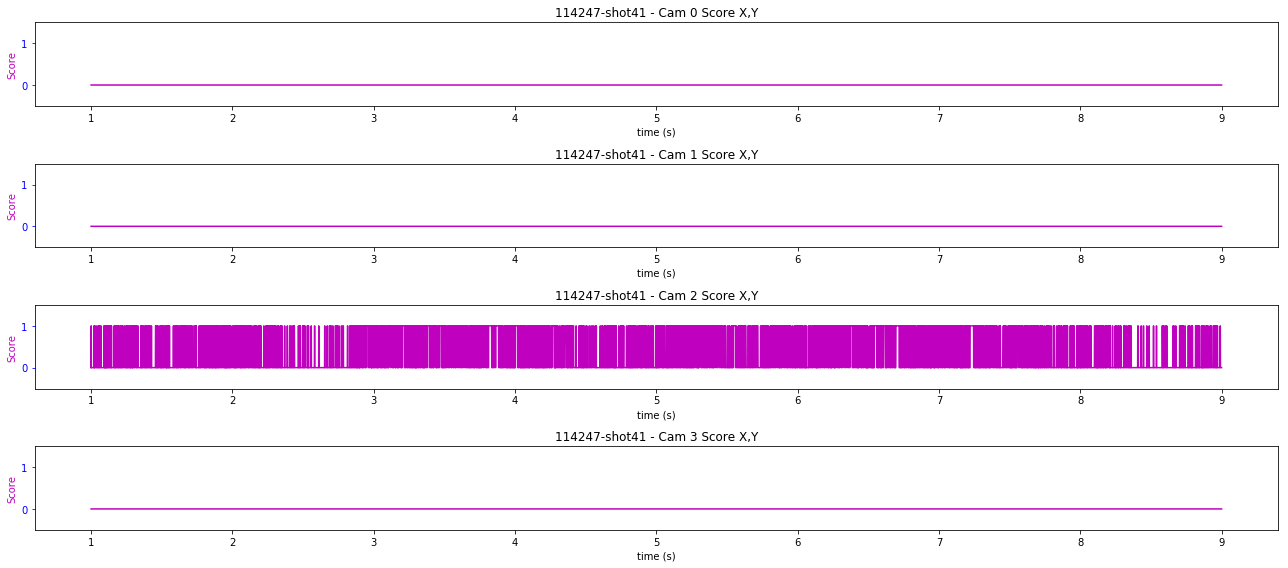

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114248-shot42_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


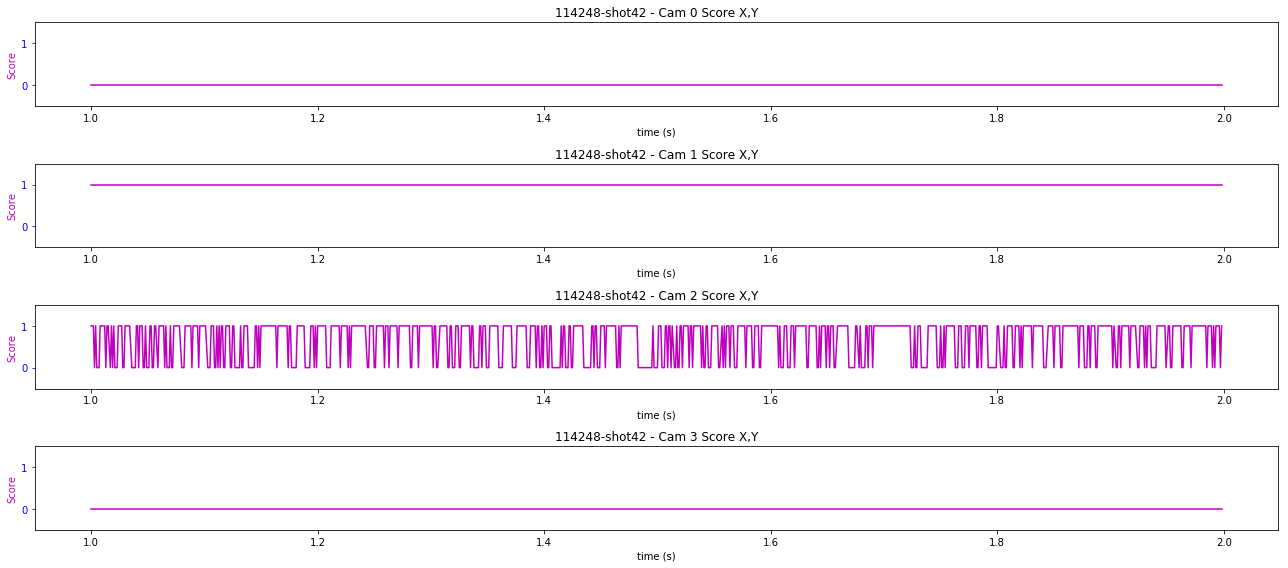

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114249-shot43_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


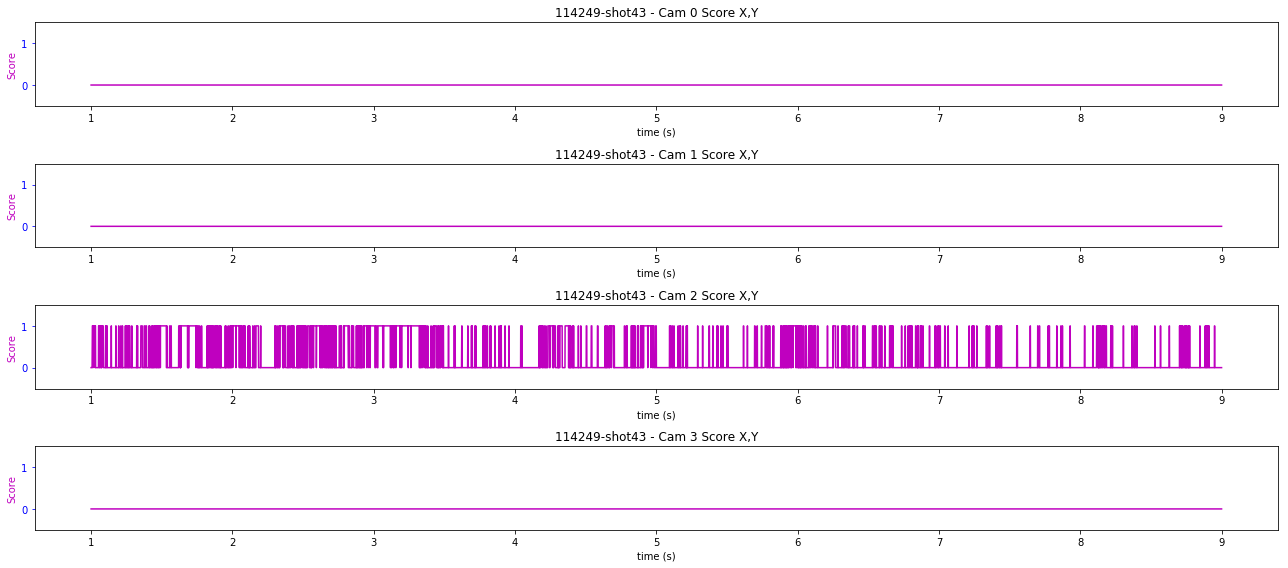

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114250-shot44_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


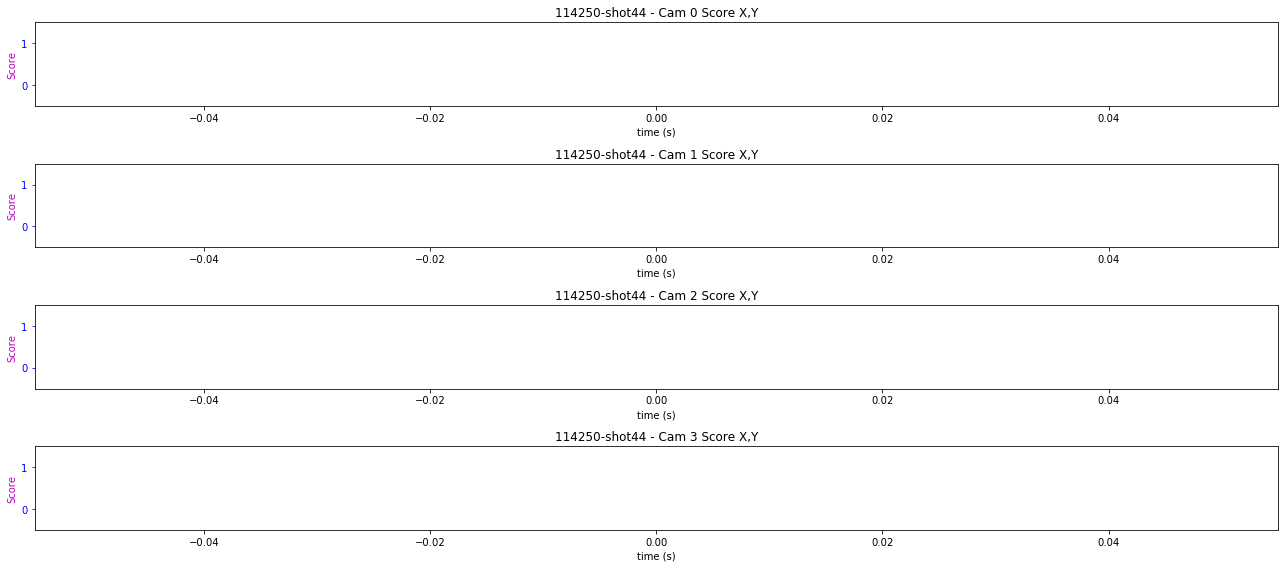

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114251-shot45_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


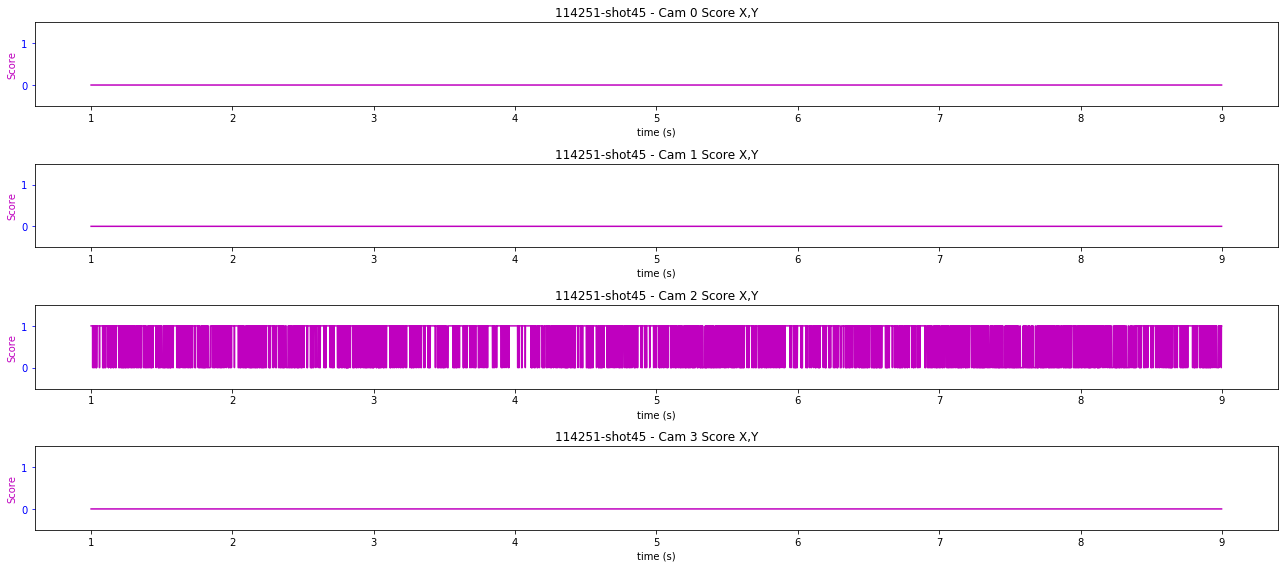

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114252-shot46_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


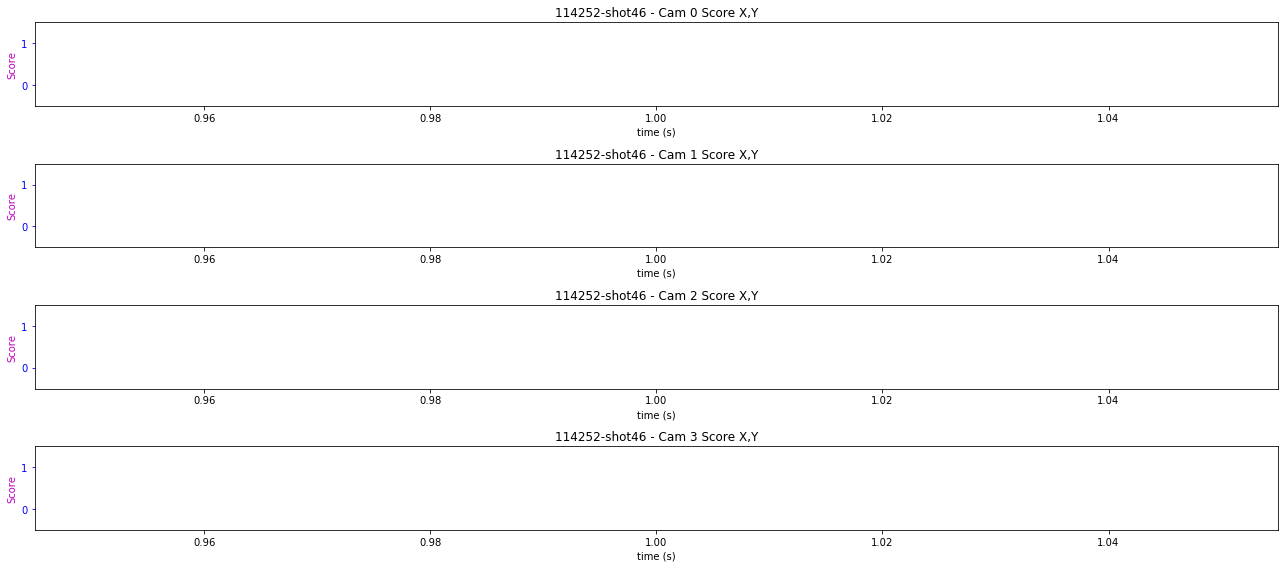

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114253-shot47_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


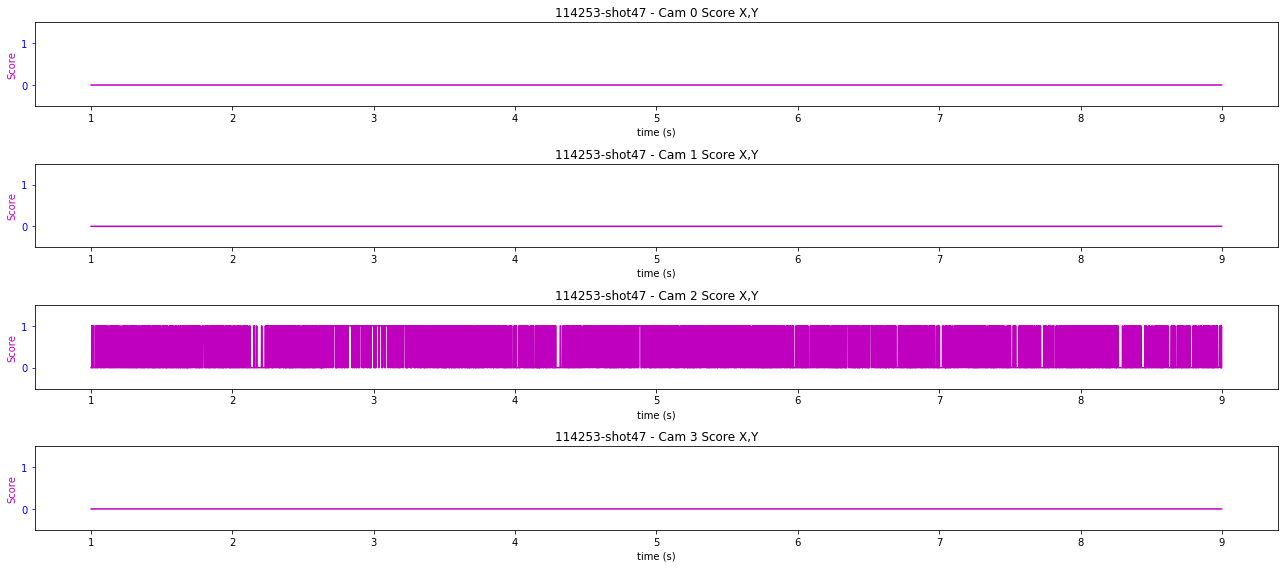

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114254-shot48_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


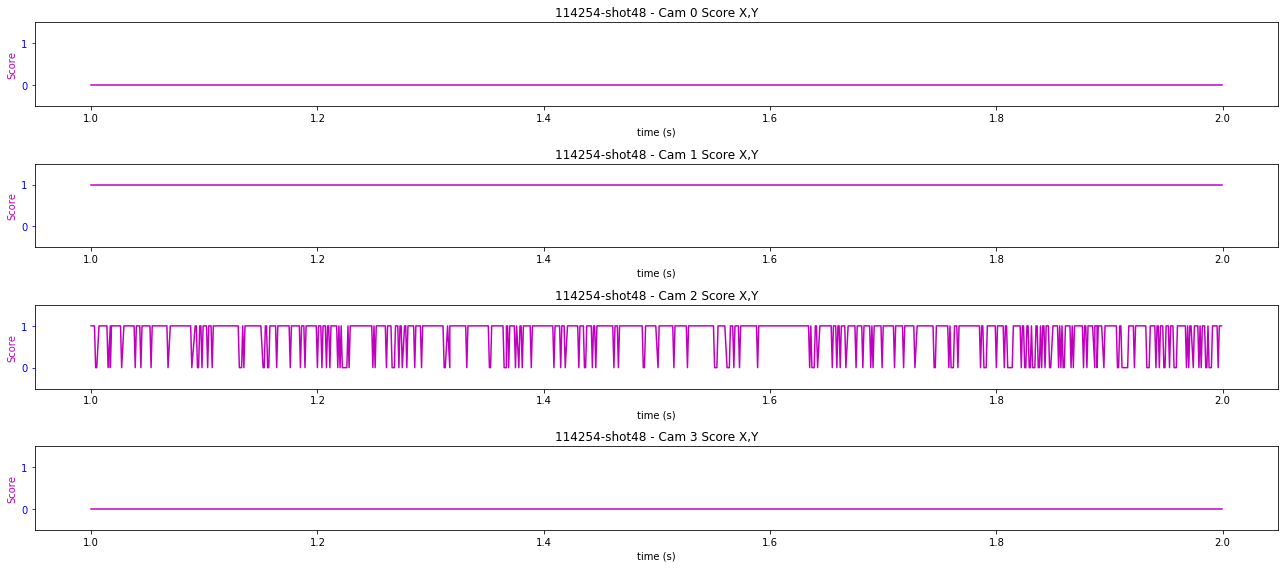

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114255-shot49_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


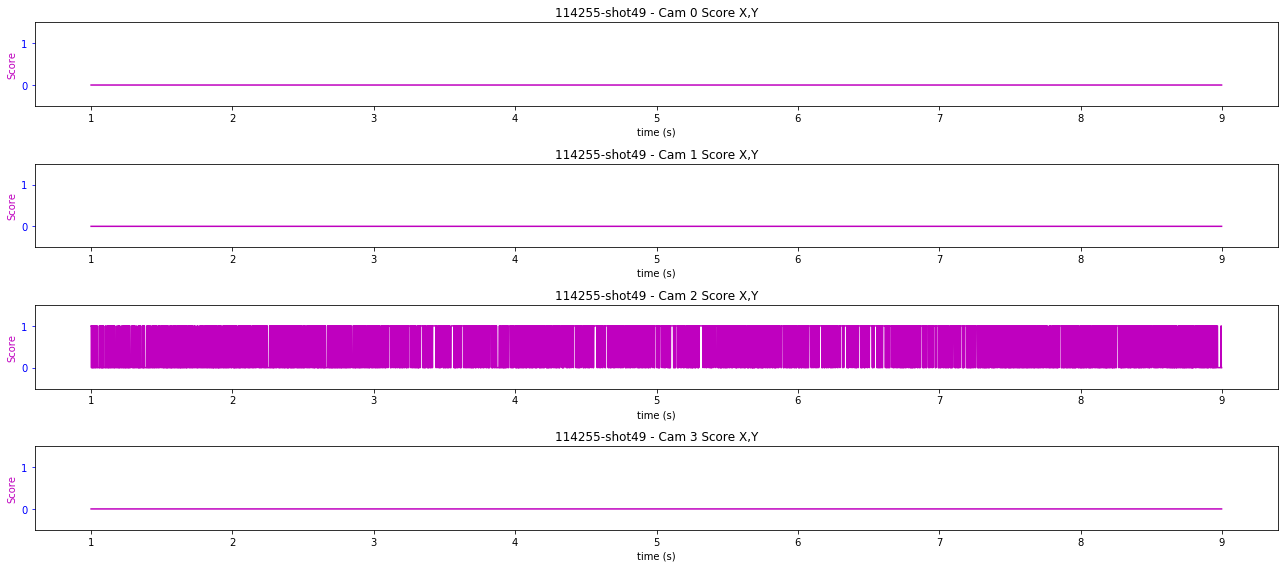

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114256-shot50_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


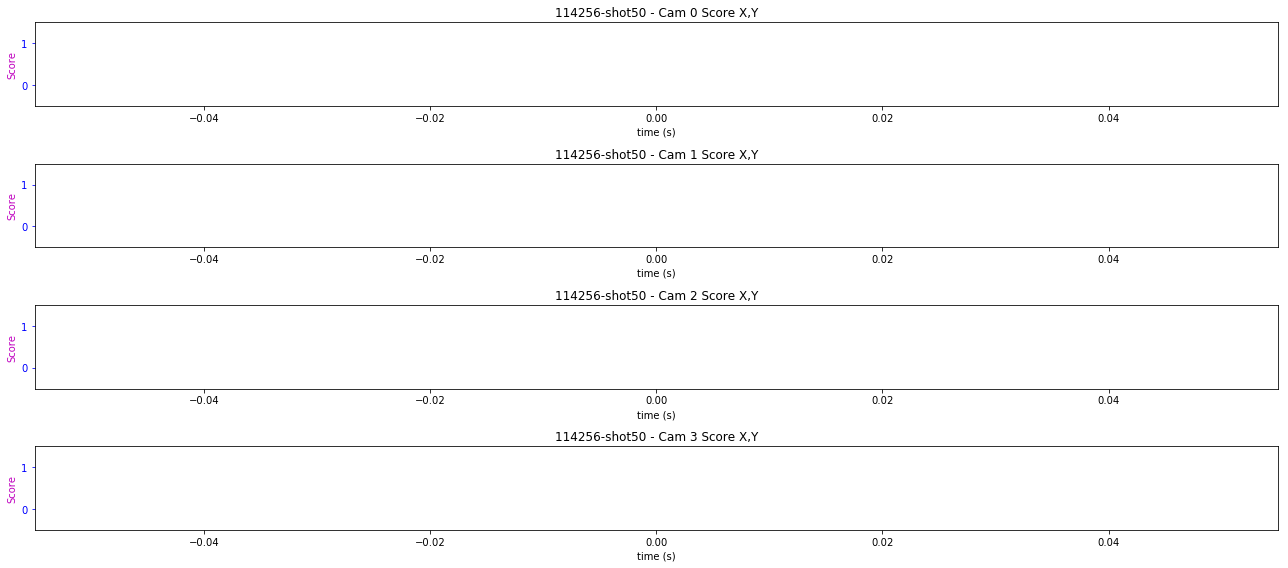

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114257-shot51_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


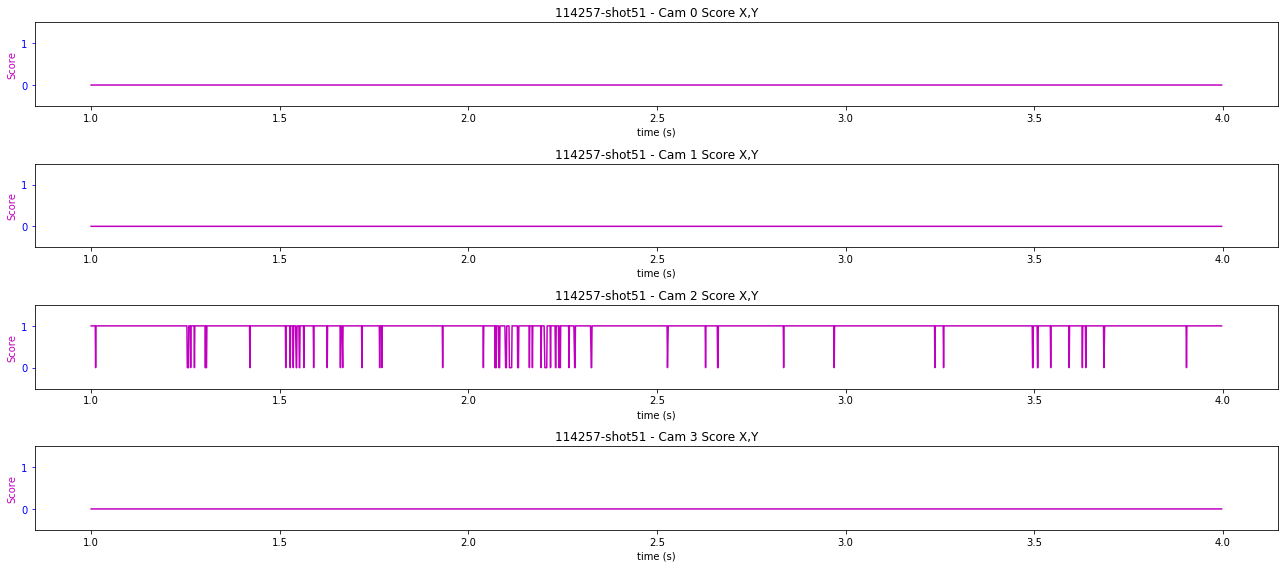

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114258-shot52_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


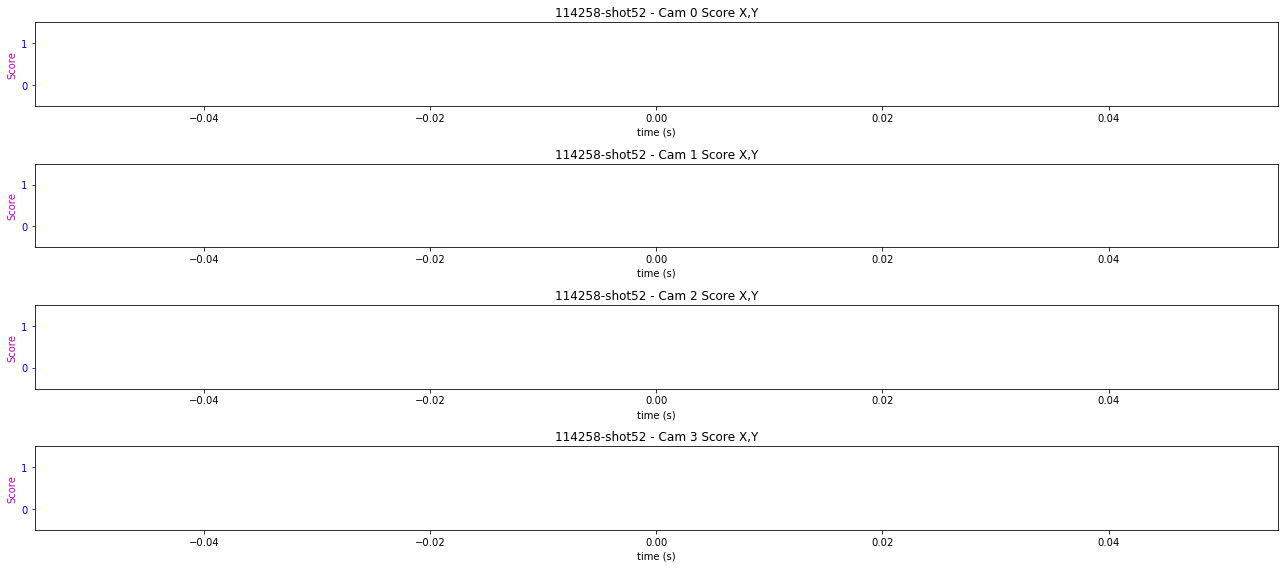

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114259-shot53_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


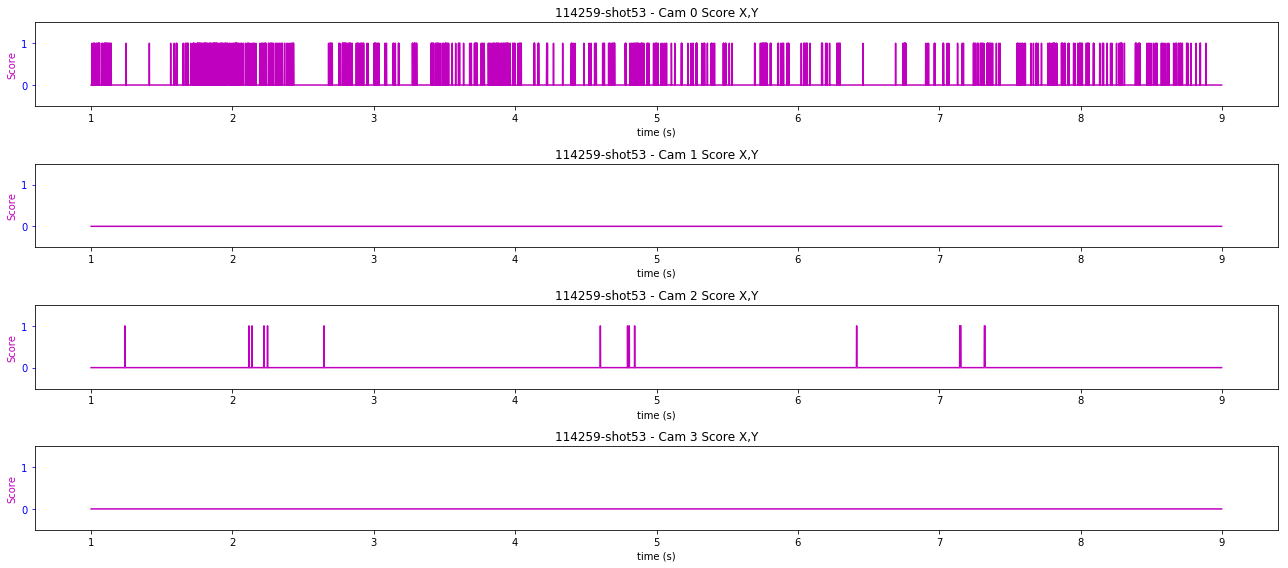

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114260-shot54_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


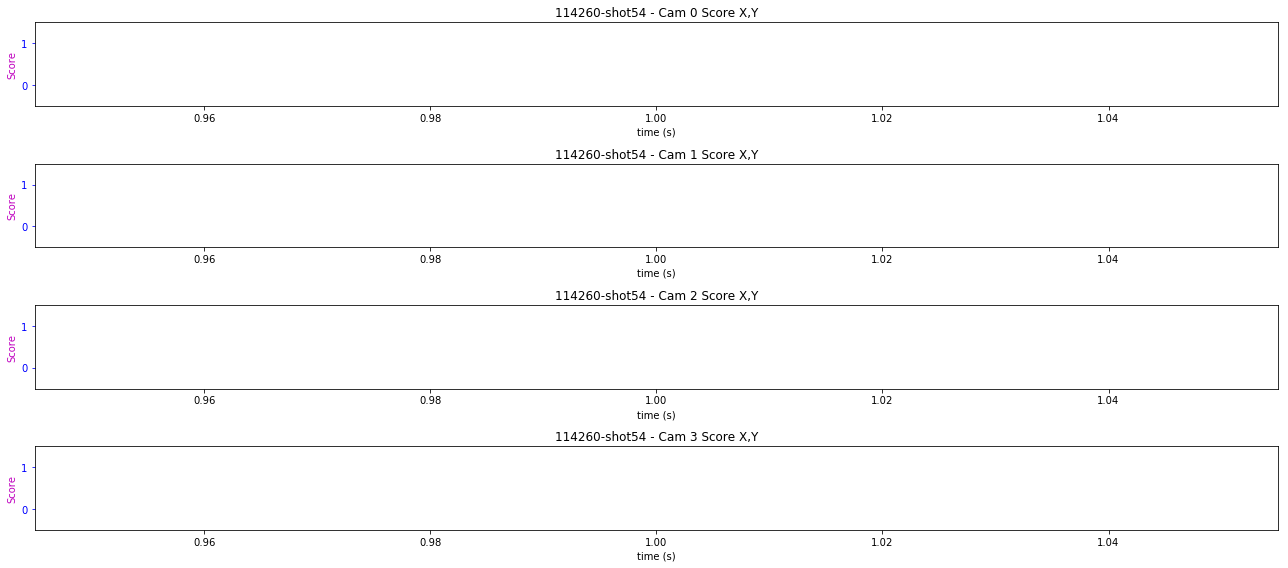

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114261-shot55_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


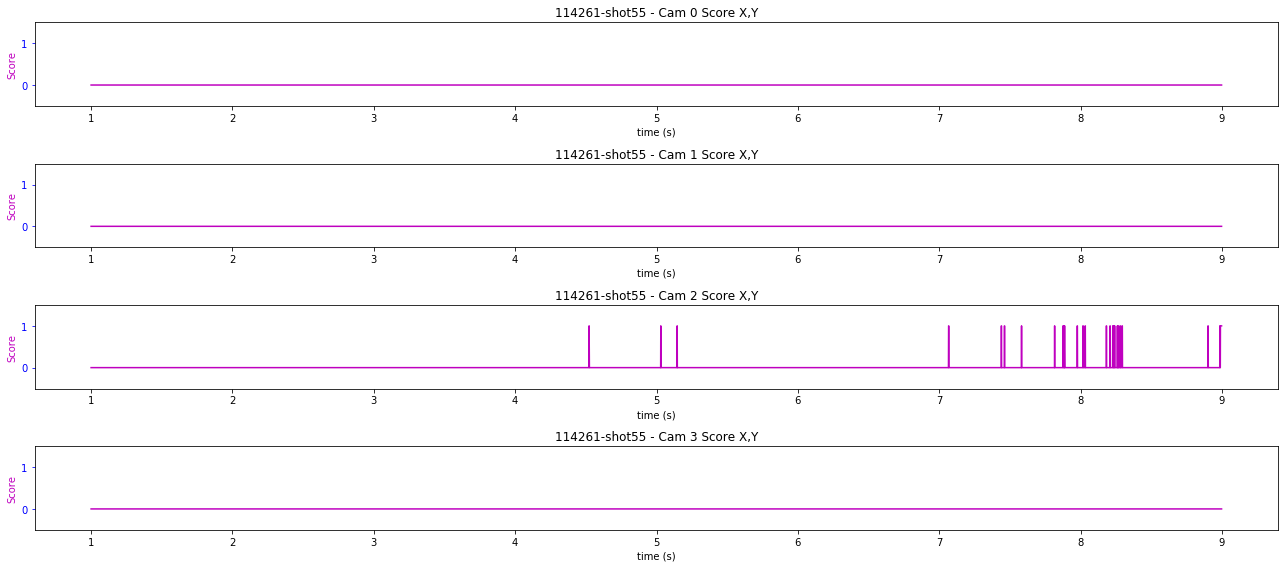

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114262-shot56_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


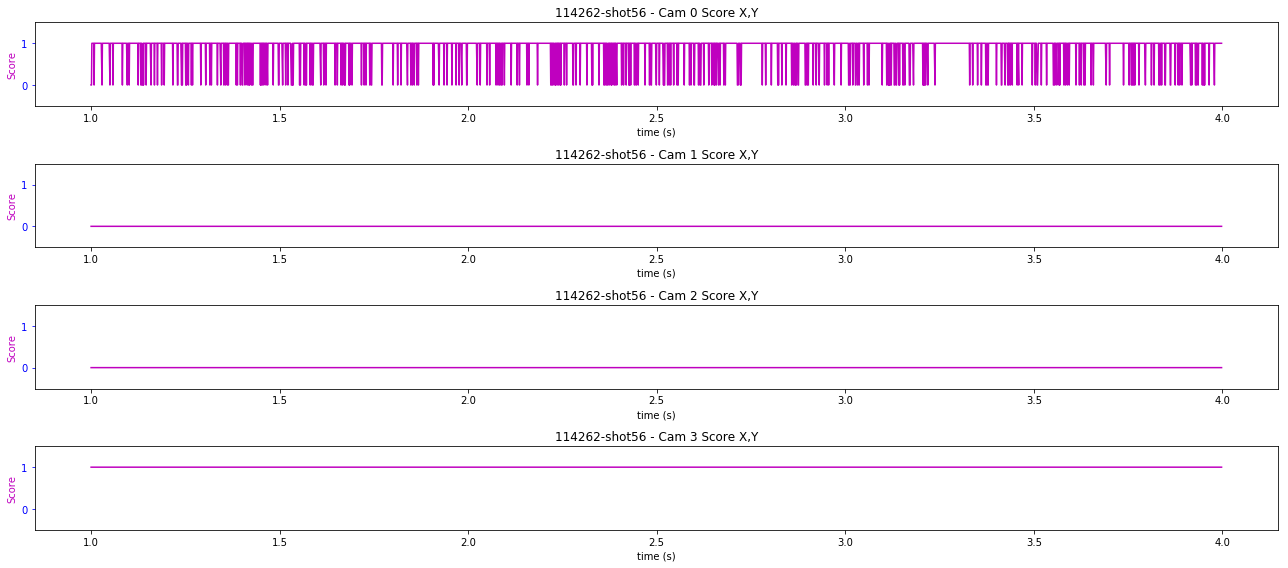

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114263-shot57_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


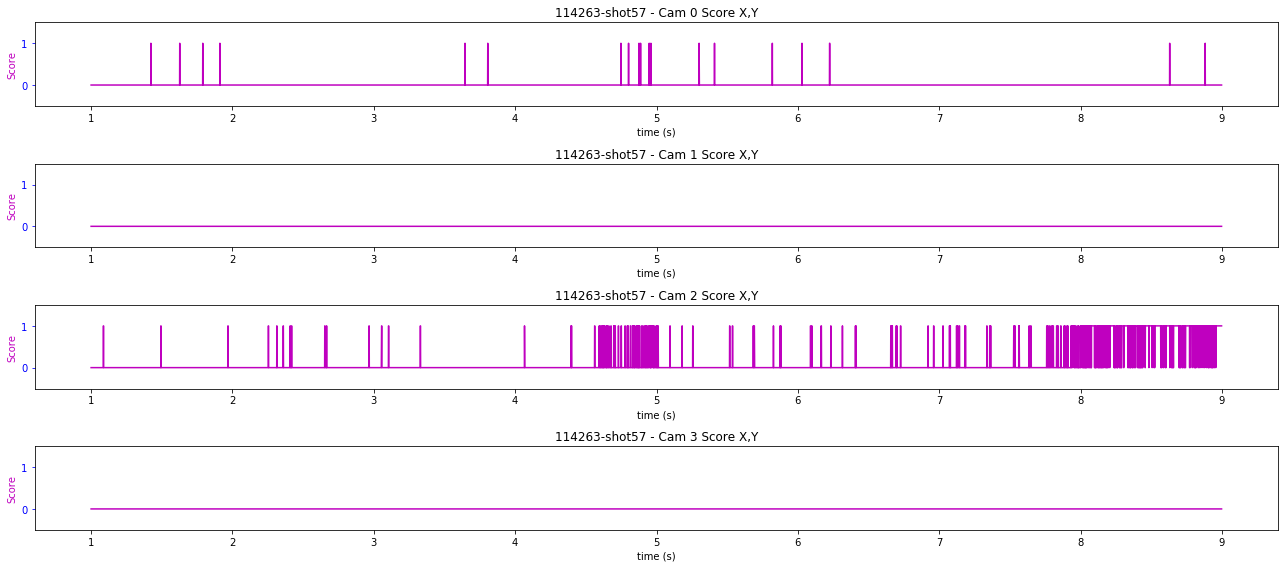

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114264-shot58_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


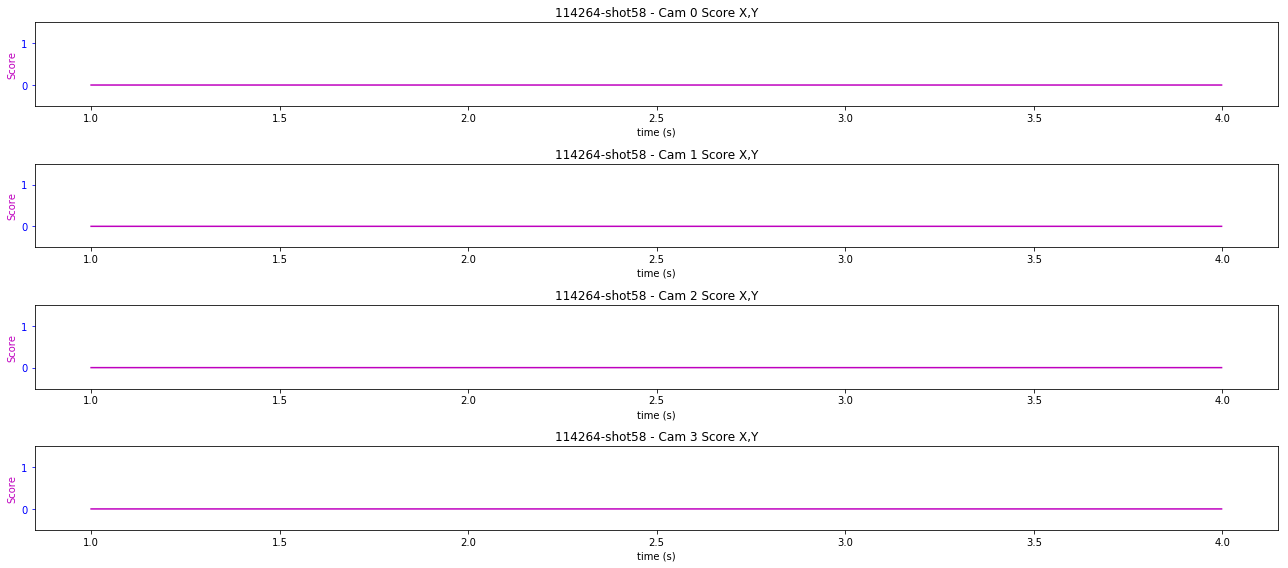

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114265-shot59_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


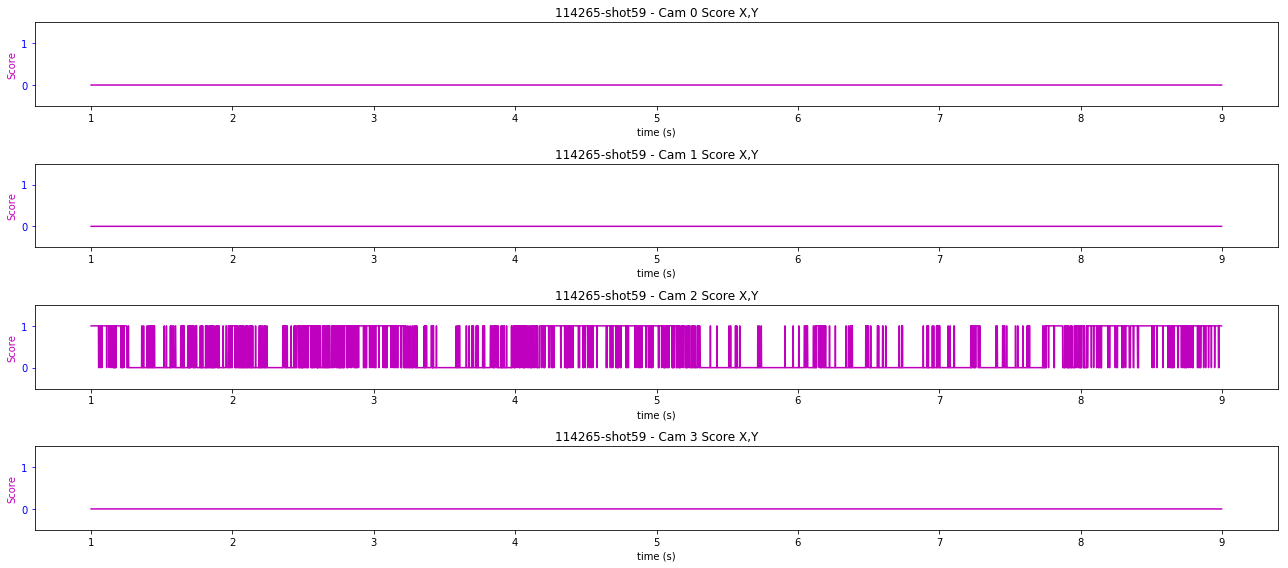

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114266-shot60_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


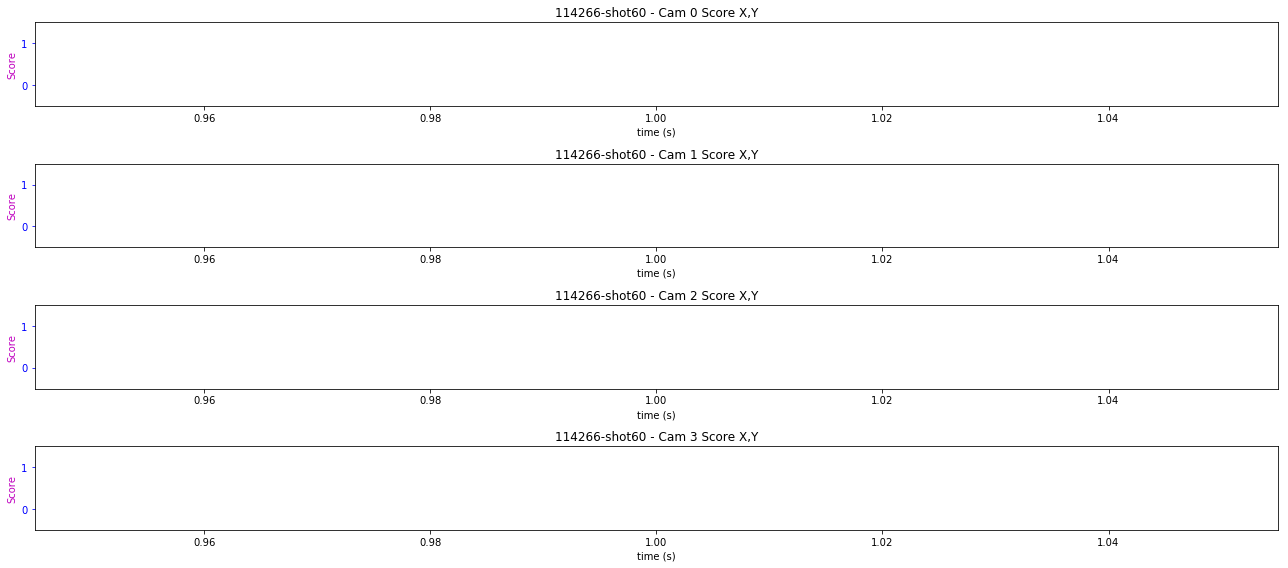

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114267-shot61_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


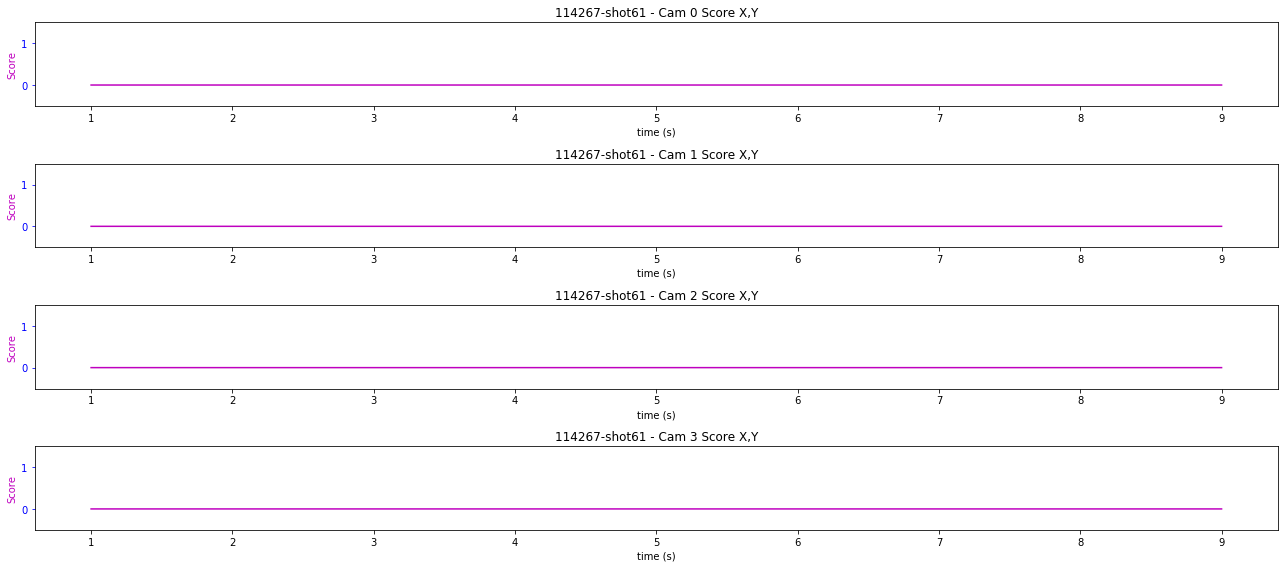

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114268-shot62_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


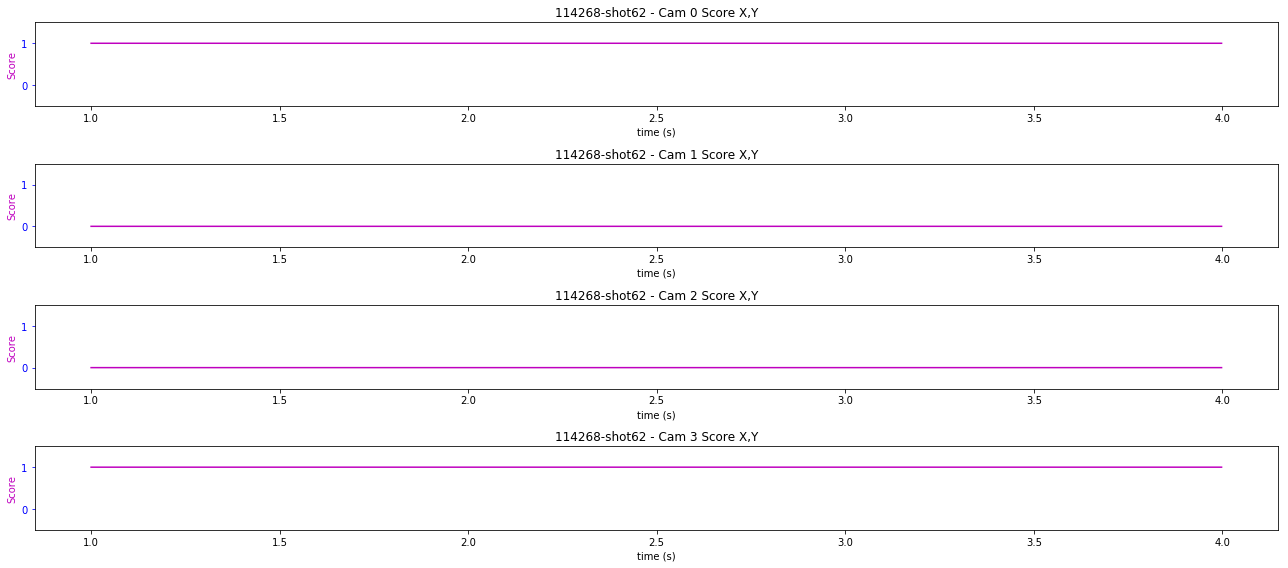

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114269-shot63_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


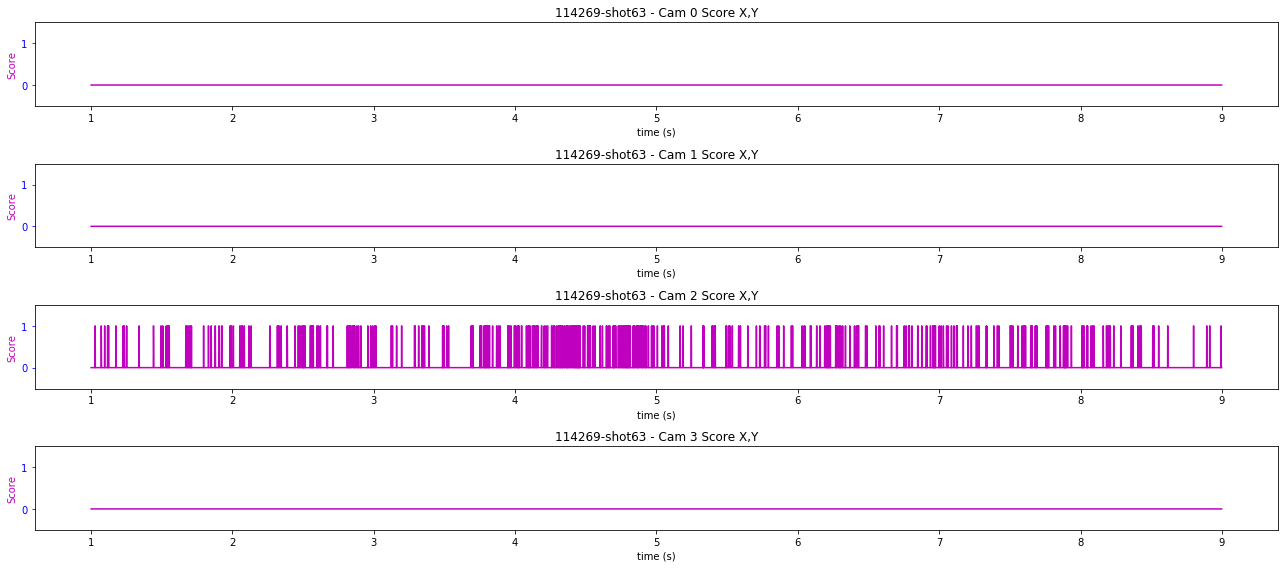

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114270-shot64_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


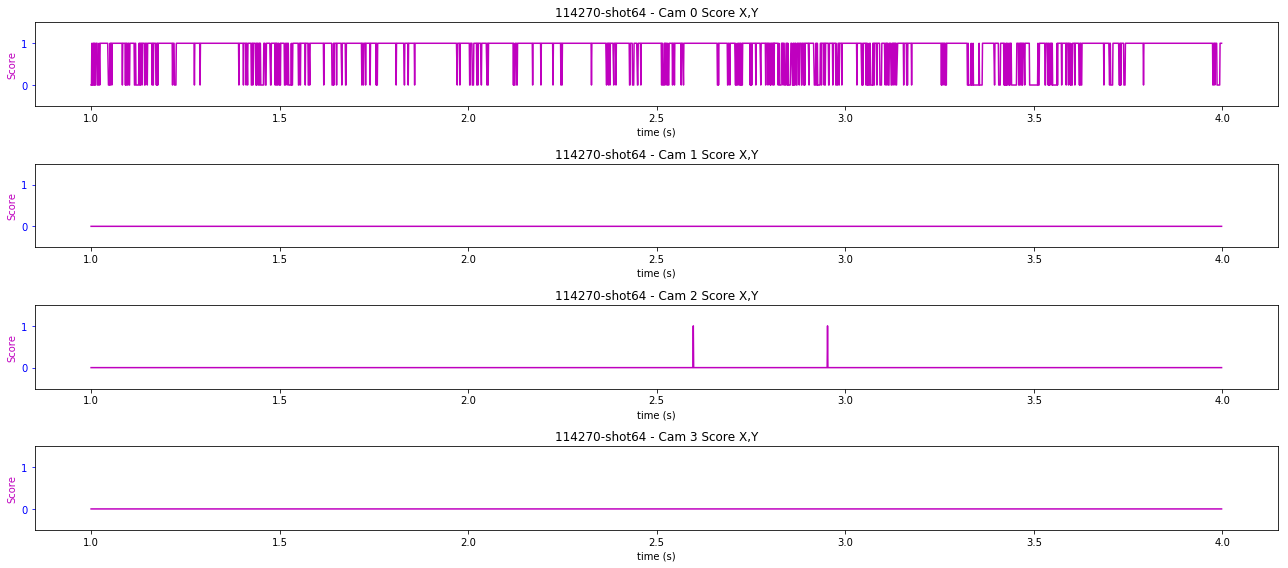

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114271-shot65_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


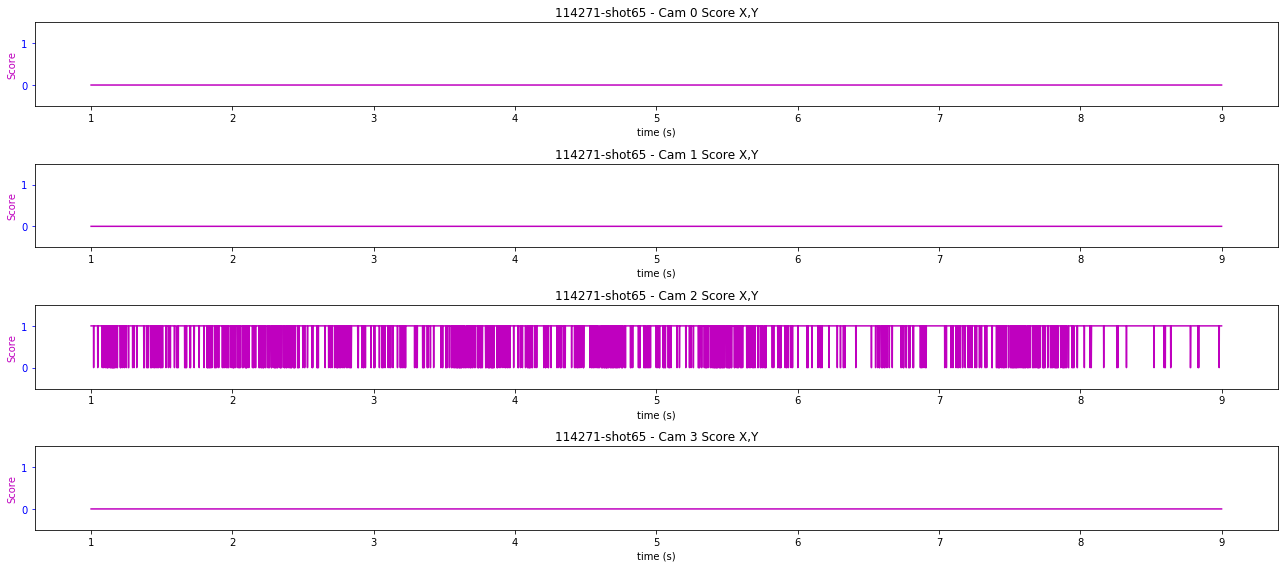

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114272-shot66_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


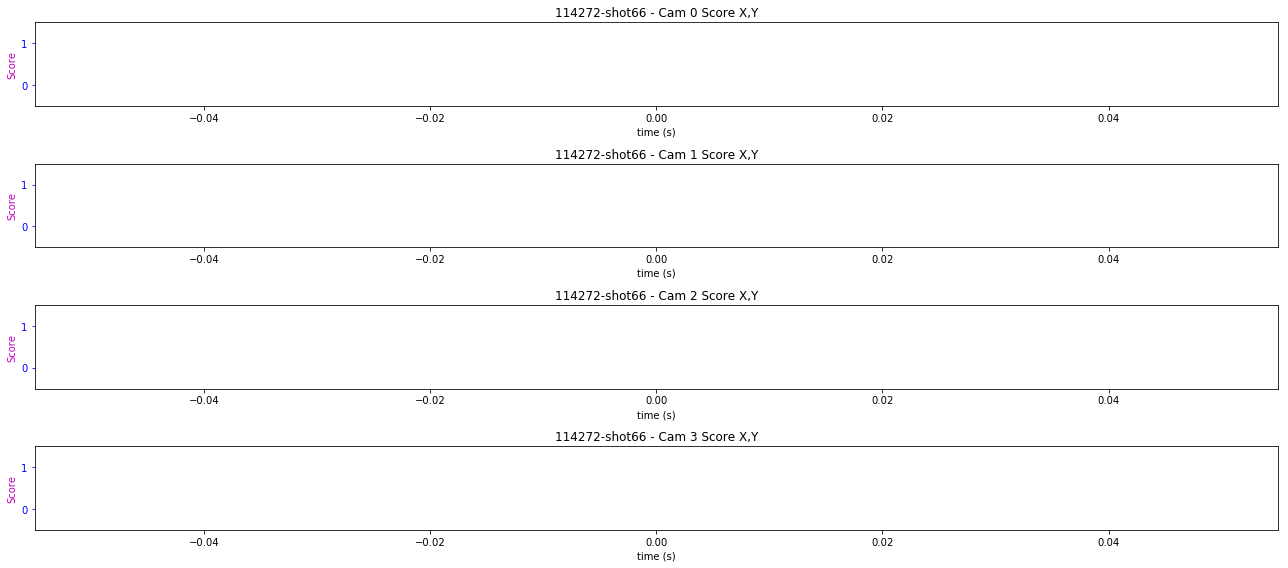

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114273-shot67_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


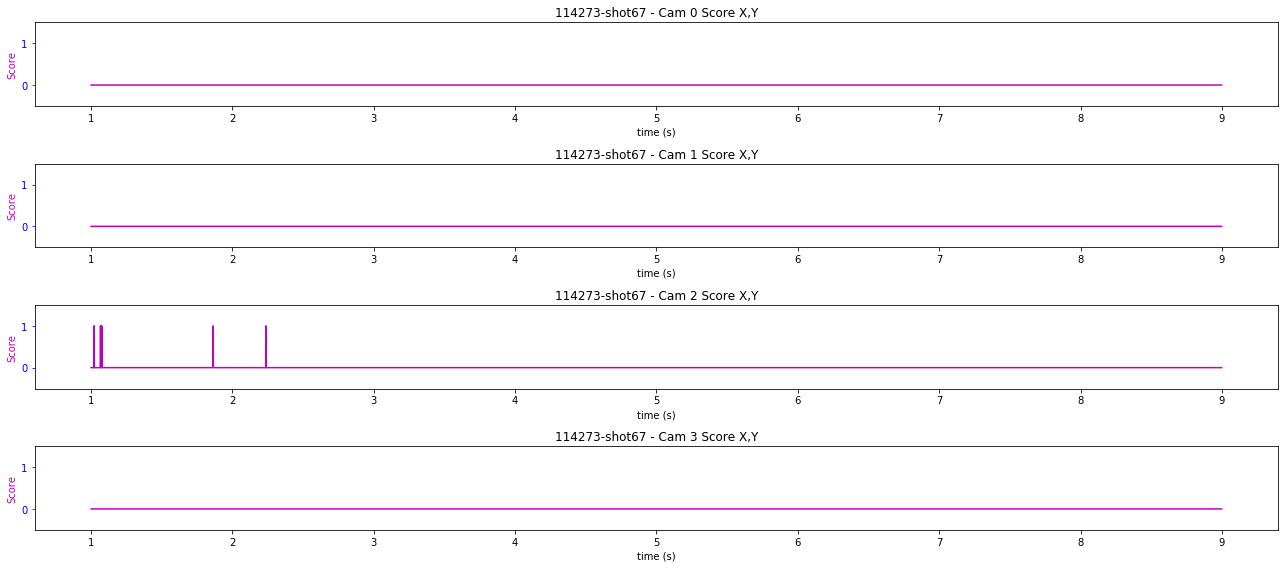

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114274-shot68_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


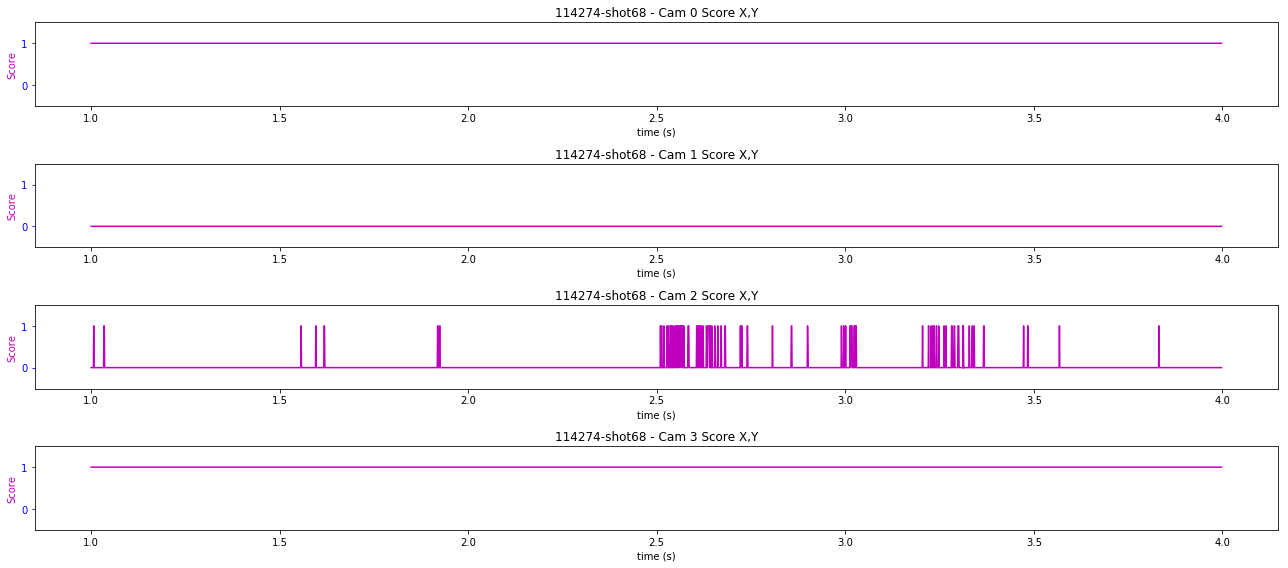

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114275-shot69_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


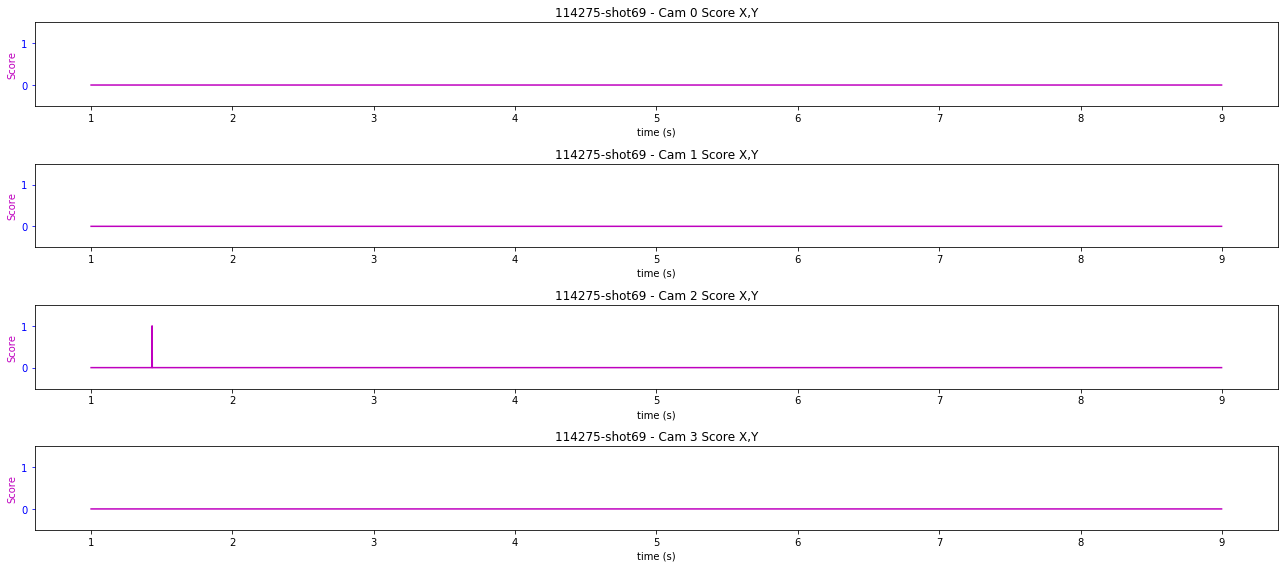

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114276-shot70_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


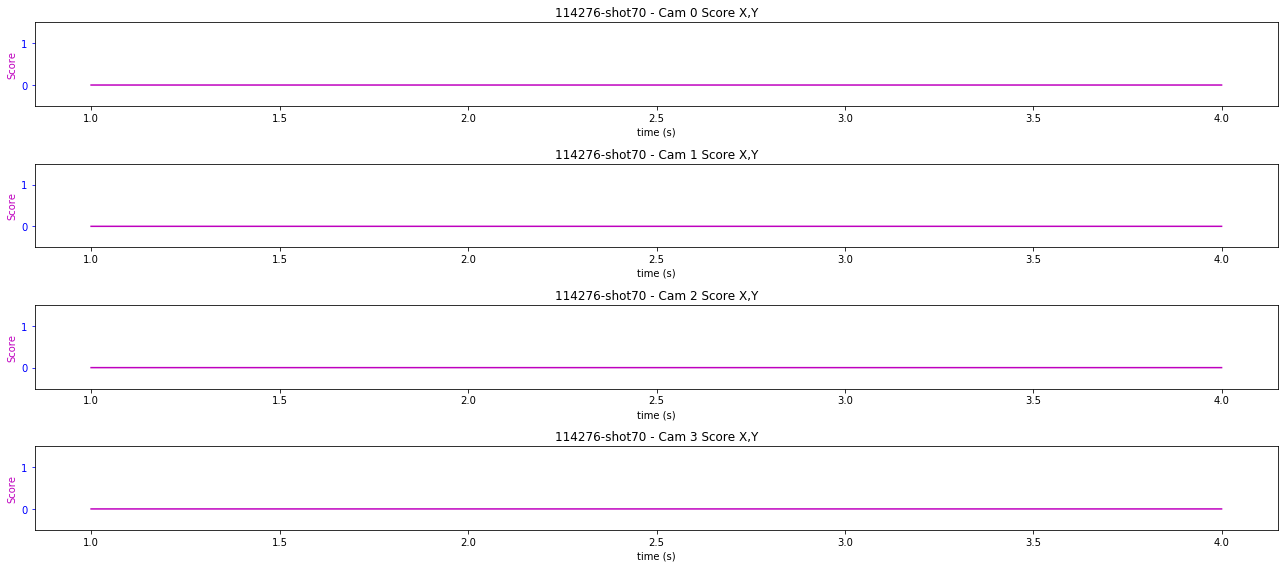

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114277-shot71_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


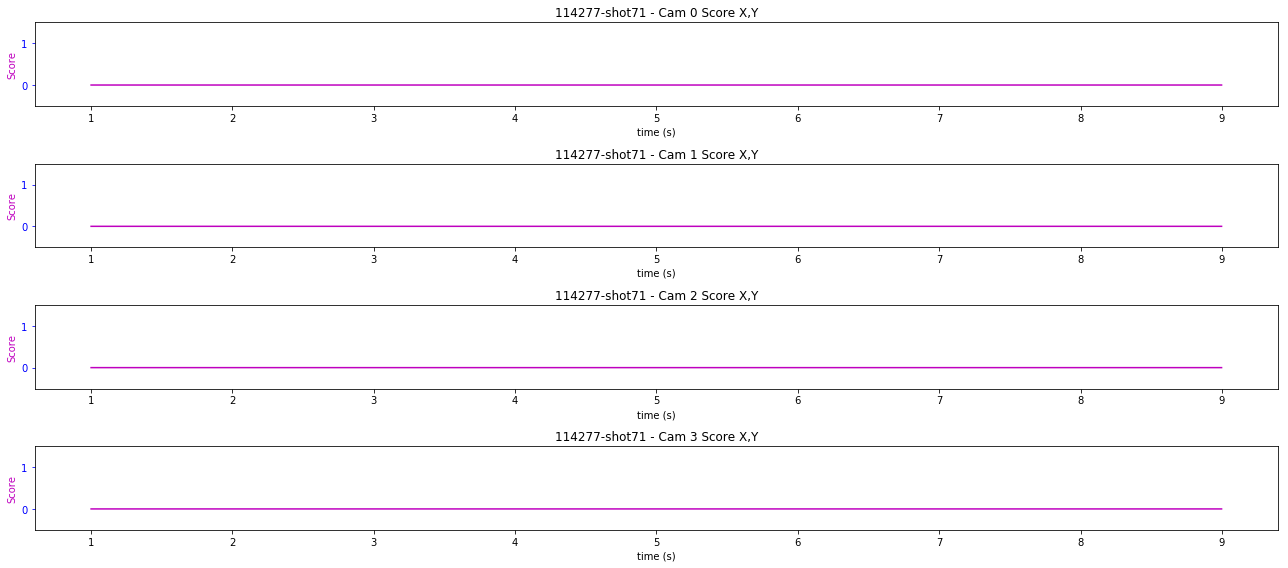

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114278-shot72_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


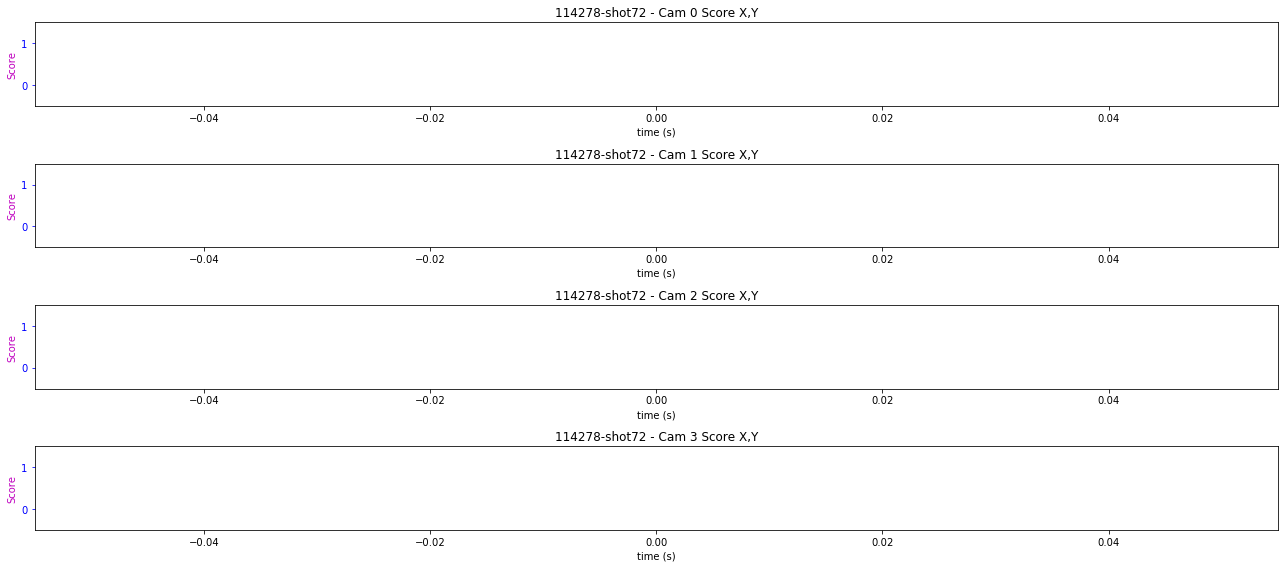

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114279-shot73_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


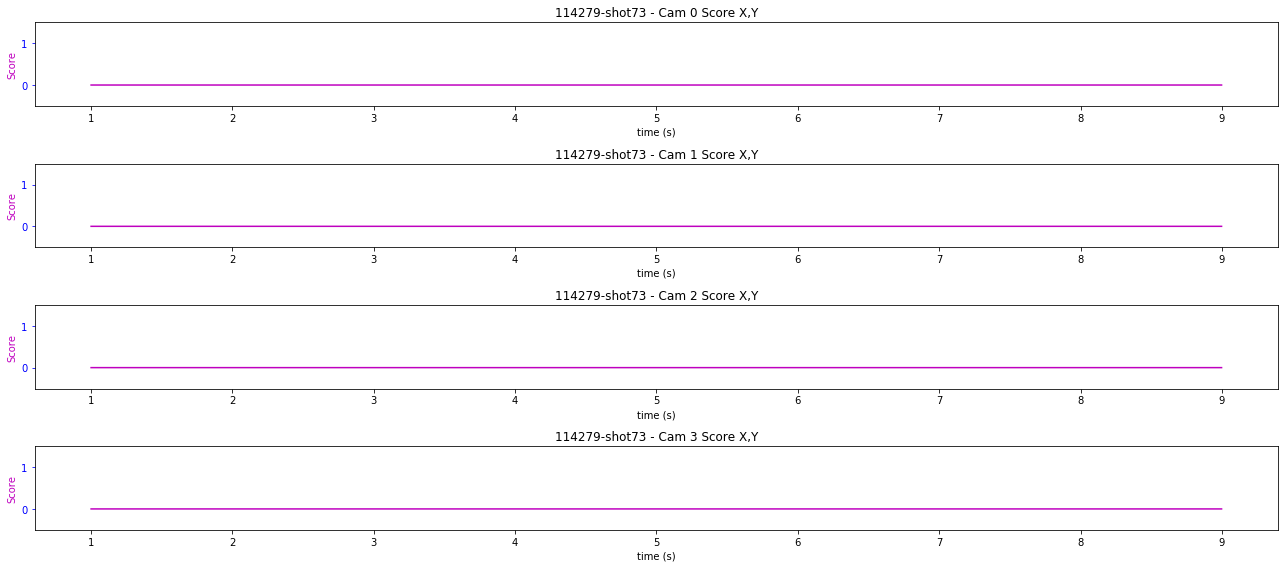

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114280-shot74_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


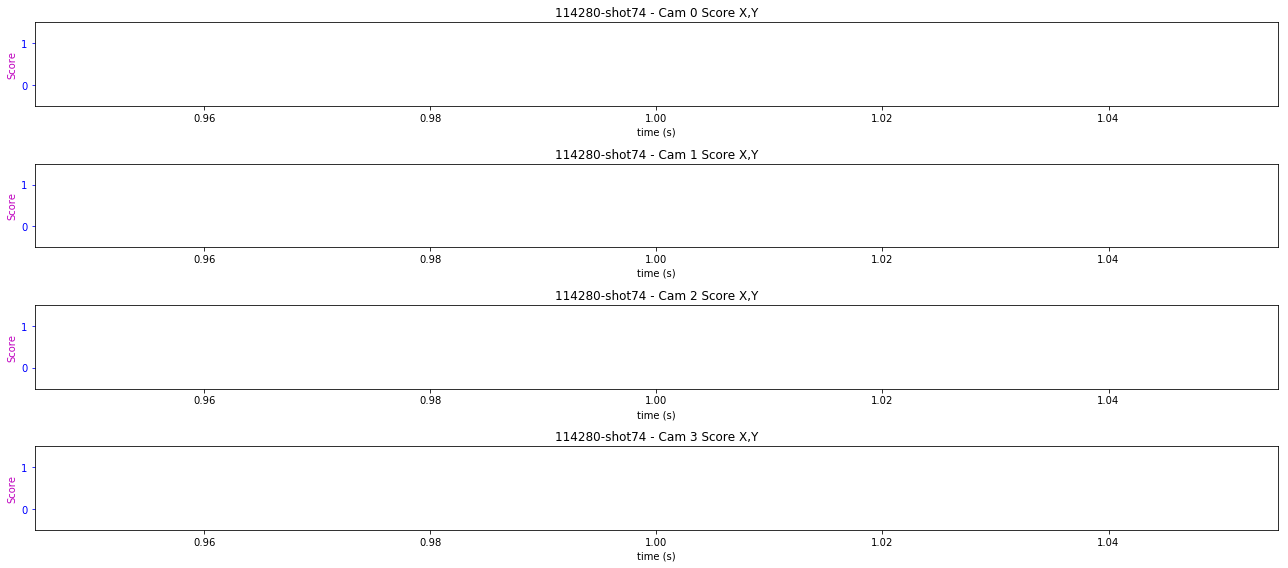

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114281-shot75_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


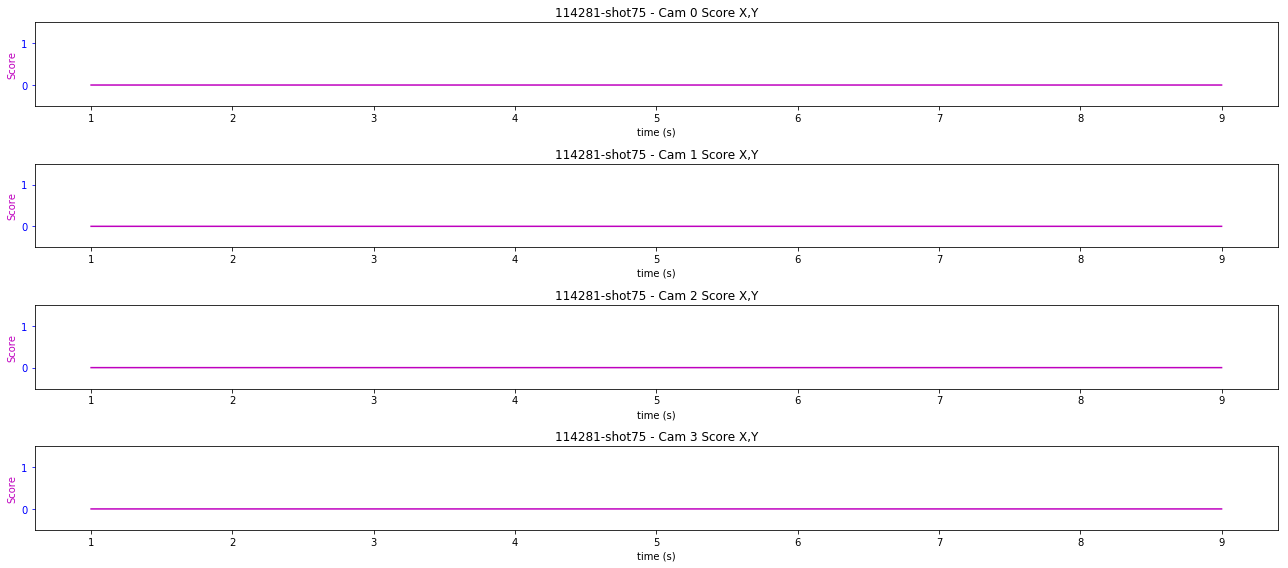

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114282-shot76_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


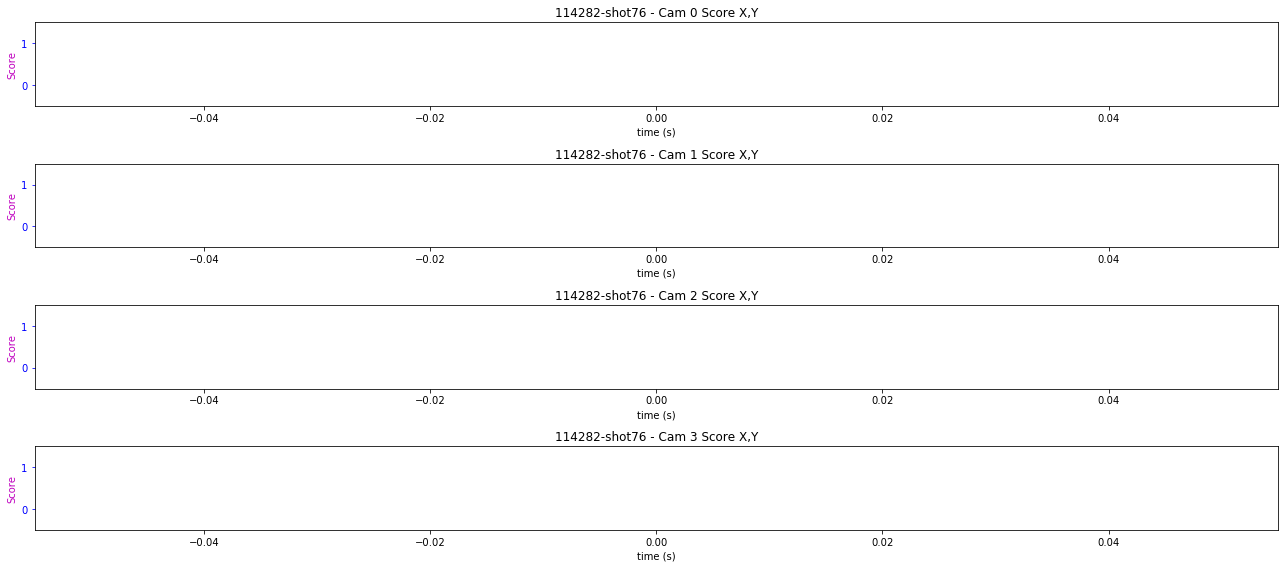

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114283-shot77_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


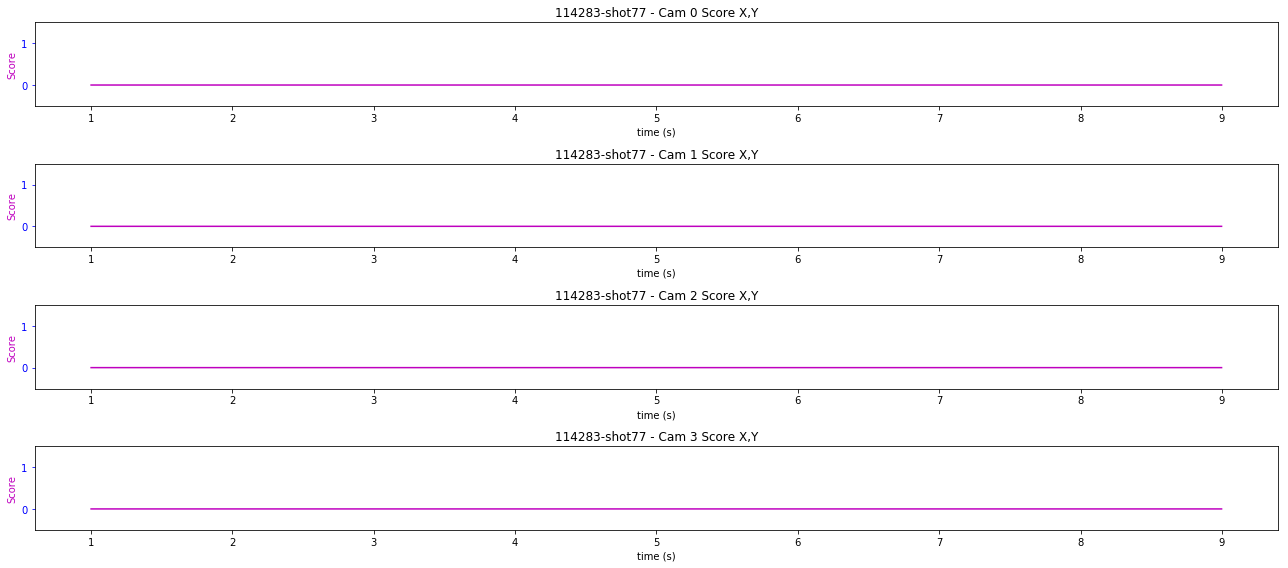

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114284-shot78_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


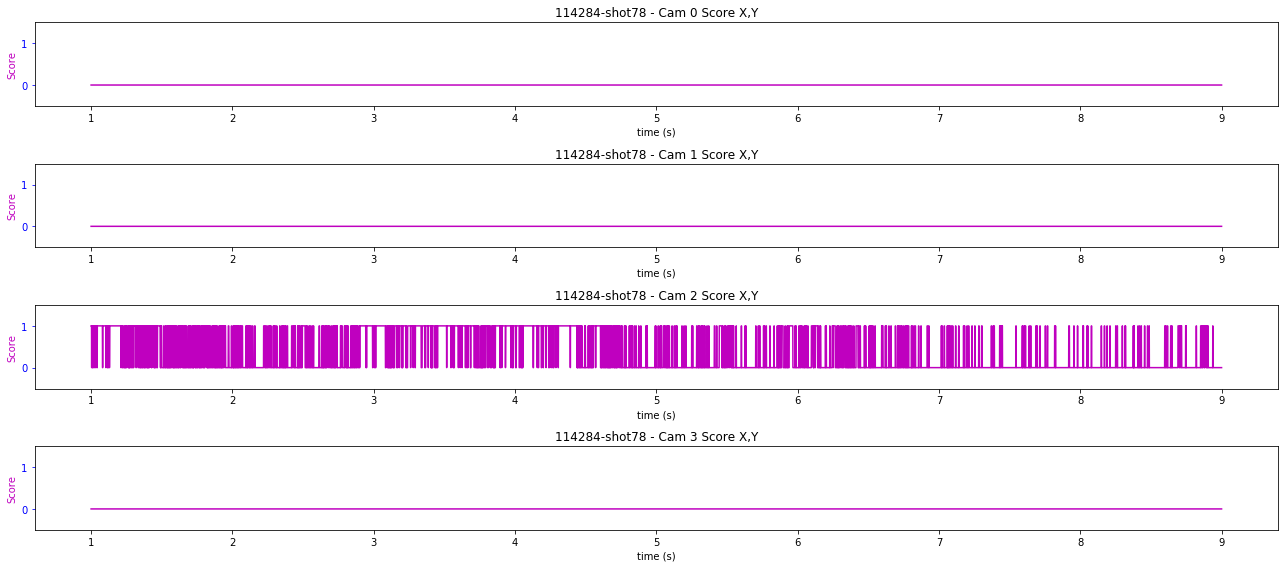

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114285-shot79_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


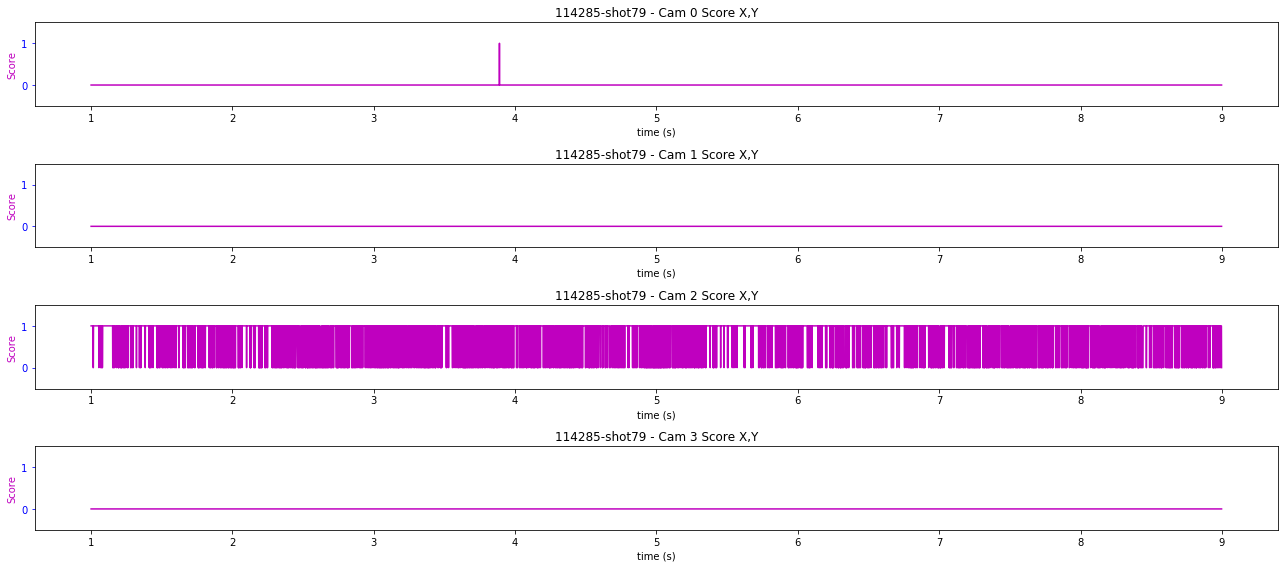

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114286-shot80_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


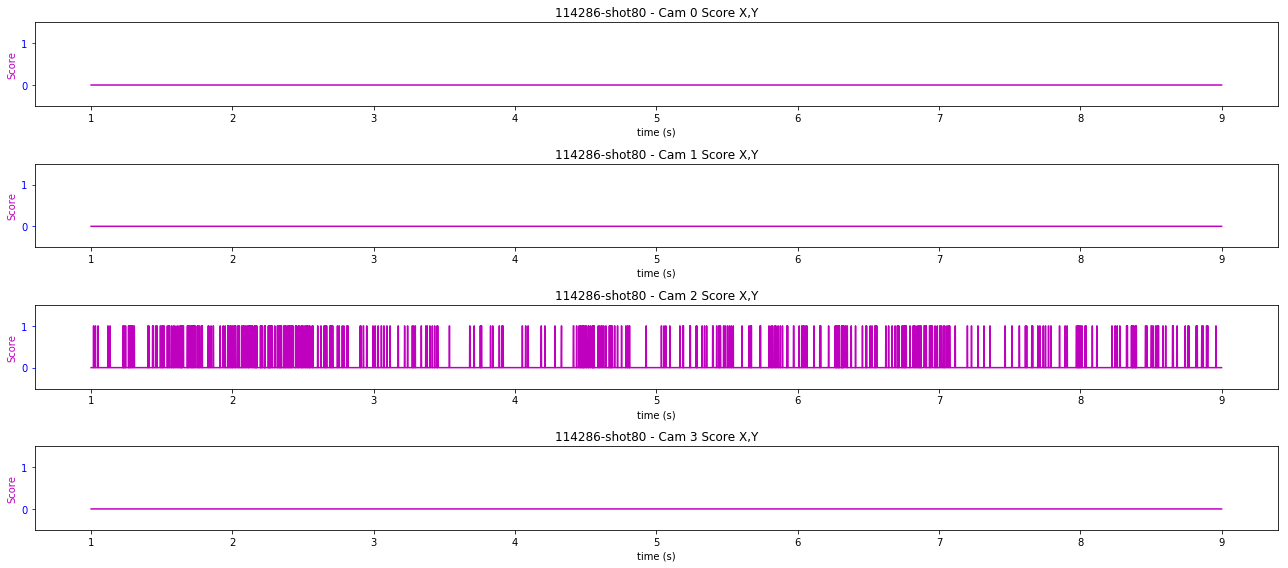

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114287-shot81_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


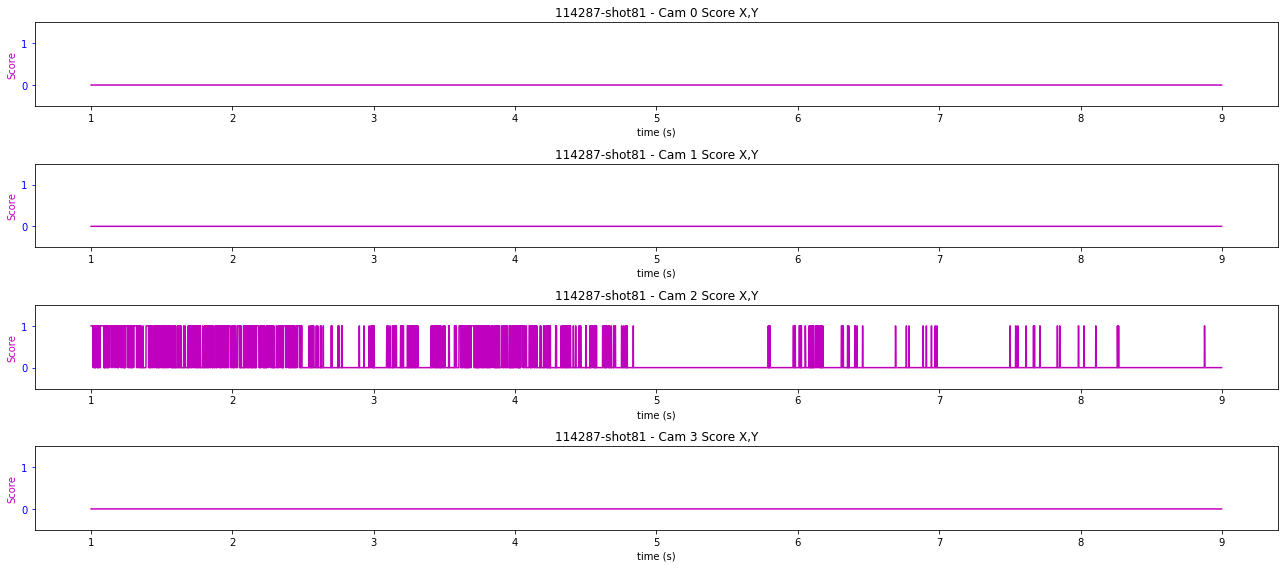

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114288-shot82_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


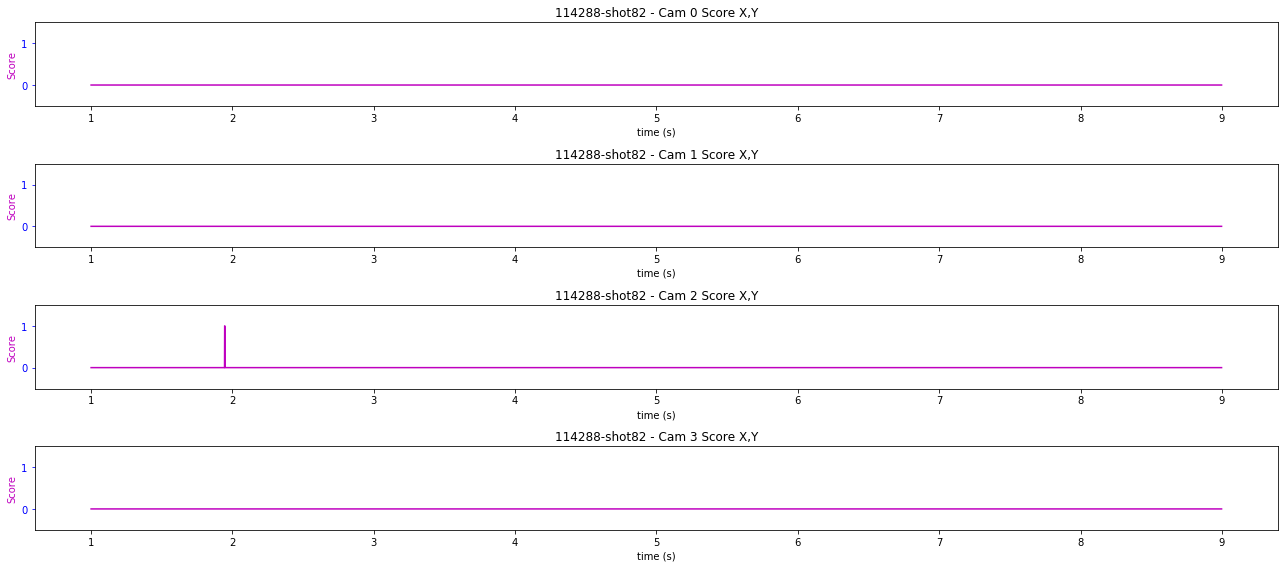

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114289-shot83_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


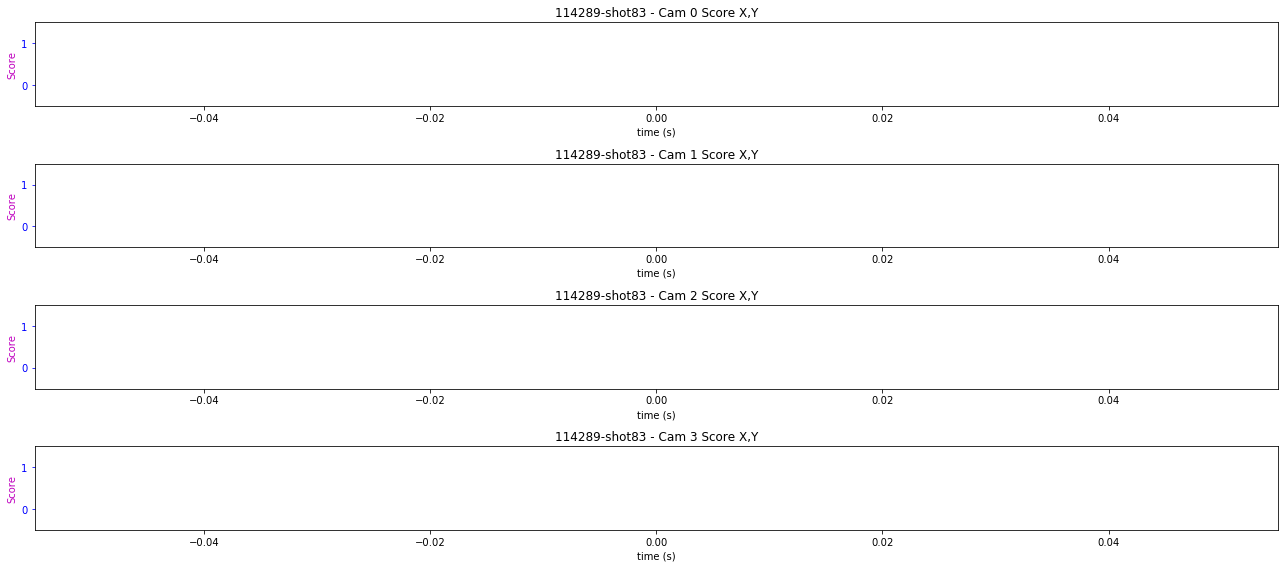

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114290-shot84_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


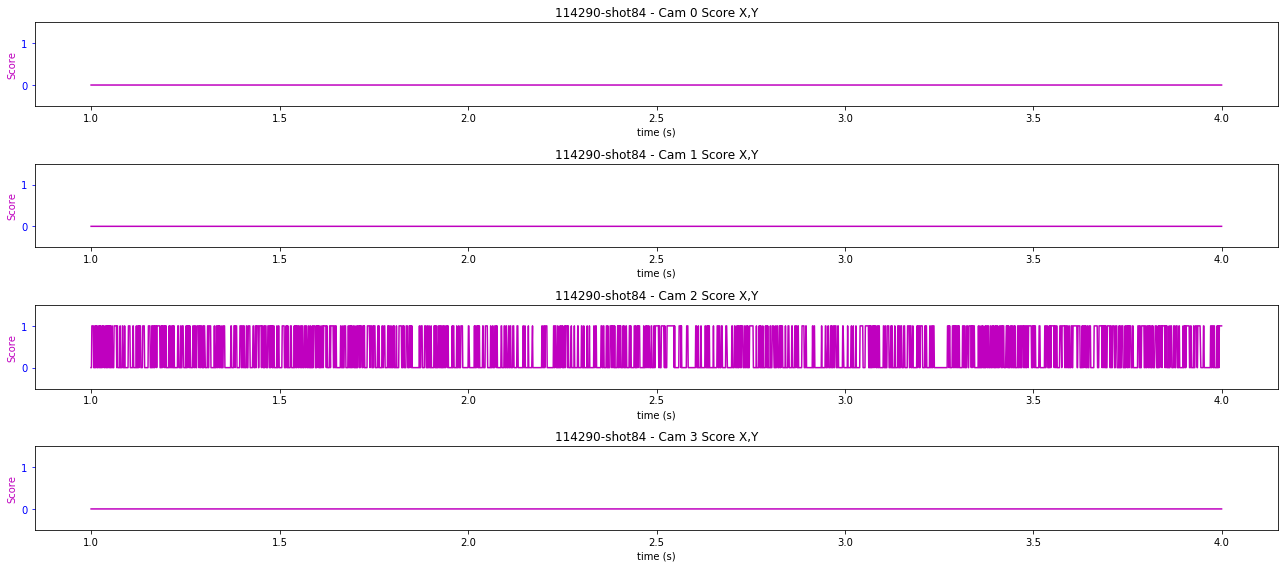

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114291-shot85_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


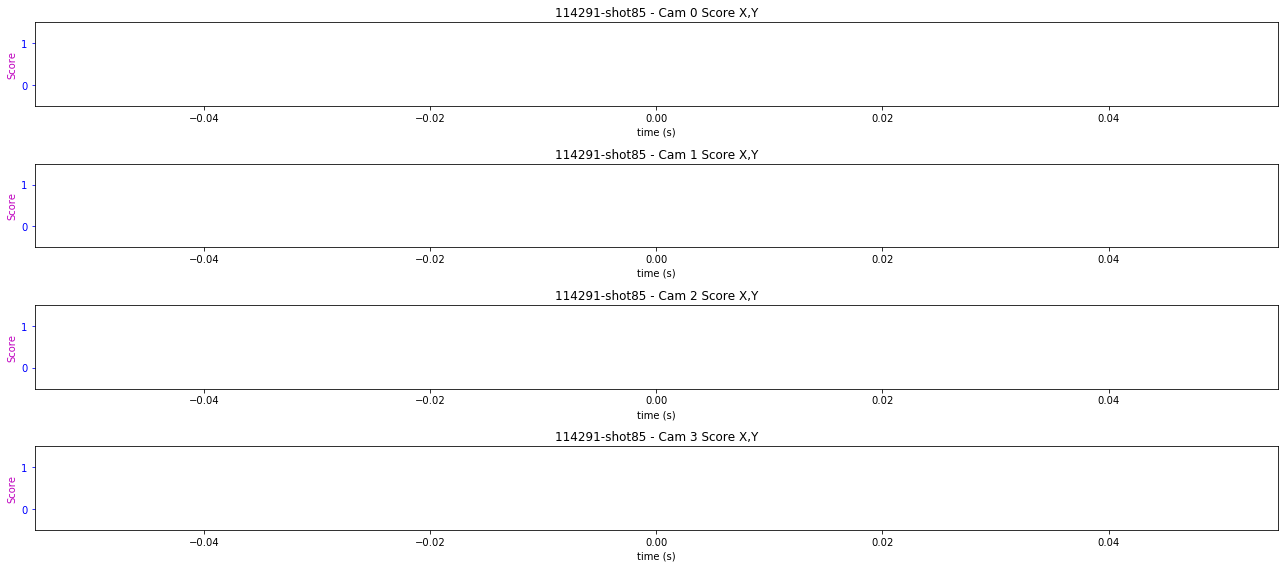

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114292-shot86_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


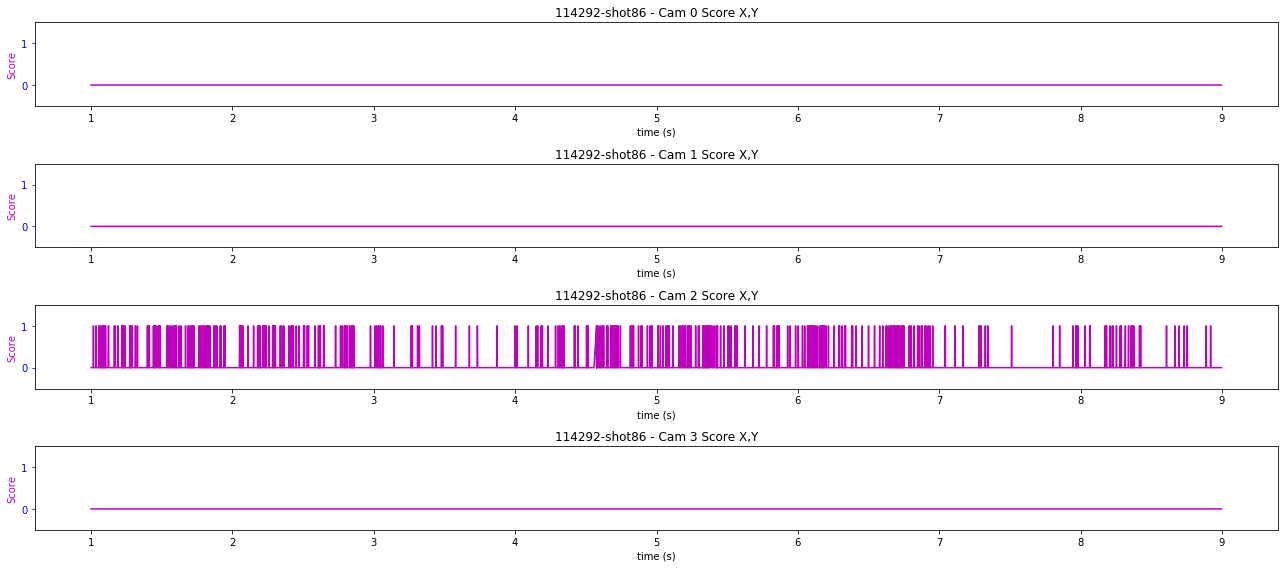

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114293-shot87_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


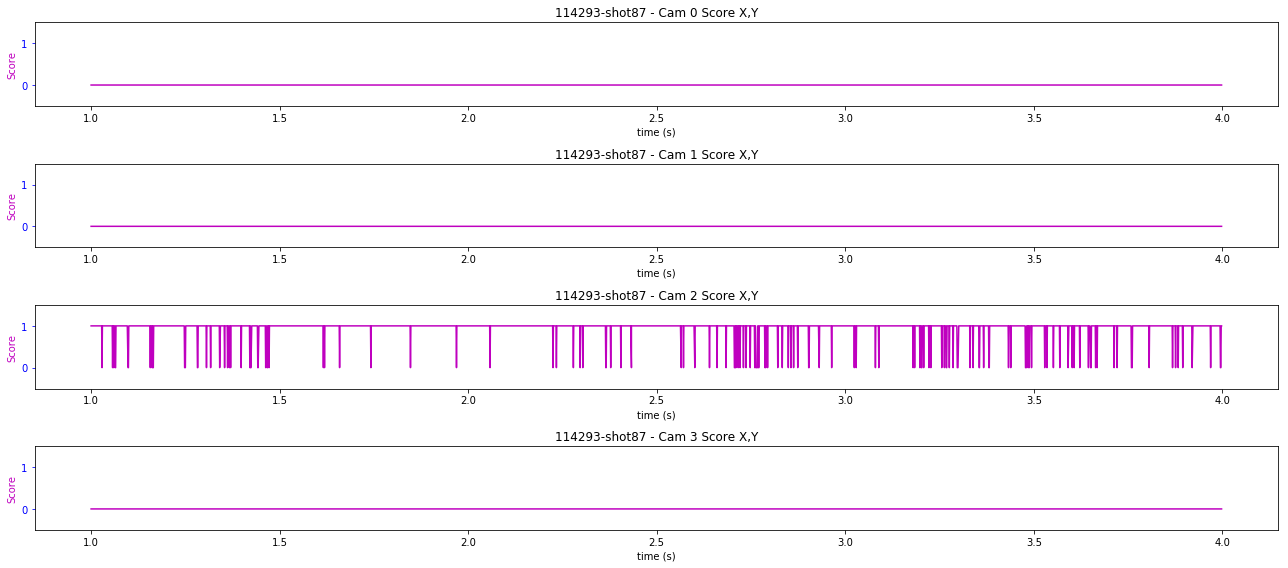

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114294-shot88_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


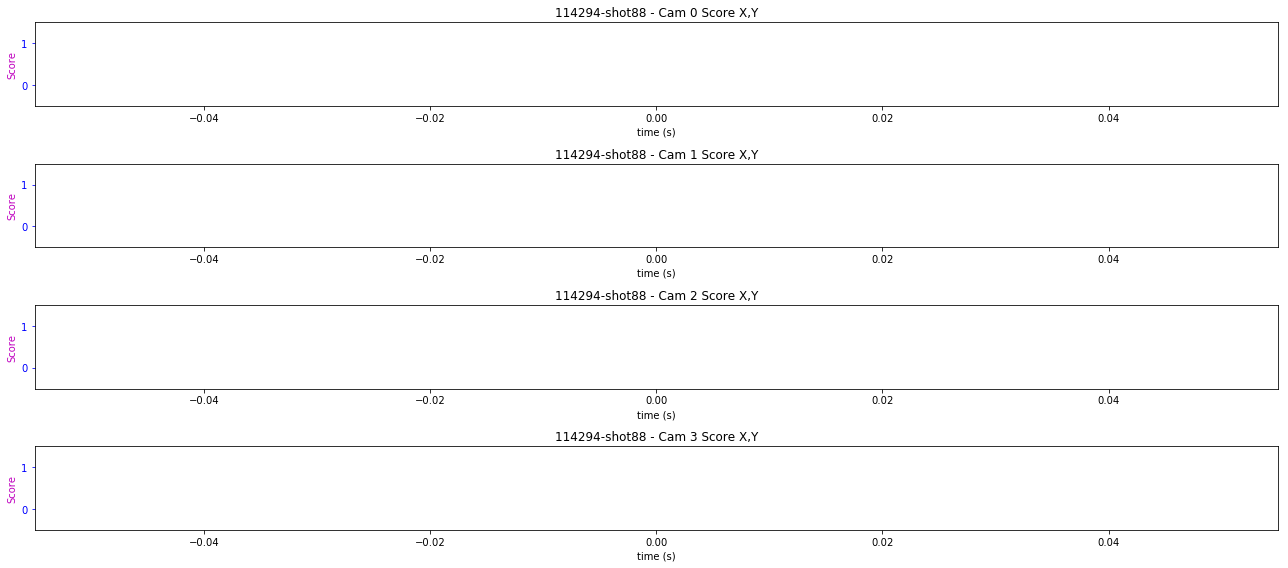

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114295-shot89_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


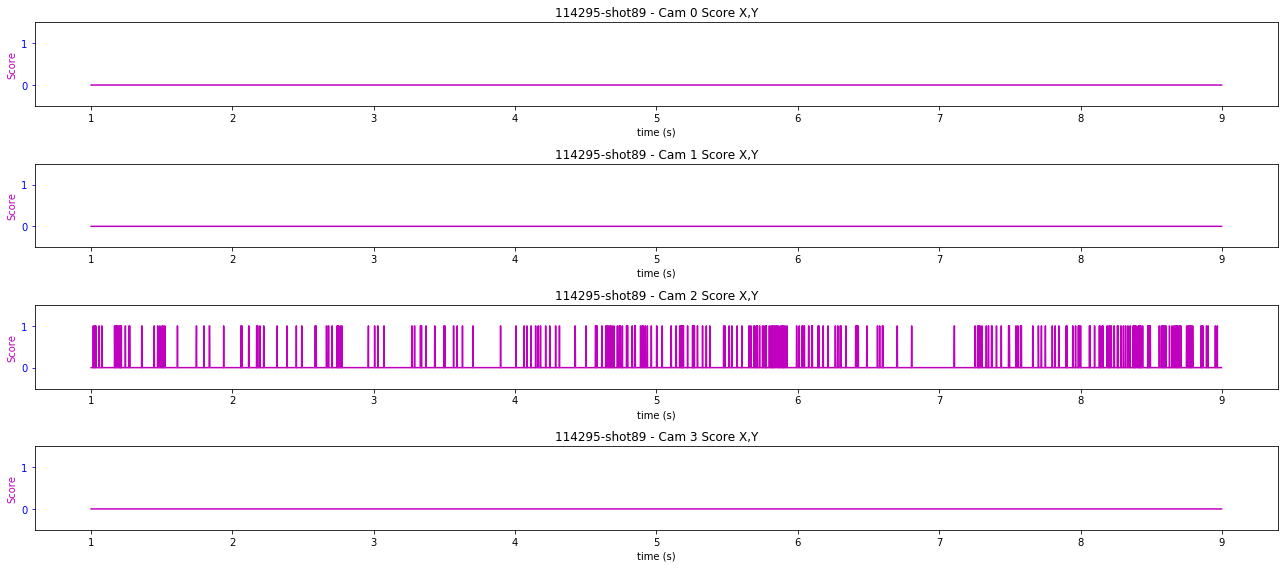

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114296-shot90_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


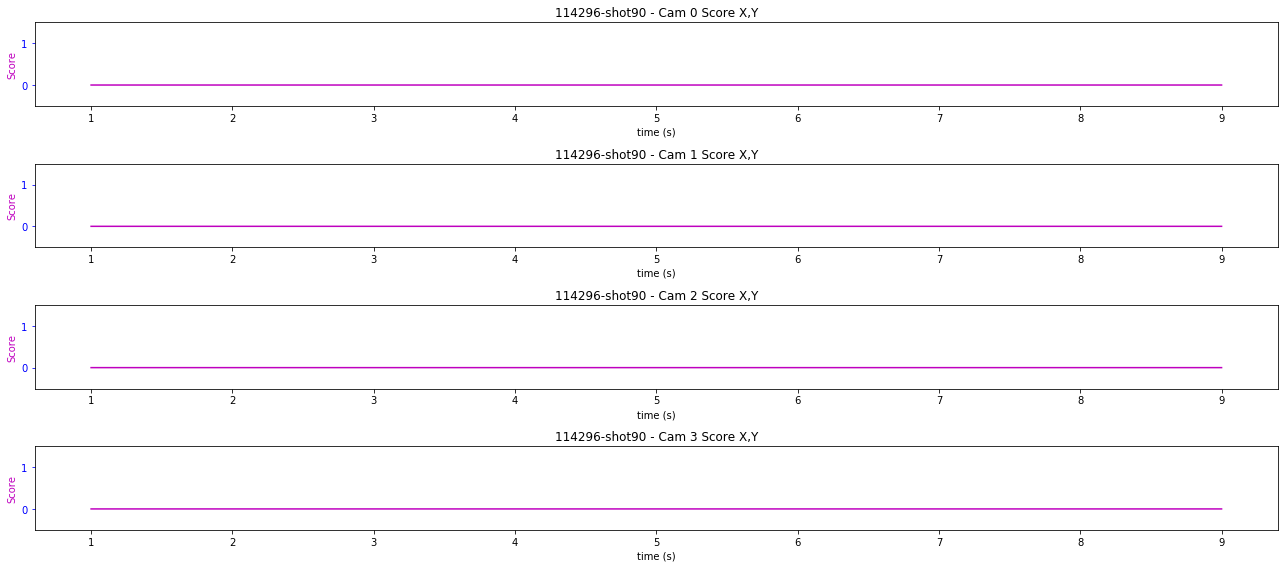

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114297-shot91_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


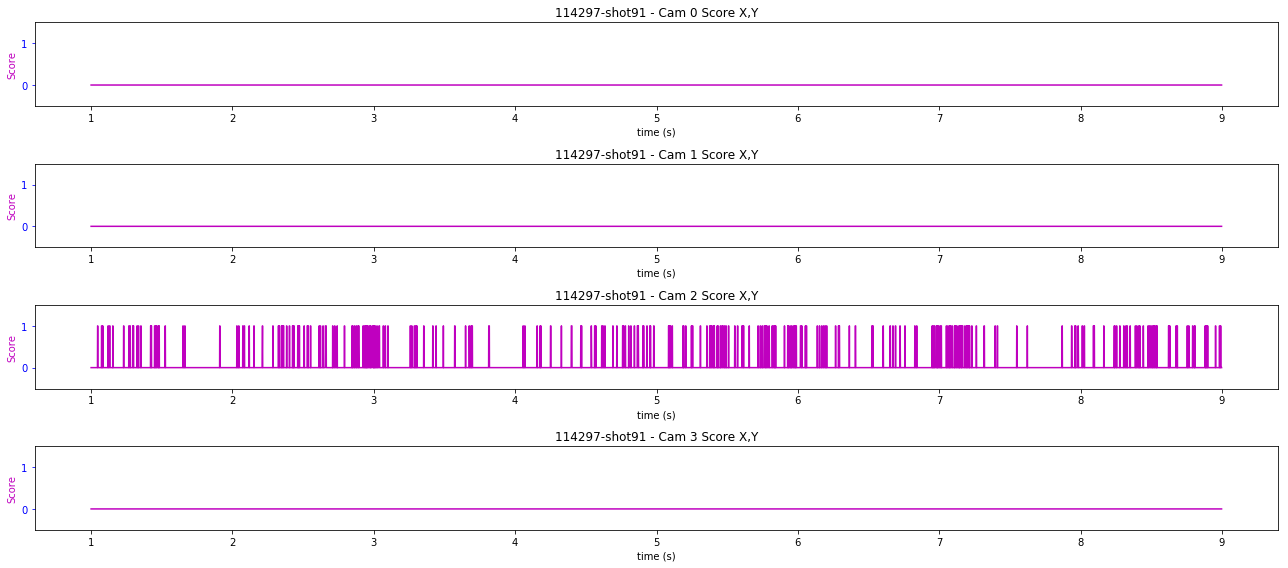

Saving pdf...
Creating PDF (/Users/trafferty/tmp/114298-shot92_TTM_scores.pdf) with 1 pages.
Total plots: 4, plots per page: 4


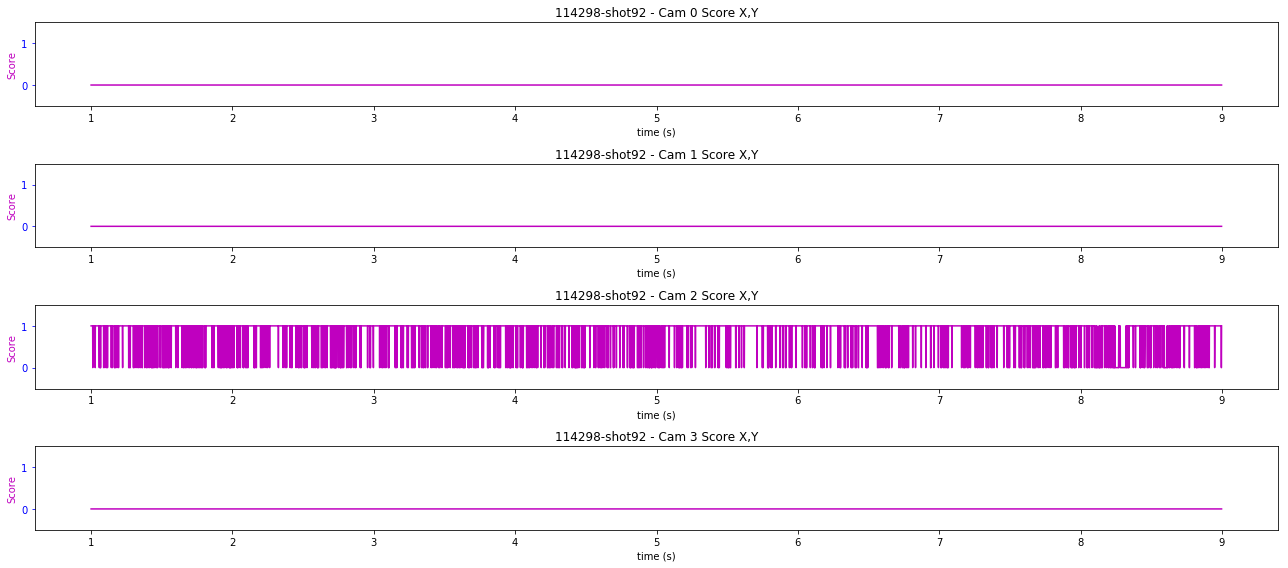

Saving pdf...


In [67]:
save_pdf = True
query_str = '1 <= time_s < 30'  # used to filter out data

if 1:
    for template_id, data_set in wafer_data_sets.items():
        df = pd.DataFrame.from_records(data_set, columns=cols)
        shot_num = list(wafer_data_sets.keys()).index(template_id) + 1
        plot_scores(df, "%d-shot%d" % (template_id, shot_num), query_str, save_pdf )
#     data_set_metrics(v)
else:
    template_id = 114213
    df = pd.DataFrame.from_records(wafer_data_sets[template_id], columns=cols)
    shot_num = list(wafer_data_sets.keys()).index(template_id) + 1
    plot_scores(df, "%d-shot%d" % (template_id, shot_num), query_str, save_pdf )

In [16]:
# 22: '20.1 <= time_s < 20.4'
# 26: '1 <= time_s < 3'

vib_sets_05_17 = [(22, '30271', '18.1 <= time_s < 22.4'),
            (22, '30271_long', '1 <= time_s < 30'),
            (26, '30279', '1 <= time_s < 3'),
            (26, '30279_before', '1.3 <= time_s < 1.75')]

vib_sets_05_24 = [(0, '30380', '0 <= time_s < 30'),
            (1, '30382', '0 <= time_s < 30'),
            (2, '30384', '0 <= time_s < 30'),
            (3, '30385', '0 <= time_s < 30'),
            (4, '30386', '0 <= time_s < 30')]

#vib_sets = [(5, '30105', '0 <= time_s < 32')]

vib_sets = vib_sets_05_17
i = 0
save_pdf = True

df = pd.DataFrame.from_records(data_sets[vib_sets[i][0]], columns=cols)

for i in range(len(vib_sets)):
    df = pd.DataFrame.from_records(data_sets[vib_sets[i][0]], columns=cols)
    plot_series(df, vib_sets[i][1], vib_sets[i][2], save_pdf )

plot_series(df, vib_sets[i][1], vib_sets[i][2], save_pdf )


IndexError: list index out of range

In [17]:
df = pd.DataFrame.from_records(data_sets[26], columns=cols)
df_sub = df.query('1.415 <= time_s < 1.735')
#df.describe()

time_s = df_sub['time_s']
df_c0x = df_sub['C0 measx_mm']
df_c0y = df_sub['C0 measy_mm']
df_c1x = df_sub['C1 measx_mm']
df_c1y = df_sub['C1 measy_mm']
df_c2x = df_sub['C2 measx_mm']
df_c2y = df_sub['C2 measy_mm']
df_c3x = df_sub['C3 measx_mm']
df_c3y = df_sub['C3 measy_mm']

print("num pts:", len(df_c0x))

fig, ax1 = plt.subplots(figsize=(18,3))
ax1.plot(time_s, df_c0x,  color='b', label='coarse')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('cmeas, meas', color='b')
ax1.tick_params('y', colors='b')
plt.show()
time_s

IndexError: list index out of range

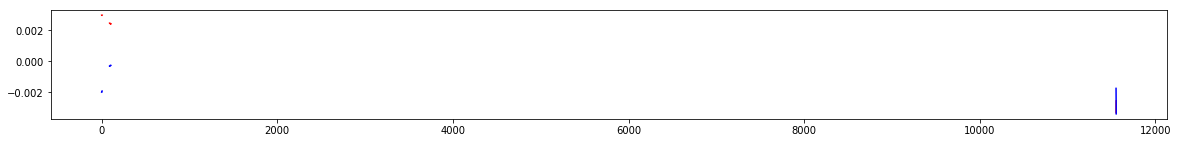

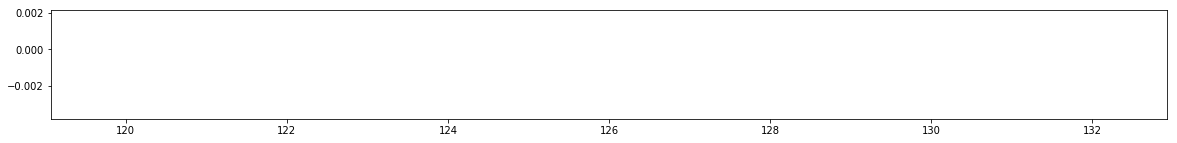

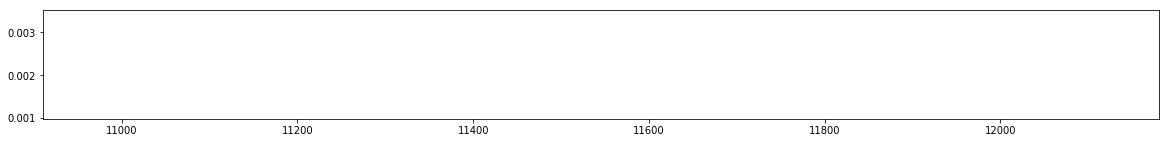

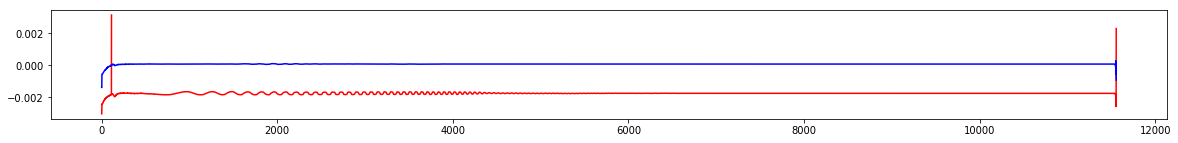

In [82]:
plt.figure(figsize=(20,2))
plt.plot(df['C0 post measx_mm'], color='r')
plt.plot(df['C0 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C1 post measx_mm'], color='r')
plt.plot(df['C1 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C2 post measx_mm'], color='r')
plt.plot(df['C2 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C3 post measx_mm'], color='r')
plt.plot(df['C3 post measy_mm'], color='b')
# plt.vlines(rt_peakIdx, 0, np.max(patch_diff) + 25, color='r')
#plt.title('TTM Data')


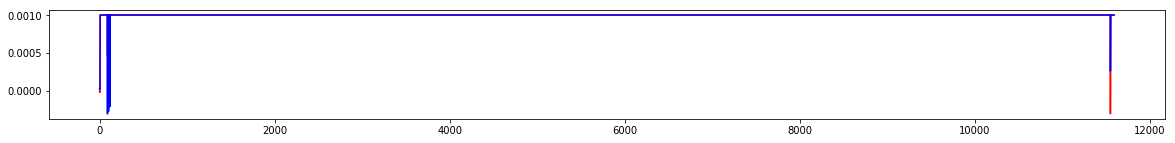

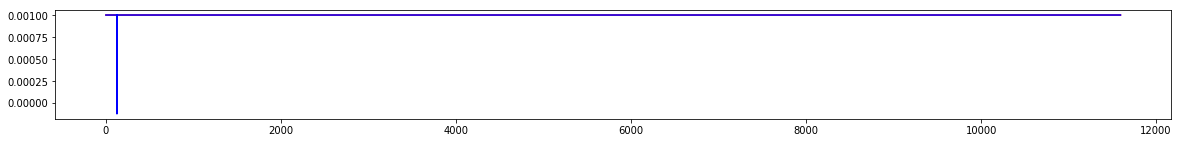

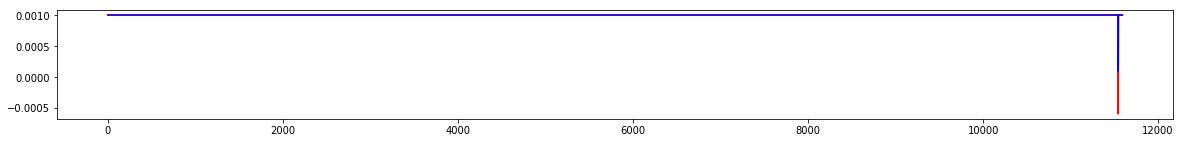

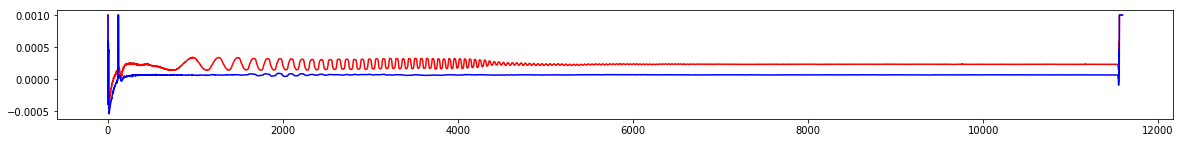

In [73]:
plt.figure(figsize=(20,2))
plt.plot(df['C0 measx_mm'], color='r')
plt.plot(df['C0 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C1 measx_mm'], color='r')
plt.plot(df['C1 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C2 measx_mm'], color='r')
plt.plot(df['C2 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C3 measx_mm'], color='r')
plt.plot(df['C3 measy_mm'], color='b')


In [48]:
df = pd.DataFrame.from_records(ds, columns=cols)
#df.describe()
df['Cam3_TimeStamp']

0       127049
1       129649
2       132249
3       134849
4       137449
5       140041
6       142641
7       145241
8       147841
9       150441
10      153041
11      155641
12      158241
13      160841
14      163441
15      166034
16      168634
17      171234
18      173834
19      176434
20      179034
21      181634
22      184234
23      186834
24      189434
25      192026
26      194626
27      197226
28      199826
29      202426
         ...  
3621    538936
3622    541536
3623    544128
3624    546728
3625    549328
3626    551928
3627    554528
3628    557128
3629    559728
3630    562328
3631    564928
3632    567528
3633    570120
3634    572720
3635    575320
3636    577920
3637    580520
3638    583120
3639    585720
3640    588320
3641    590920
3642    593520
3643    596113
3644    598713
3645    601313
3646    603913
3647    606513
3648    609113
3649    611713
3650    614313
Name: Cam3_TimeStamp, dtype: int64

Cam1_TimeStamp
 Mean: 2599.250411
 Std : 2.265351
 Max : 2601.000000
 Min : 2592.000000
Cam2_TimeStamp
 Mean: 2599.250411
 Std : 2.265109
 Max : 2601.000000
 Min : 2592.000000
Cam3_TimeStamp
  delta at 50 is 0 (ts: 257011, ts_prev: 257011)
  delta at 243 is 0 (ts: 758667, ts_prev: 758667)
  delta at 436 is 0 (ts: 260324, ts_prev: 260324)
  delta at 629 is 0 (ts: 761980, ts_prev: 761980)
  delta at 791 is 0 (ts: 183052, ts_prev: 183052)
  delta at 822 is 0 (ts: 263629, ts_prev: 263629)
  delta at 1015 is 0 (ts: 765286, ts_prev: 765286)
  delta at 1208 is 0 (ts: 266942, ts_prev: 266942)
  delta at 1401 is 0 (ts: 768598, ts_prev: 768598)
  delta at 1594 is 0 (ts: 270255, ts_prev: 270255)
  delta at 1787 is 0 (ts: 771911, ts_prev: 771911)
  delta at 1980 is 0 (ts: 273560, ts_prev: 273560)
  delta at 2173 is 0 (ts: 775216, ts_prev: 775216)
  delta at 2366 is 0 (ts: 276873, ts_prev: 276873)
  delta at 2559 is 0 (ts: 778529, ts_prev: 778529)
  delta at 2752 is 0 (ts: 280186, ts_prev: 280186)


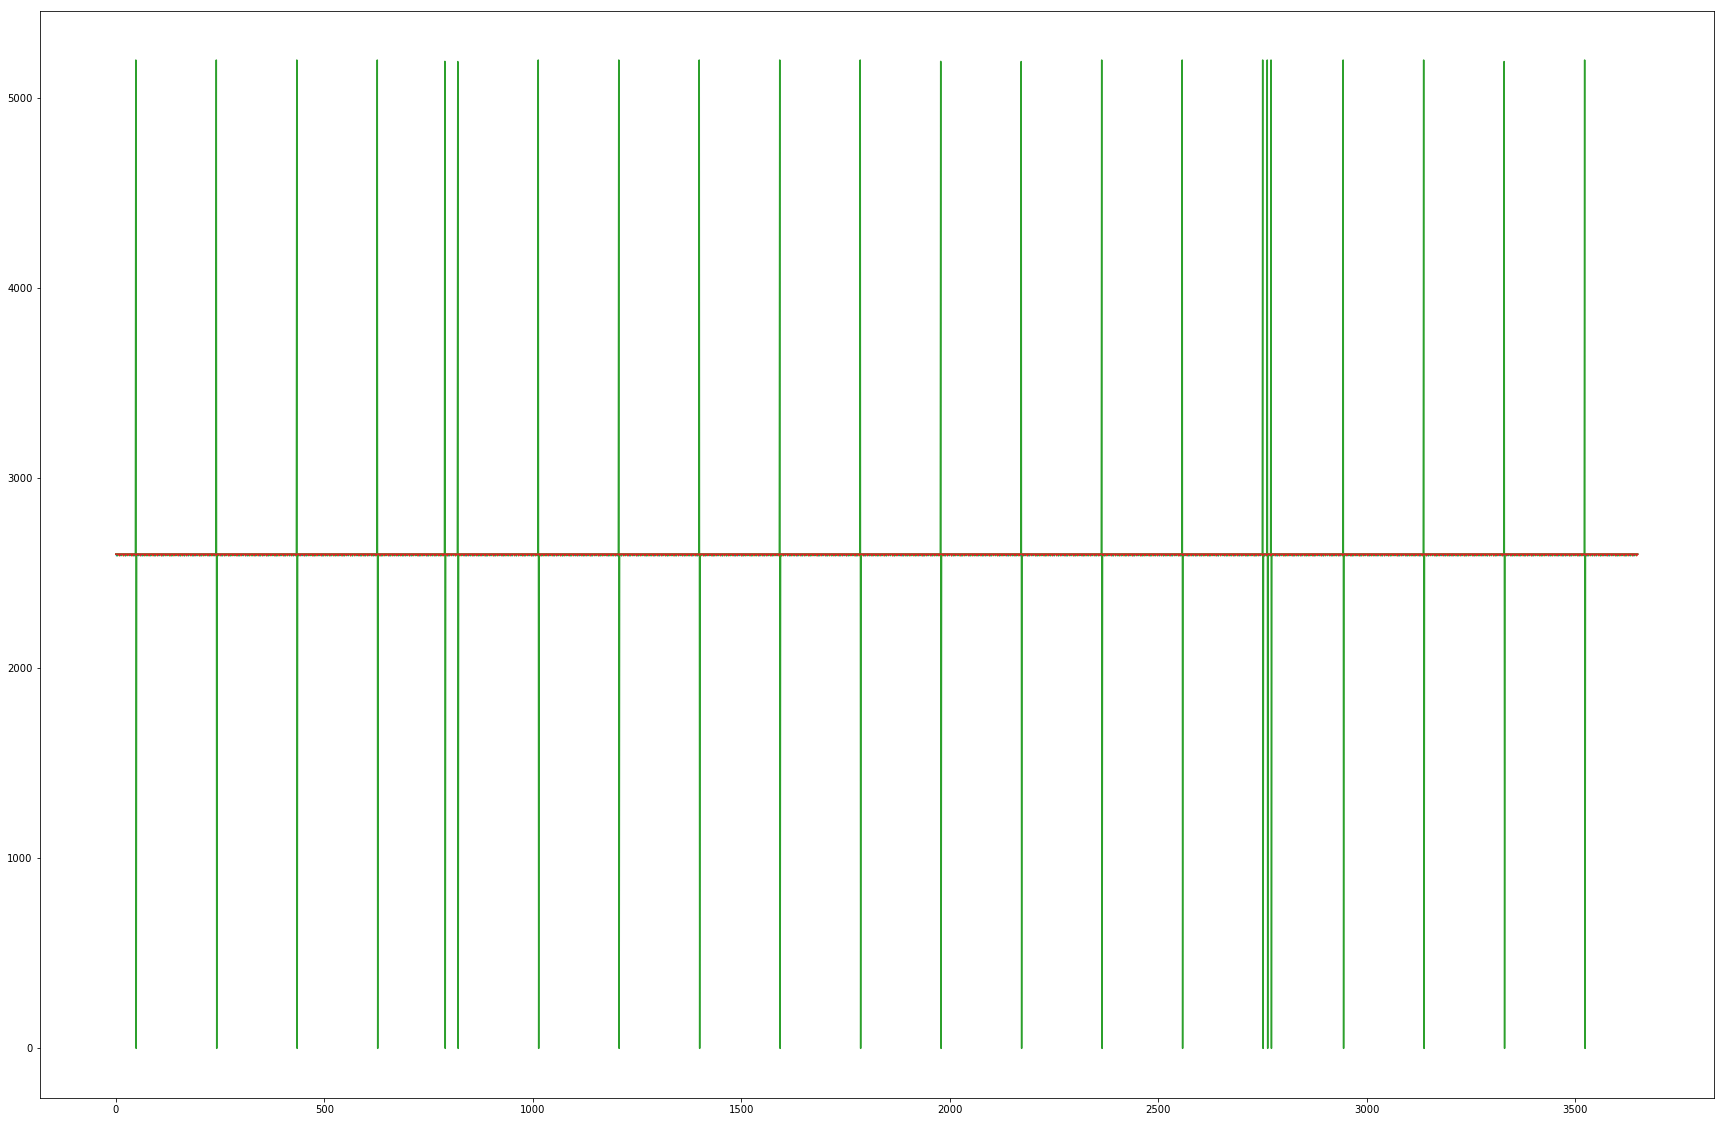

In [70]:
df = pd.DataFrame.from_records(ds, columns=cols)
#df.describe()

cols_to_plot = ['Cam1_TimeStamp', 'Cam2_TimeStamp', 'Cam3_TimeStamp', 'Cam4_TimeStamp']
plt.figure(figsize=(30,20))

for col in cols_to_plot:
    print("%s" % col)
    cam_ts_deltas = []
    offset = 0
    for idx, ts in enumerate(df[col]):
        if idx > 0:
            if ts_prev == ts:
                delta = ts - ts_prev
                print("  delta at %d is %d (ts: %d, ts_prev: %d)" % (idx, delta, ts, ts_prev))
            elif ts_prev < ts:
                delta = ts - ts_prev
            else:
                delta = (1e6 - ts_prev) + ts

            cam_ts_deltas.append(delta)

        ts_prev = ts

    plt.plot(cam_ts_deltas)

    cam_ts_deltas_np = np.array(cam_ts_deltas)
    print(" Mean: %f" % cam_ts_deltas_np.mean())
    print(" Std : %f" % cam_ts_deltas_np.std())
    print(" Max : %f" % cam_ts_deltas_np.max())
    print(" Min : %f" % cam_ts_deltas_np.min())
    